## Project Description 

The objective of this project is to develop a predictive model that can accurately forecast instances of customer default payments in Taiwan. By focusing on risk management, we aim to go beyond a simple binary classification of clients as credible or not credible. Instead, our emphasis is on estimating the probability of default for each customer. This approach provides a more valuable and nuanced understanding of the risk involved.

To assess the effectiveness of our predictive model, we will utilize a K-S chart. This chart allows us to evaluate and compare the performance of our model in identifying customers who are likely to default on their credit card payments. By analyzing the K-S chart, we can make informed decisions and take appropriate actions to mitigate potential default risks.

### Data Description

In this research, we examined the relationship between credit card default and various factors. The response variable, default payment, was represented by a binary variable where "Yes" indicated default (1) and "No" indicated no default (0). To analyze this, we considered a comprehensive set of 23 explanatory variables based on existing literature. 

Here is a detailed description of these variables:

1. X1: Amount of credit given in New Taiwan (NT) dollars, which includes both individual consumer credit and supplementary credit for the consumer's family.

2. X2: Gender, where 1 represents male and 2 represents female.

3. X3: Education level, categorized as follows: 1 = graduate school, 2 = university, 3 = high school, 4 = others.

4. X4: Marital status, classified as follows: 1 = married, 2 = single, 3 = others.

5. X5: Age of the individual in years.

6. X6 - X11: History of past payment. We examined the payment records from April to September 2005, where X6 represents the repayment status in September 2005, X7 represents the repayment status in August 2005, and so on. The scale used for measuring the repayment status is as follows: -1 = payment made duly, 1 = payment delayed by one month, 2 = payment delayed by two months, and so on, up to 9 = payment delayed by nine months or more. (# of months the amount has been due)

7. X12-X17: Amount of the bill statement in New Taiwan (NT) dollars. X12 represents the bill statement amount in September 2005, X13 represents the bill statement amount in August 2005, and so forth, up to X17 representing the bill statement amount in April 2005. (Amount Owed previously)

8. X18-X23: Amount of previous payment in New Taiwan (NT) dollars. X18 represents the amount paid in September 2005, X19 represents the amount paid in August 2005, and so on, up to X23 representing the amount paid in April 2005. (Amount Paid previously)

By analyzing these variables, we aim to gain insights into the factors that contribute to credit card default and develop a predictive model for identifying customers at risk of defaulting in the future.

### Project Objective

The objective of our project is to predict potential customers who are likely to default on their credit card payments in the upcoming months. Before delving into the details, let's first understand the definition of credit card default.

1. Understanding Credit Cards
- A credit card is a payment card that allows users to make purchases by utilizing a line of credit instead of using their own cash deposits. When a person uses a credit card for a transaction, they accumulate a balance that needs to be paid off on a monthly basis.

2. Defining Credit Card Default
- Credit card default occurs when an individual becomes significantly delinquent in making their credit card payments. It should be noted that missing a payment or two does not automatically result in default. Defaulting on a credit card payment happens when the Minimum Amount Due is not paid consecutively for several months.

In [1]:
# Import basic libraries
import numpy as np #numerical computation
import pandas as pd #data wrangling
import seaborn as sns #statistical visualization
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

from sklearn.model_selection import train_test_split
from sklearn import tree
# import graphviz #to visualize decision trees

In [2]:
# Data Collection
df = pd.read_csv('UCI_Credit_Card.csv')
df.head() # to check the first 5 rows


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [37]:
# Renaming other columns for better readibility

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


# Labels for our dataet
marriageLabels = ['Single', 'Married', 'Others']
billAmountFeatures = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
payAmountFeatures = ['PAY_AMT_SEPT','PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
payFeatures = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

### Categorical Variables

That are Sex, Marriage, Education. We want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models. The following explains the variale description.

Variable - SEX
1. Male
2. Female

Variable - Marriage

1. Married
2. Single 
3. Others

Variable - Education

1. Graduate school
2. University
3. High school
4. Others

In [36]:
print(df['SEX'].value_counts(), '\n')
print(df['MARRIAGE'].value_counts(), '\n')
print(df['EDUCATION'].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64 

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64 

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


Observations

1. Sex - There are more females than males in the dataset.
2. Marriage - We have few values for 0, which are not determined; we adding them in others category.
3. Education - Based of on our inital reading, the maximum number of population in university graduate. Also, we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [3]:
# Data Cleaning
# 1. check for duplicates
df.duplicated().sum() # 35 duplicates
df.drop_duplicates(inplace=True) # dropping the duplicate rows
df.columns[(df == 0).all()] # no columns with all zero values

# 2. check for missing values
df.isnull().sum() # no missing values

# 3. Check columns for extraneous values
df['EDUCATION'].value_counts() # 0, 5, 6 are extraneous values
df['EDUCATION'].replace([0, 5, 6], value=4, inplace=True) # replace with 4 (others)

df['MARRIAGE'].value_counts() # 0 is an extraneous value
df['MARRIAGE'].replace(0, value=3, inplace=True) # replace with 3 (others)



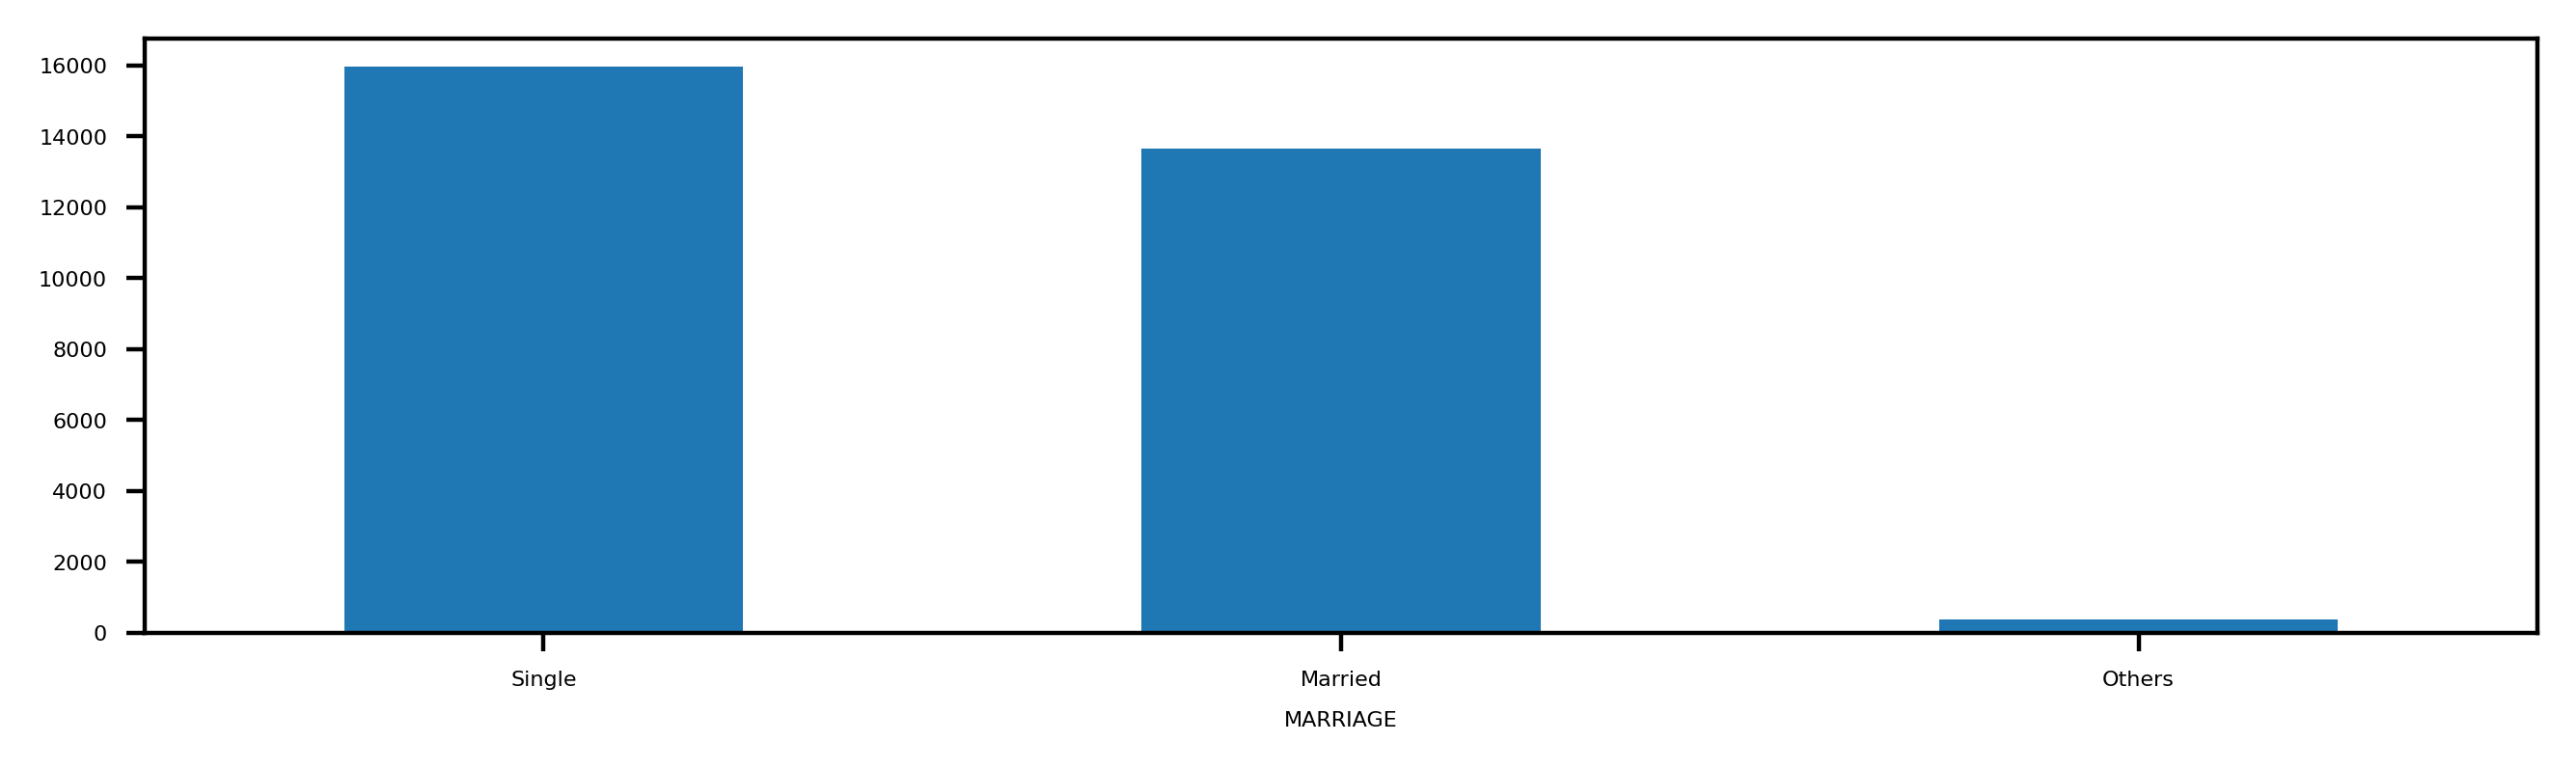

In [38]:
df.MARRIAGE.value_counts().plot(kind='bar', figsize=(8, 2))
plt.xticks(rotation=0)
plt.gca().set_xticklabels(marriageLabels)
plt.show()

Analysis: Clearly, there are more number of singles in our dataset than married or others (which I assume are divorced).

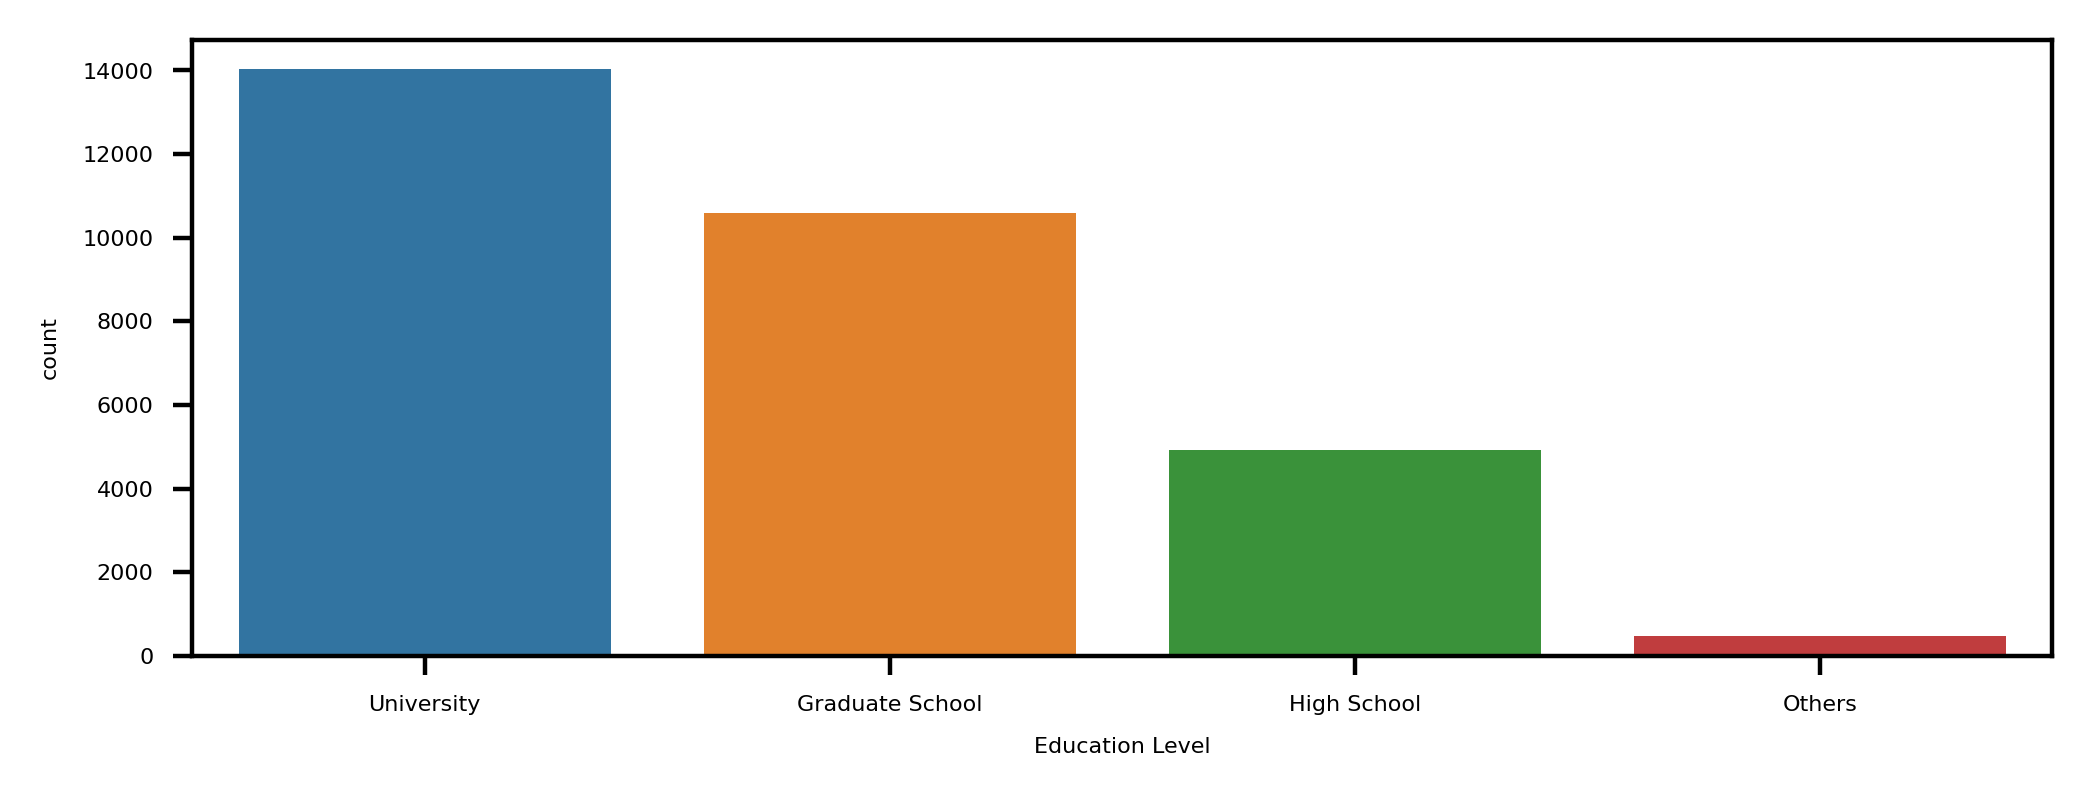

In [39]:
education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}

# Map the education labels to the 'Education' column
df['Education_Labels'] = df['EDUCATION'].map(education_labels)

# Create the countplot
plt.figure(figsize=(6, 2))
sns.countplot(x='Education_Labels', data=df)
plt.xlabel('Education Level')
plt.show()

#### Observations

1. Sex - There are more females credit card holder,so no. of defaulter have high proportion of females.
2. Education - No. of defaulters have a higher proportion of educated people (graduate school and university). With this result, the number of university student are the highest maybe because of tuition loans and credit. 
3. Marraige - No. of defaulters have a higher proportion of Singles.

In [4]:
# One Hot Encoding for categorical variables

# 1. One Hot Encoding for EDUCATION
df['EDUCATION'].value_counts()
df['EDUCATION_CAT'] = 'none' # initialize a new column with all 'none'
# Education categories: 1 = graduate school; 2 = university; 3 = high school; 4 = others
cat_mapping = {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'}
df['EDUCATION_CAT'] = df['EDUCATION'].map(cat_mapping) # map the values to the new column based on the education codes in the original Education column
df[['EDUCATION', 'EDUCATION_CAT']].head() # check the new column , works very well

# Now convert these categories into dummy variables
edu_ohe = pd.get_dummies(df['EDUCATION_CAT'])
edu_ohe.head() # check the new columns

# now concatenate the new columns to the original dataframe
df = pd.concat([df, edu_ohe], axis=1)
df.head() # check the new columns

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_CAT,graduate school,high school,others,university
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,university,False,False,False,True
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,university,False,False,False,True
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,university,False,False,False,True
3,4,50000.0,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,university,False,False,False,True
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0,university,False,False,False,True


### Numerical Variables

That are Limit Balance, Age, Bill Amount, History Payment Status, Paid Amount. 

<Axes: xlabel='default.payment.next.month', ylabel='LIMIT_BAL'>

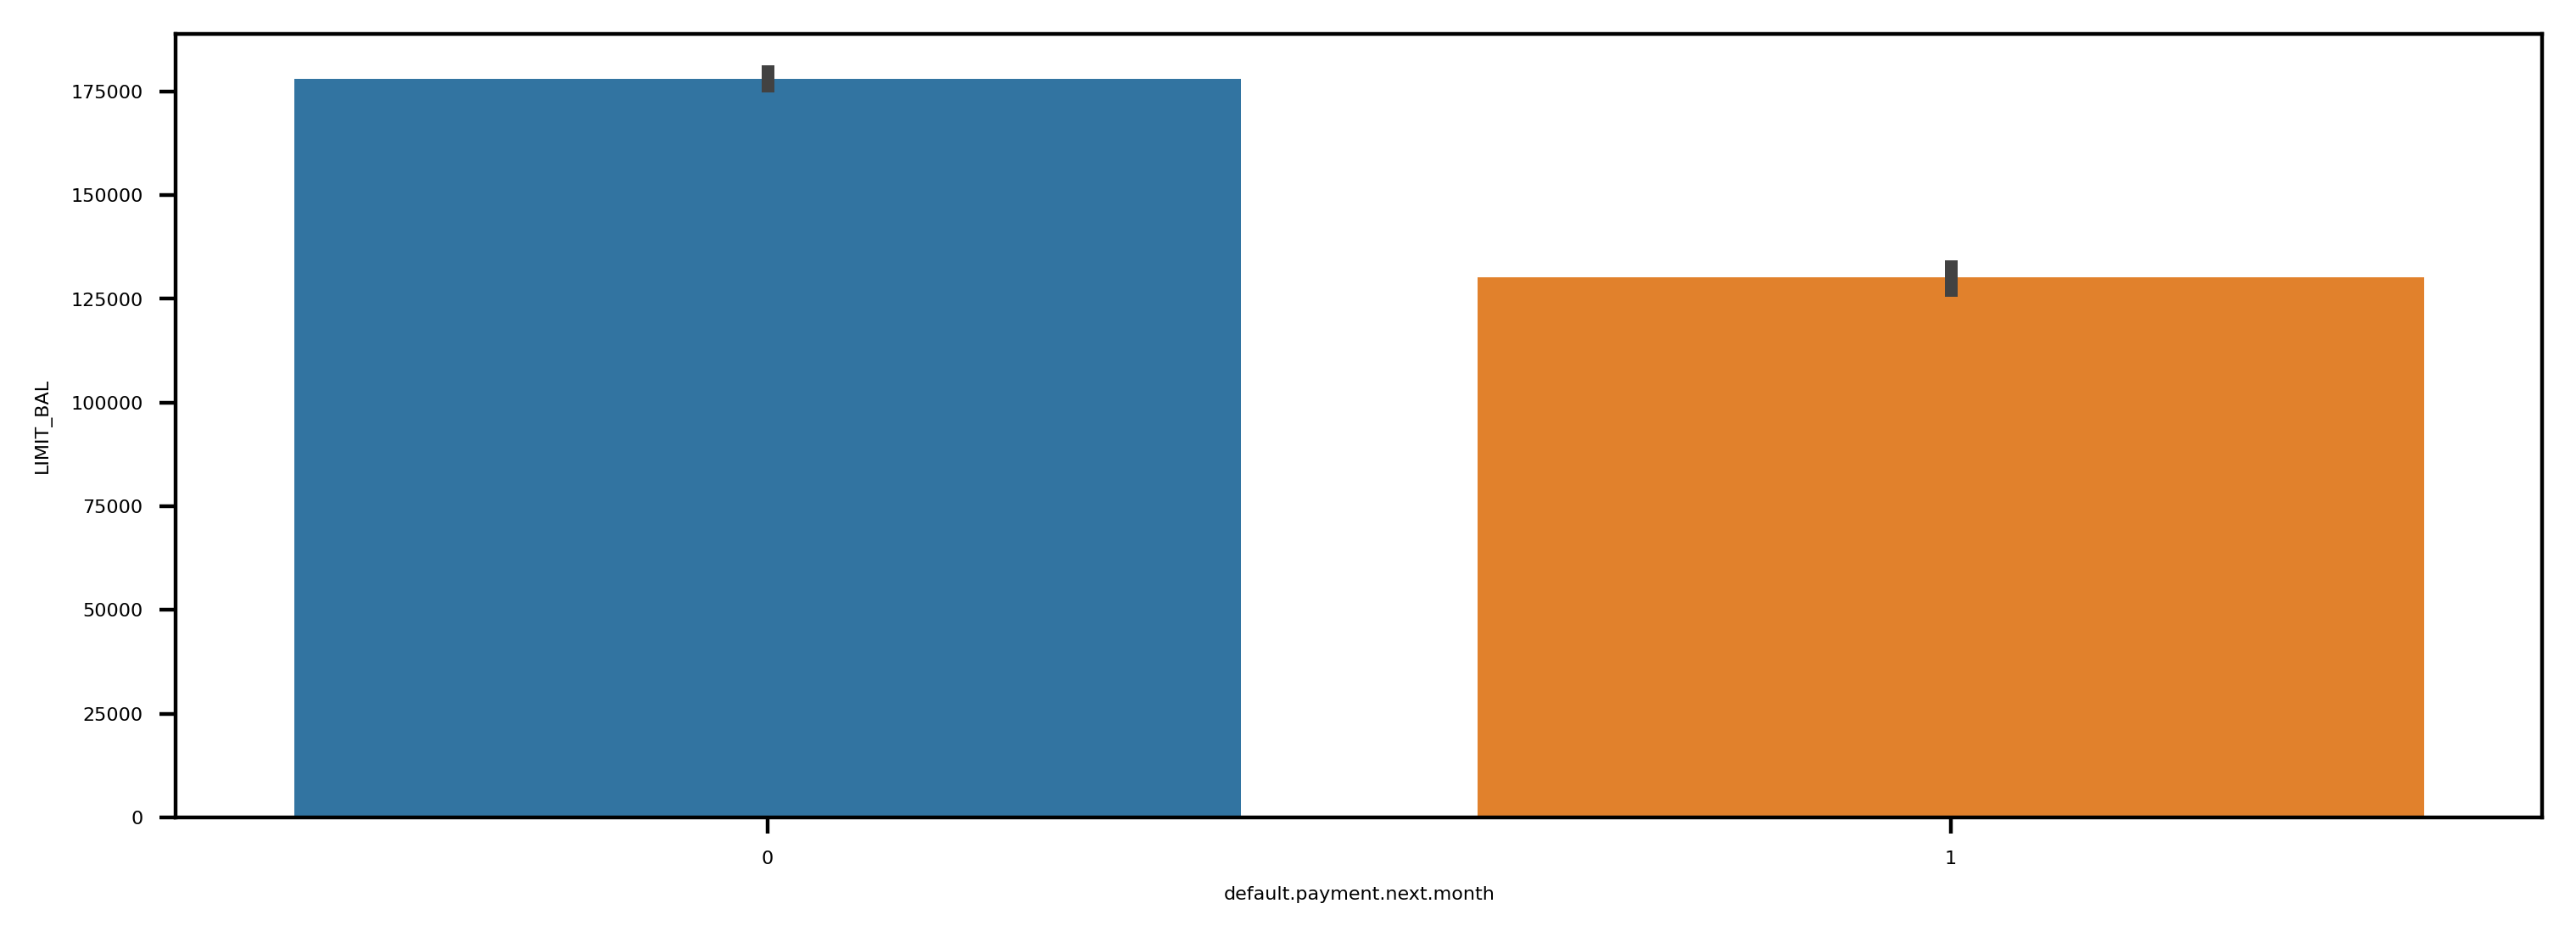

In [41]:
# Numerical Variable - Limit Balance
plt.figure(figsize=(9,3))
sns.barplot(x='default.payment.next.month', y='LIMIT_BAL', data=df)

In [42]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Observation - Limit Balance (IsDefault)

Clearly based of on our visual presentation; there is an imbalance between people who have defaulted and those who haven't. This can cause poor accuray in our prediction; hence we will balance the dataset in Feature Engineering section. 

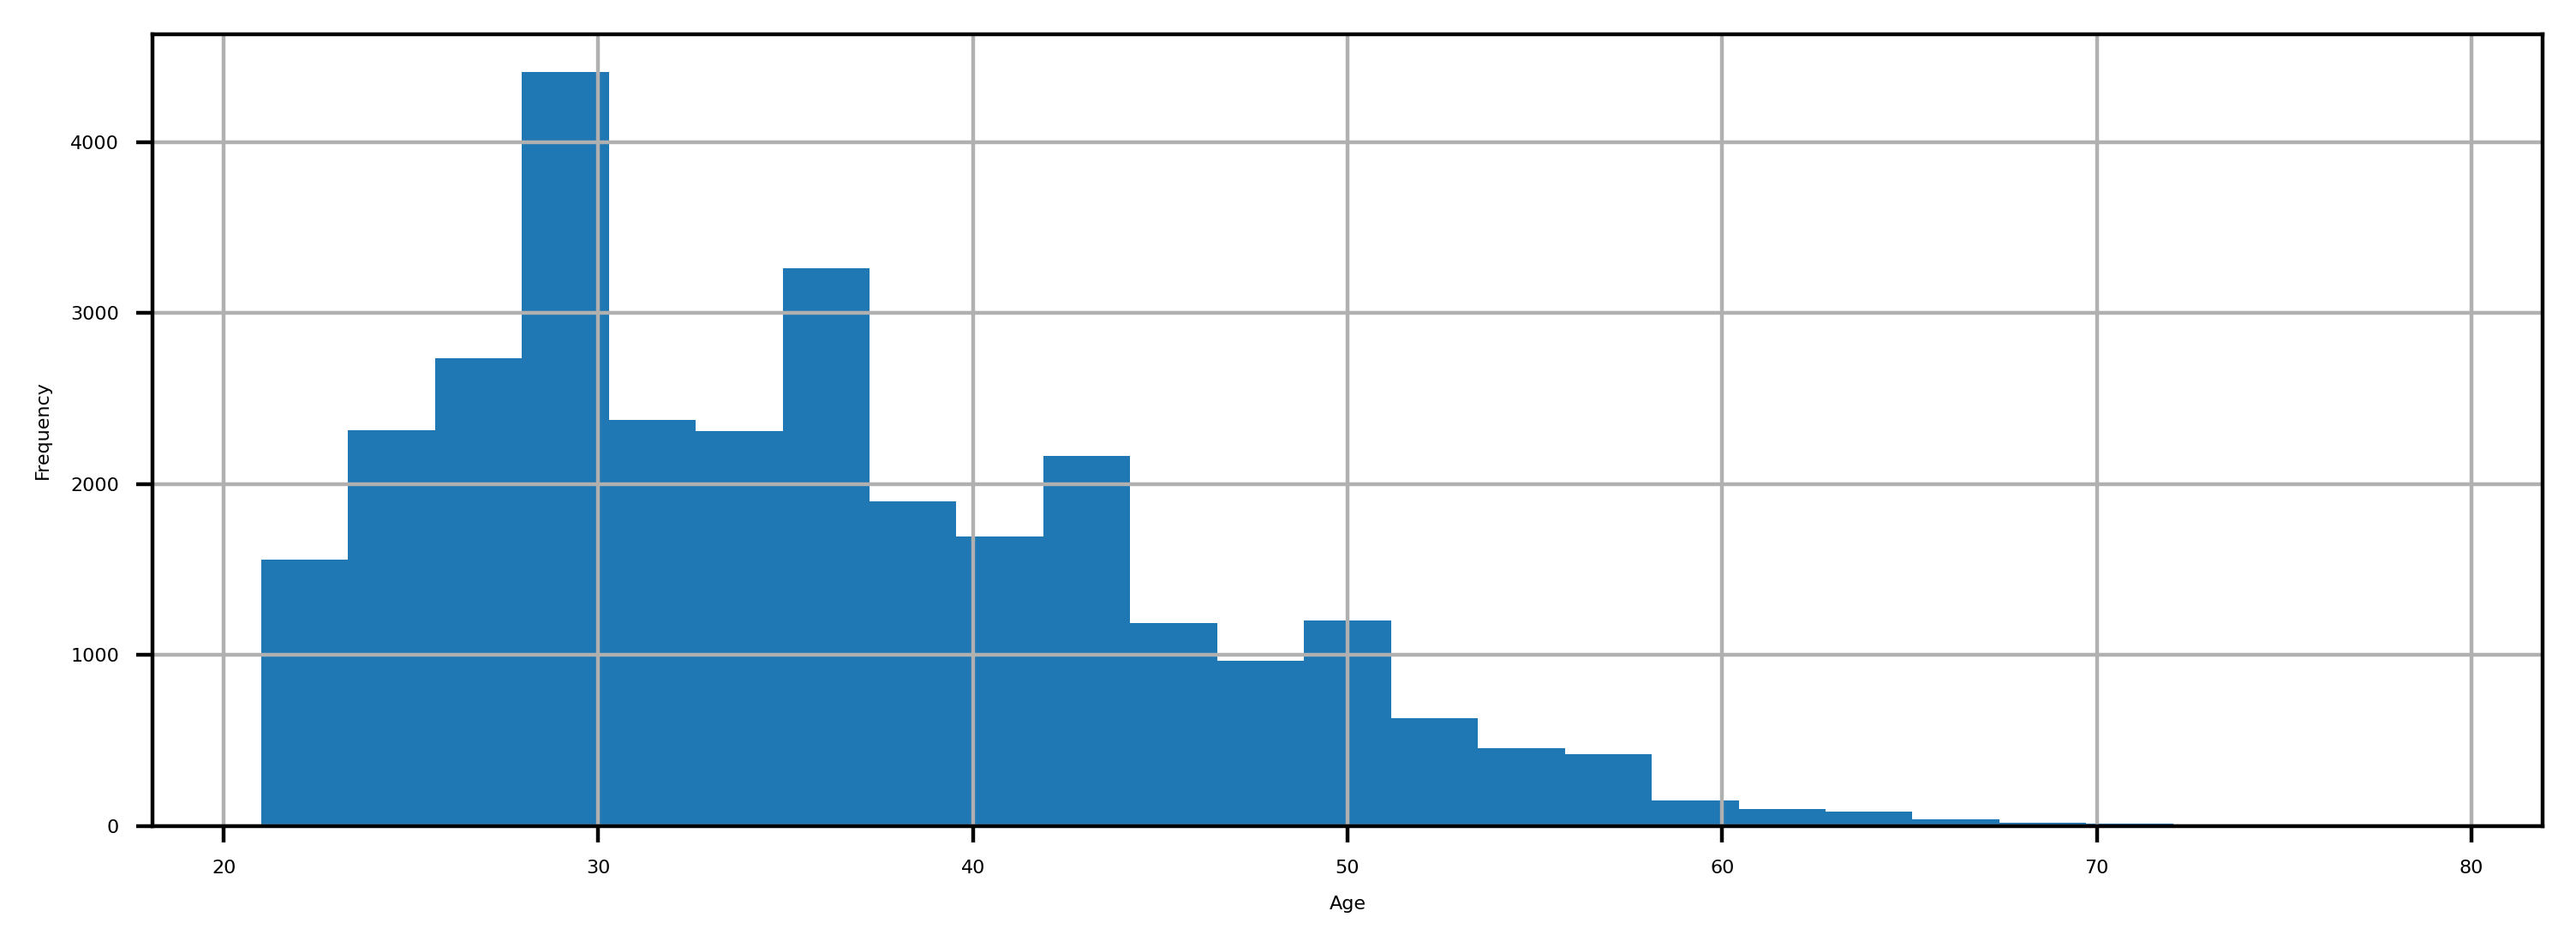

In [43]:
# Numerical Variable - Age
df.AGE.hist(figsize=(9,3), bins=25)
xlabel = plt.xlabel("Age")
ylabel = plt.ylabel("Frequency")

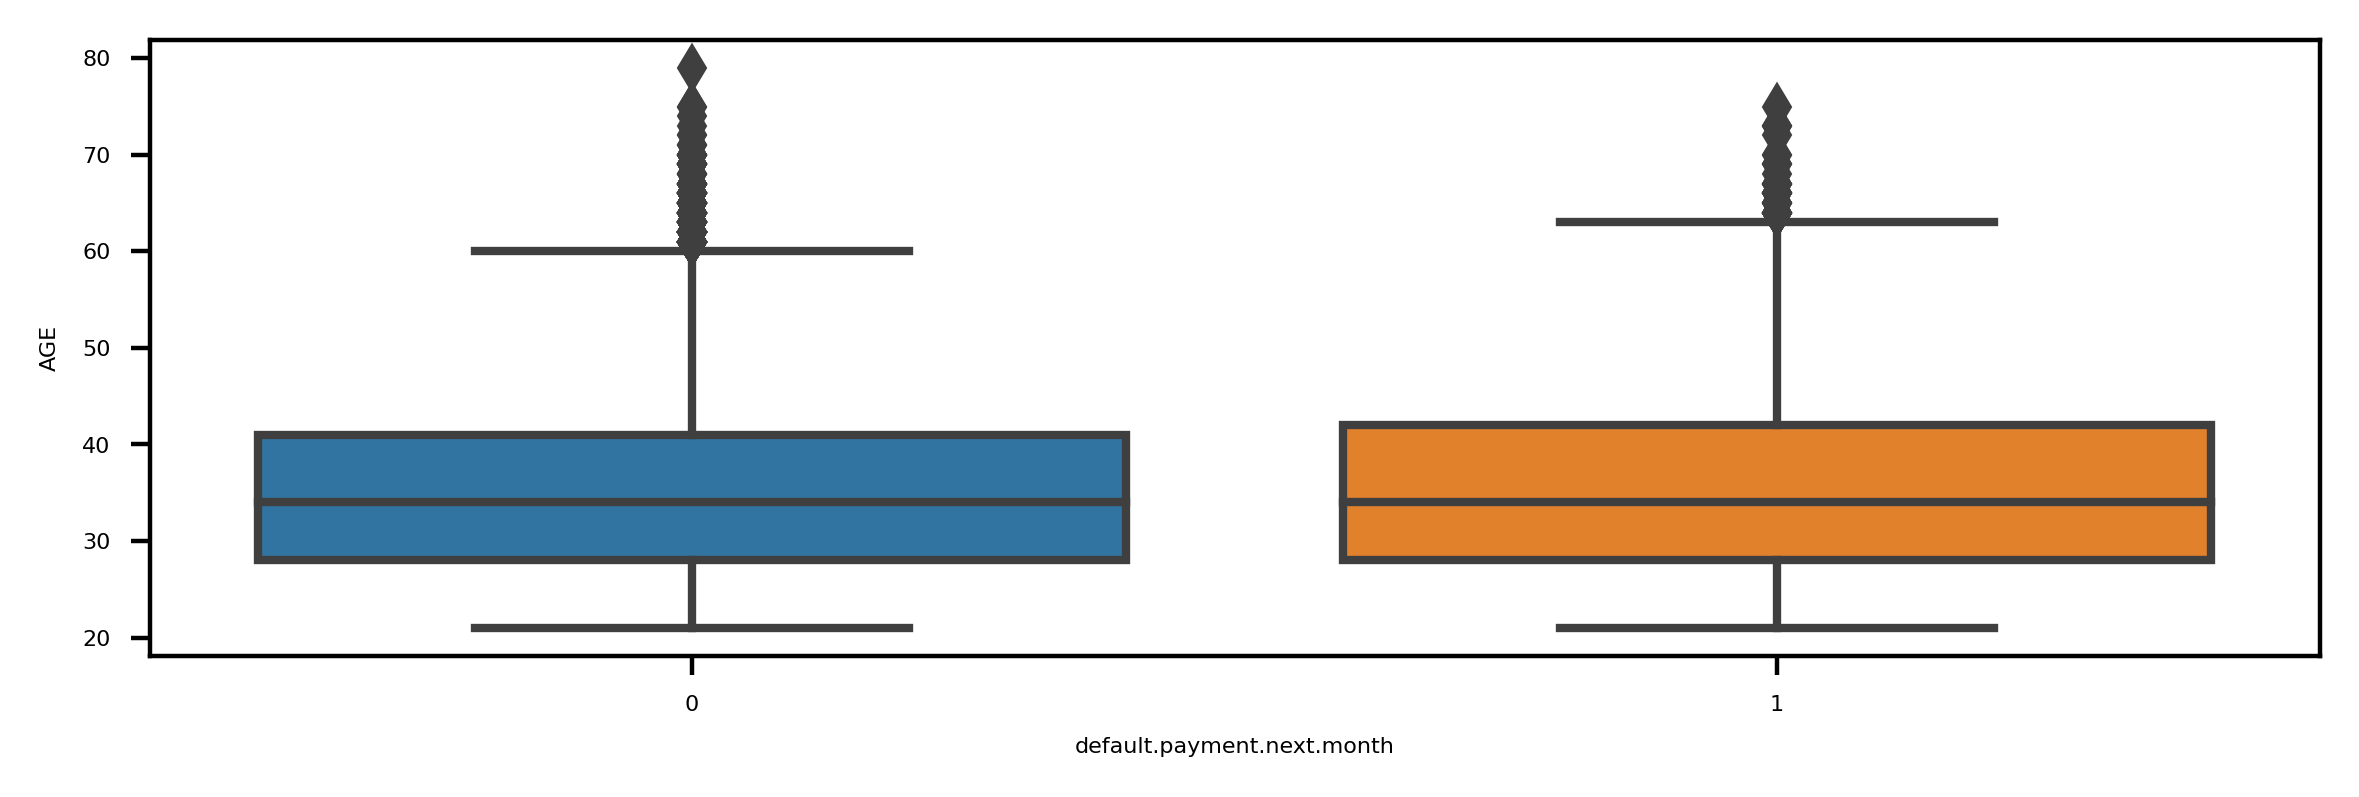

In [45]:
df.groupby('default.payment.next.month')['AGE'].mean()
plt.figure(figsize=(7,2))
ax = sns.boxplot(x="default.payment.next.month", y="AGE", data=df)

Observation - Age

Based of on above graph, majority of population, who defaulted, belonged to age group between 25 - 40. This explains about early college tuition, newly married lives/most divorce circumstances and taking loans for houses, cars etc. 

In [5]:
# our feature names are as follows
print(df.columns)
print(df.shape)

# lets explore the pay features
df[payFeatures].head() # check the first 5 rows
df[payFeatures].describe() # check the summary statistics
df[payFeatures].isnull().sum() # no missing values
df[payFeatures[0]].value_counts().sort_index() # check the unique values in the first column

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')
(30000, 30)


PAY_SEPT
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

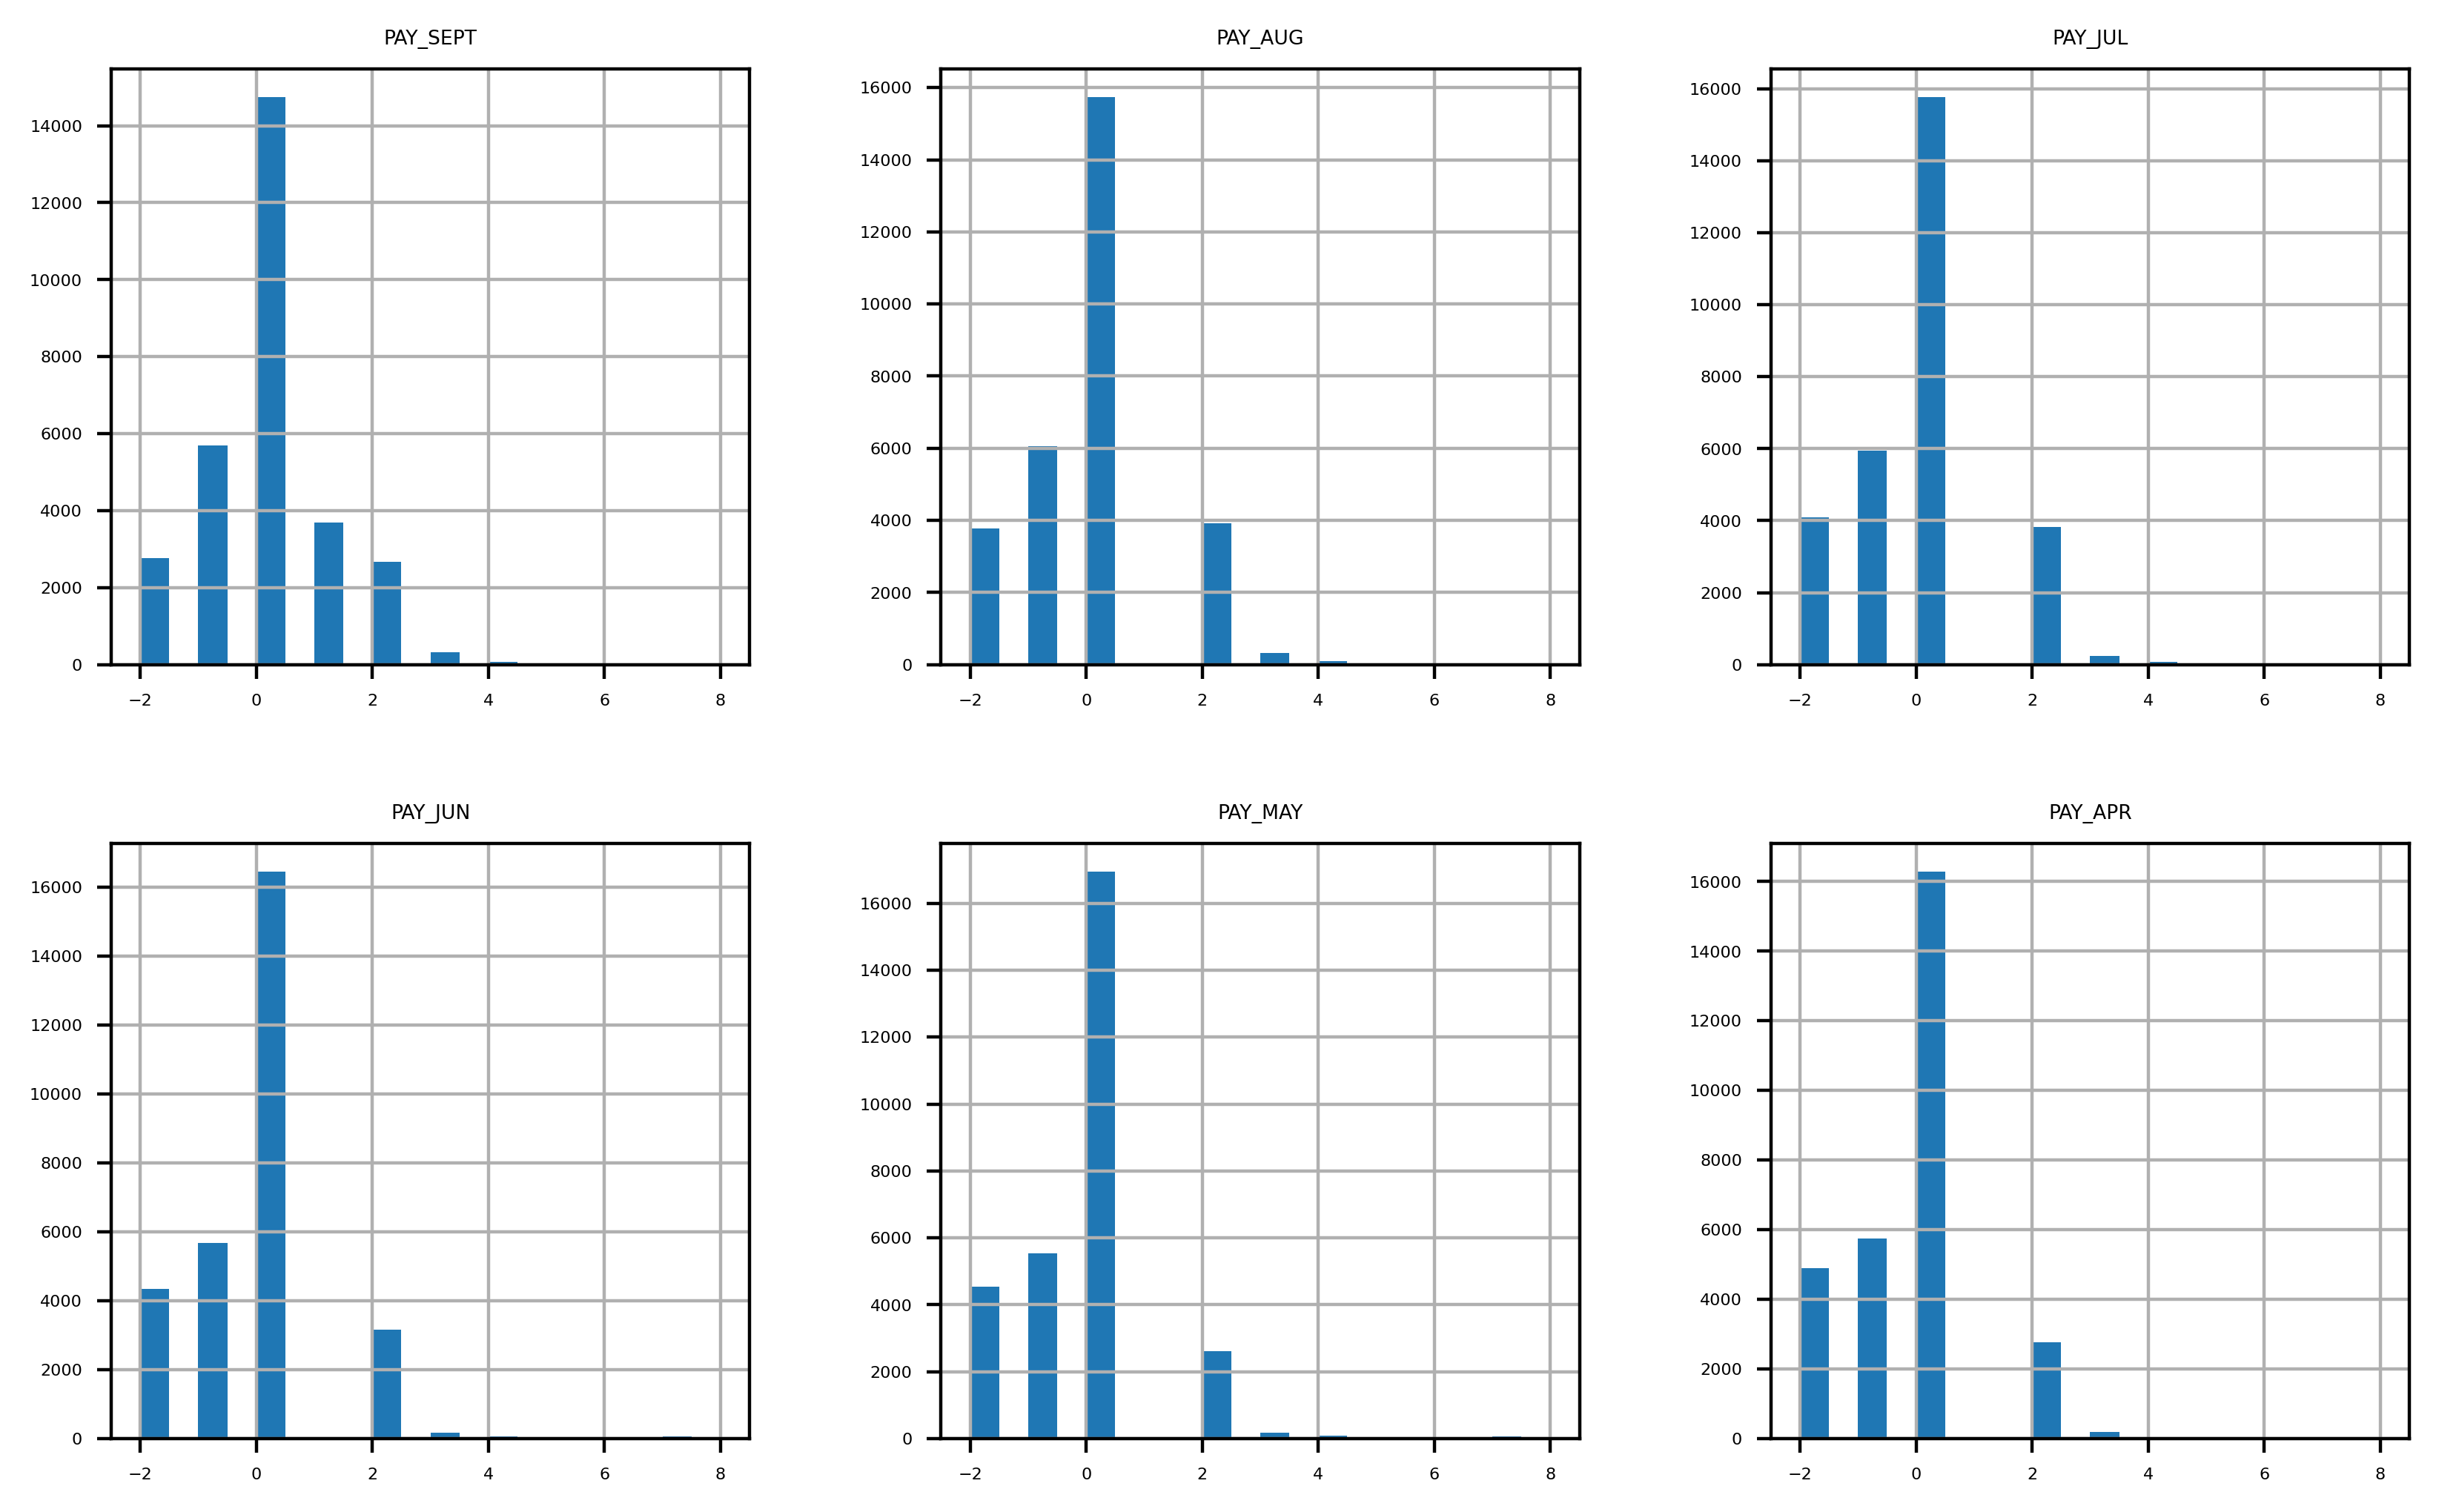

In [6]:
# now lets visualize the pay features using seaborn in a very cool way
mpl.rcParams['font.size'] = 4 # set the font size
df[payFeatures].hist(layout=(2, 3), figsize=(10, 6), bins=20) # plot the histograms
plt.show() # show the plot

Observation

 1. most of the values are negative, which means most of the customers pay their bills on time
 2. the histograms are right skewed, which means there are some outliers in the data
 3. the outliers are the customers who delay their payments by 2 months or more

Or in short they all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0.

array([[<Axes: title={'center': 'BILL_AMT_SEPT'}>,
        <Axes: title={'center': 'BILL_AMT_AUG'}>,
        <Axes: title={'center': 'BILL_AMT_JUL'}>],
       [<Axes: title={'center': 'BILL_AMT_JUN'}>,
        <Axes: title={'center': 'BILL_AMT_MAY'}>,
        <Axes: title={'center': 'BILL_AMT_APR'}>]], dtype=object)

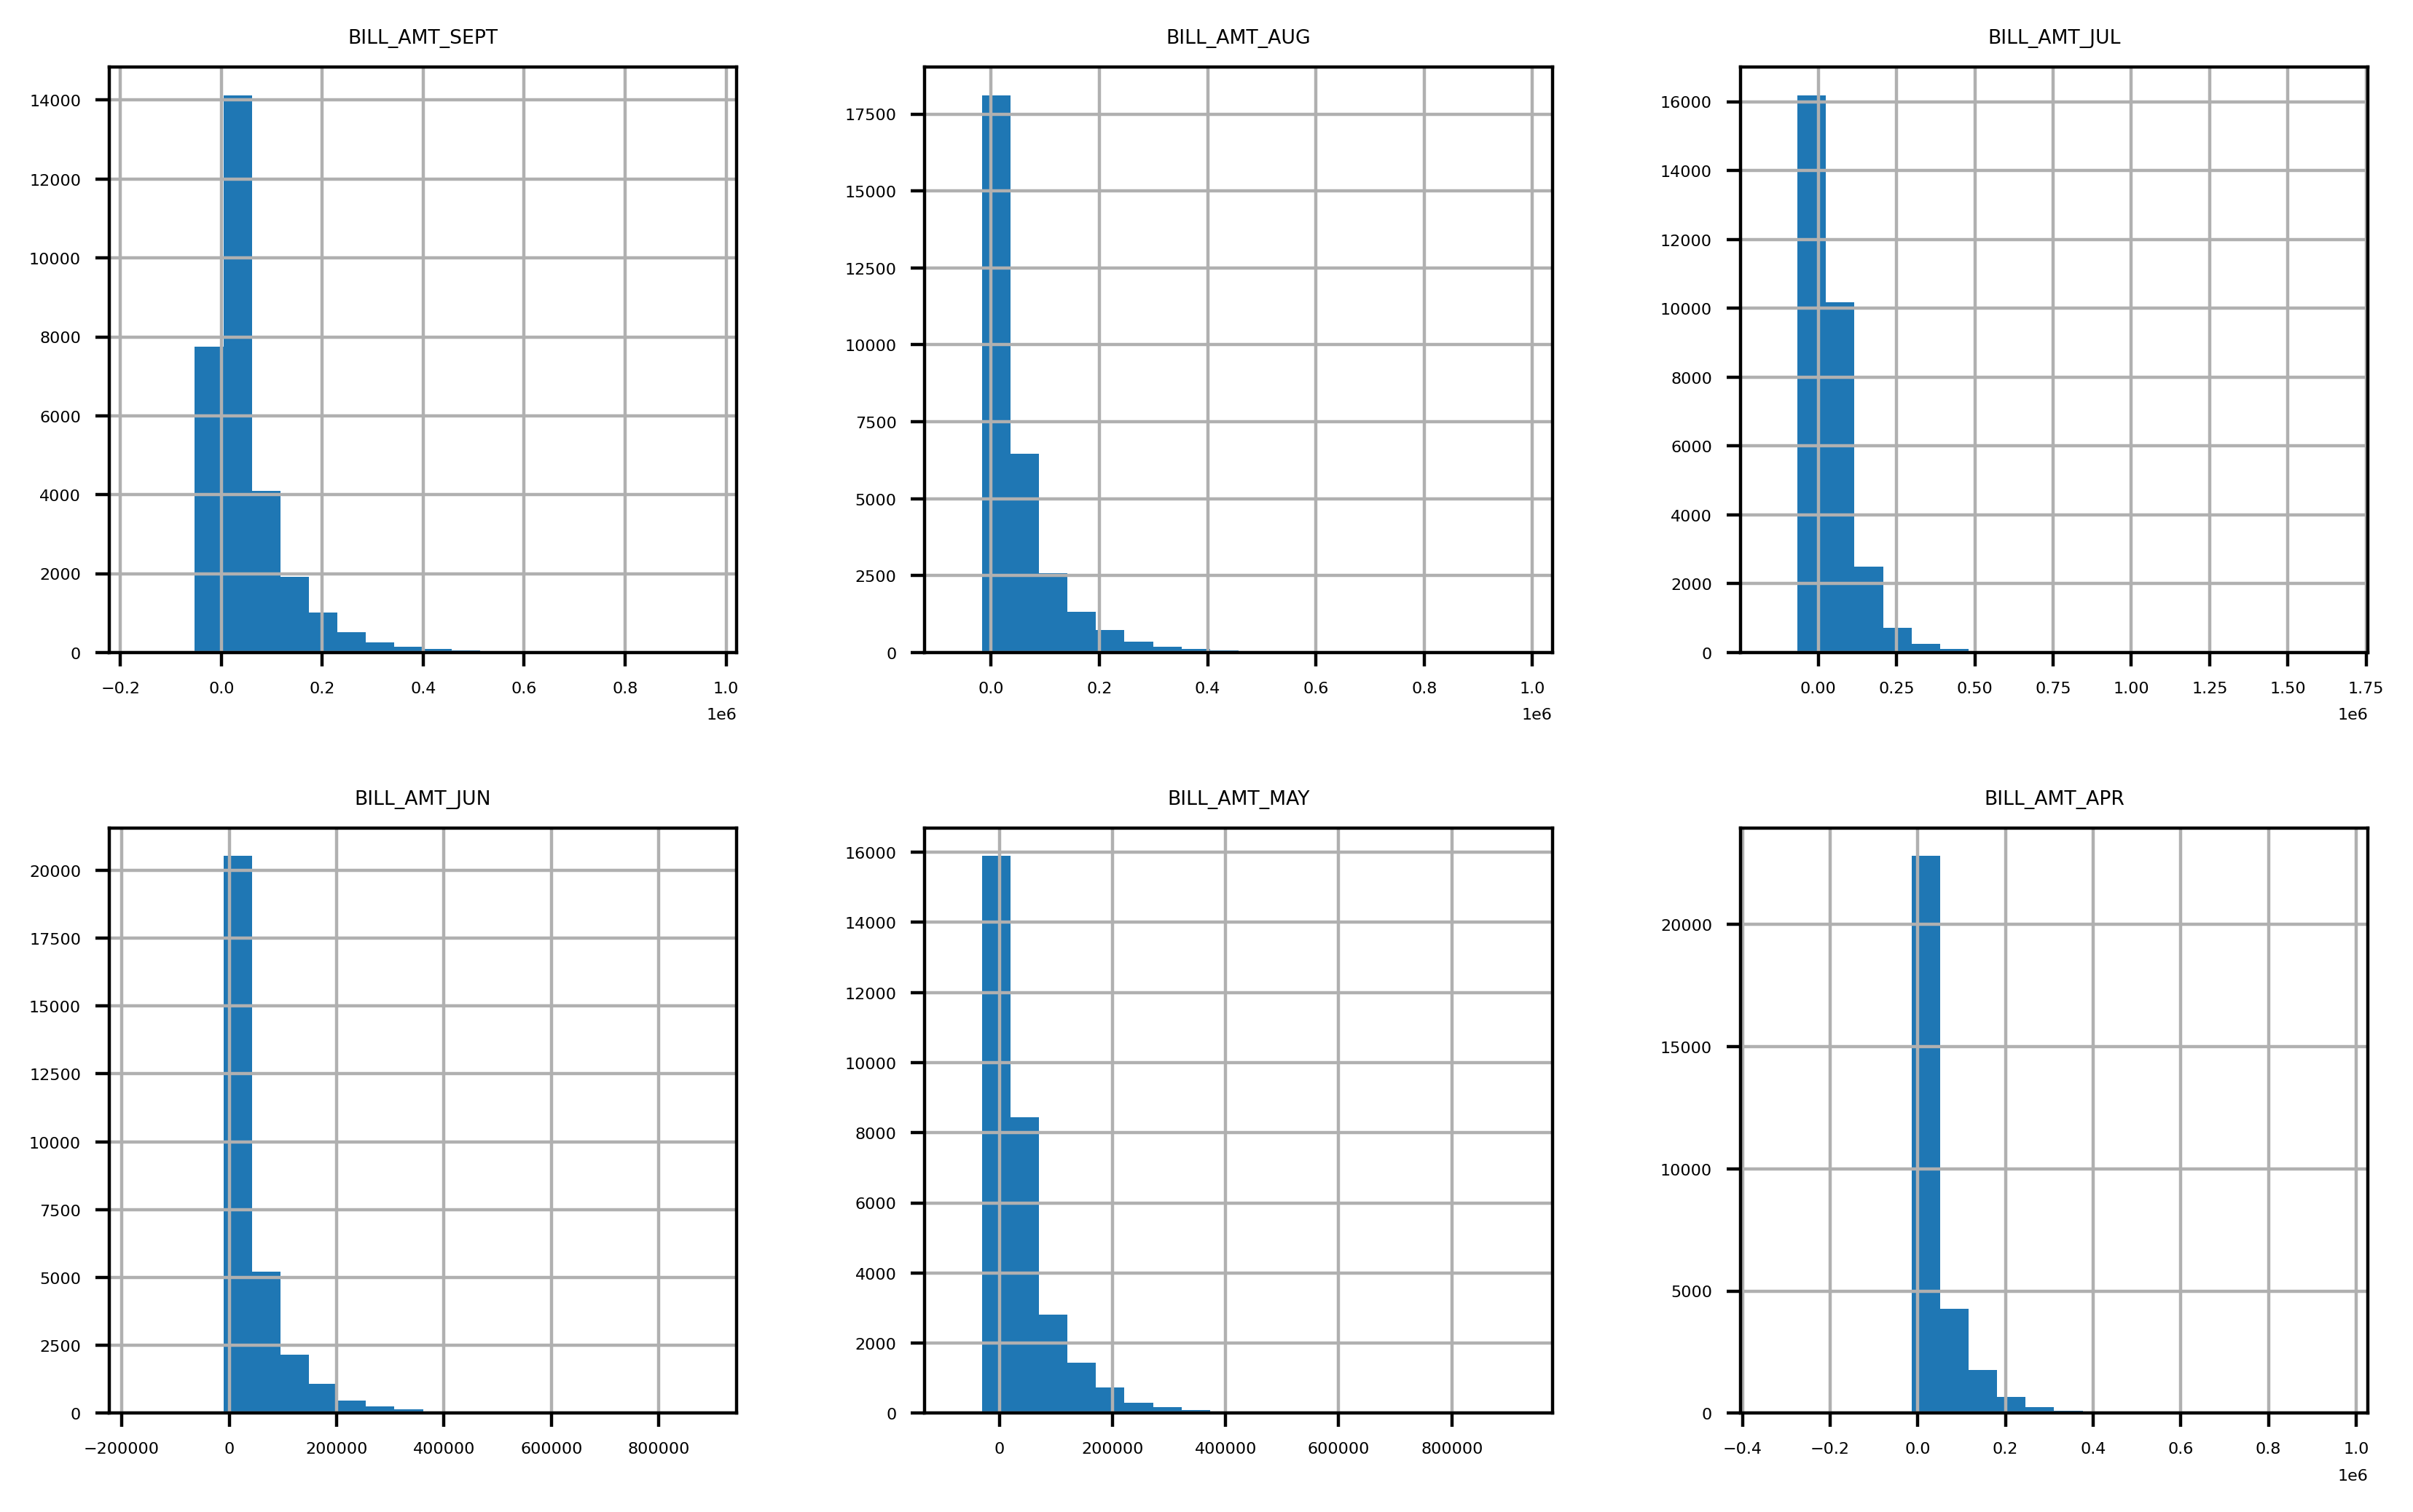

In [46]:
# now lets visualize the pay features using seaborn in a very cool way

df[billAmountFeatures].describe() # check the summary statistics
df[billAmountFeatures].hist(layout=(2, 3), figsize=(10, 6), bins=20) # plot the histograms

Observation

We can see that the bill amounts are all positive the bill amounts are also increasing from month to month. 

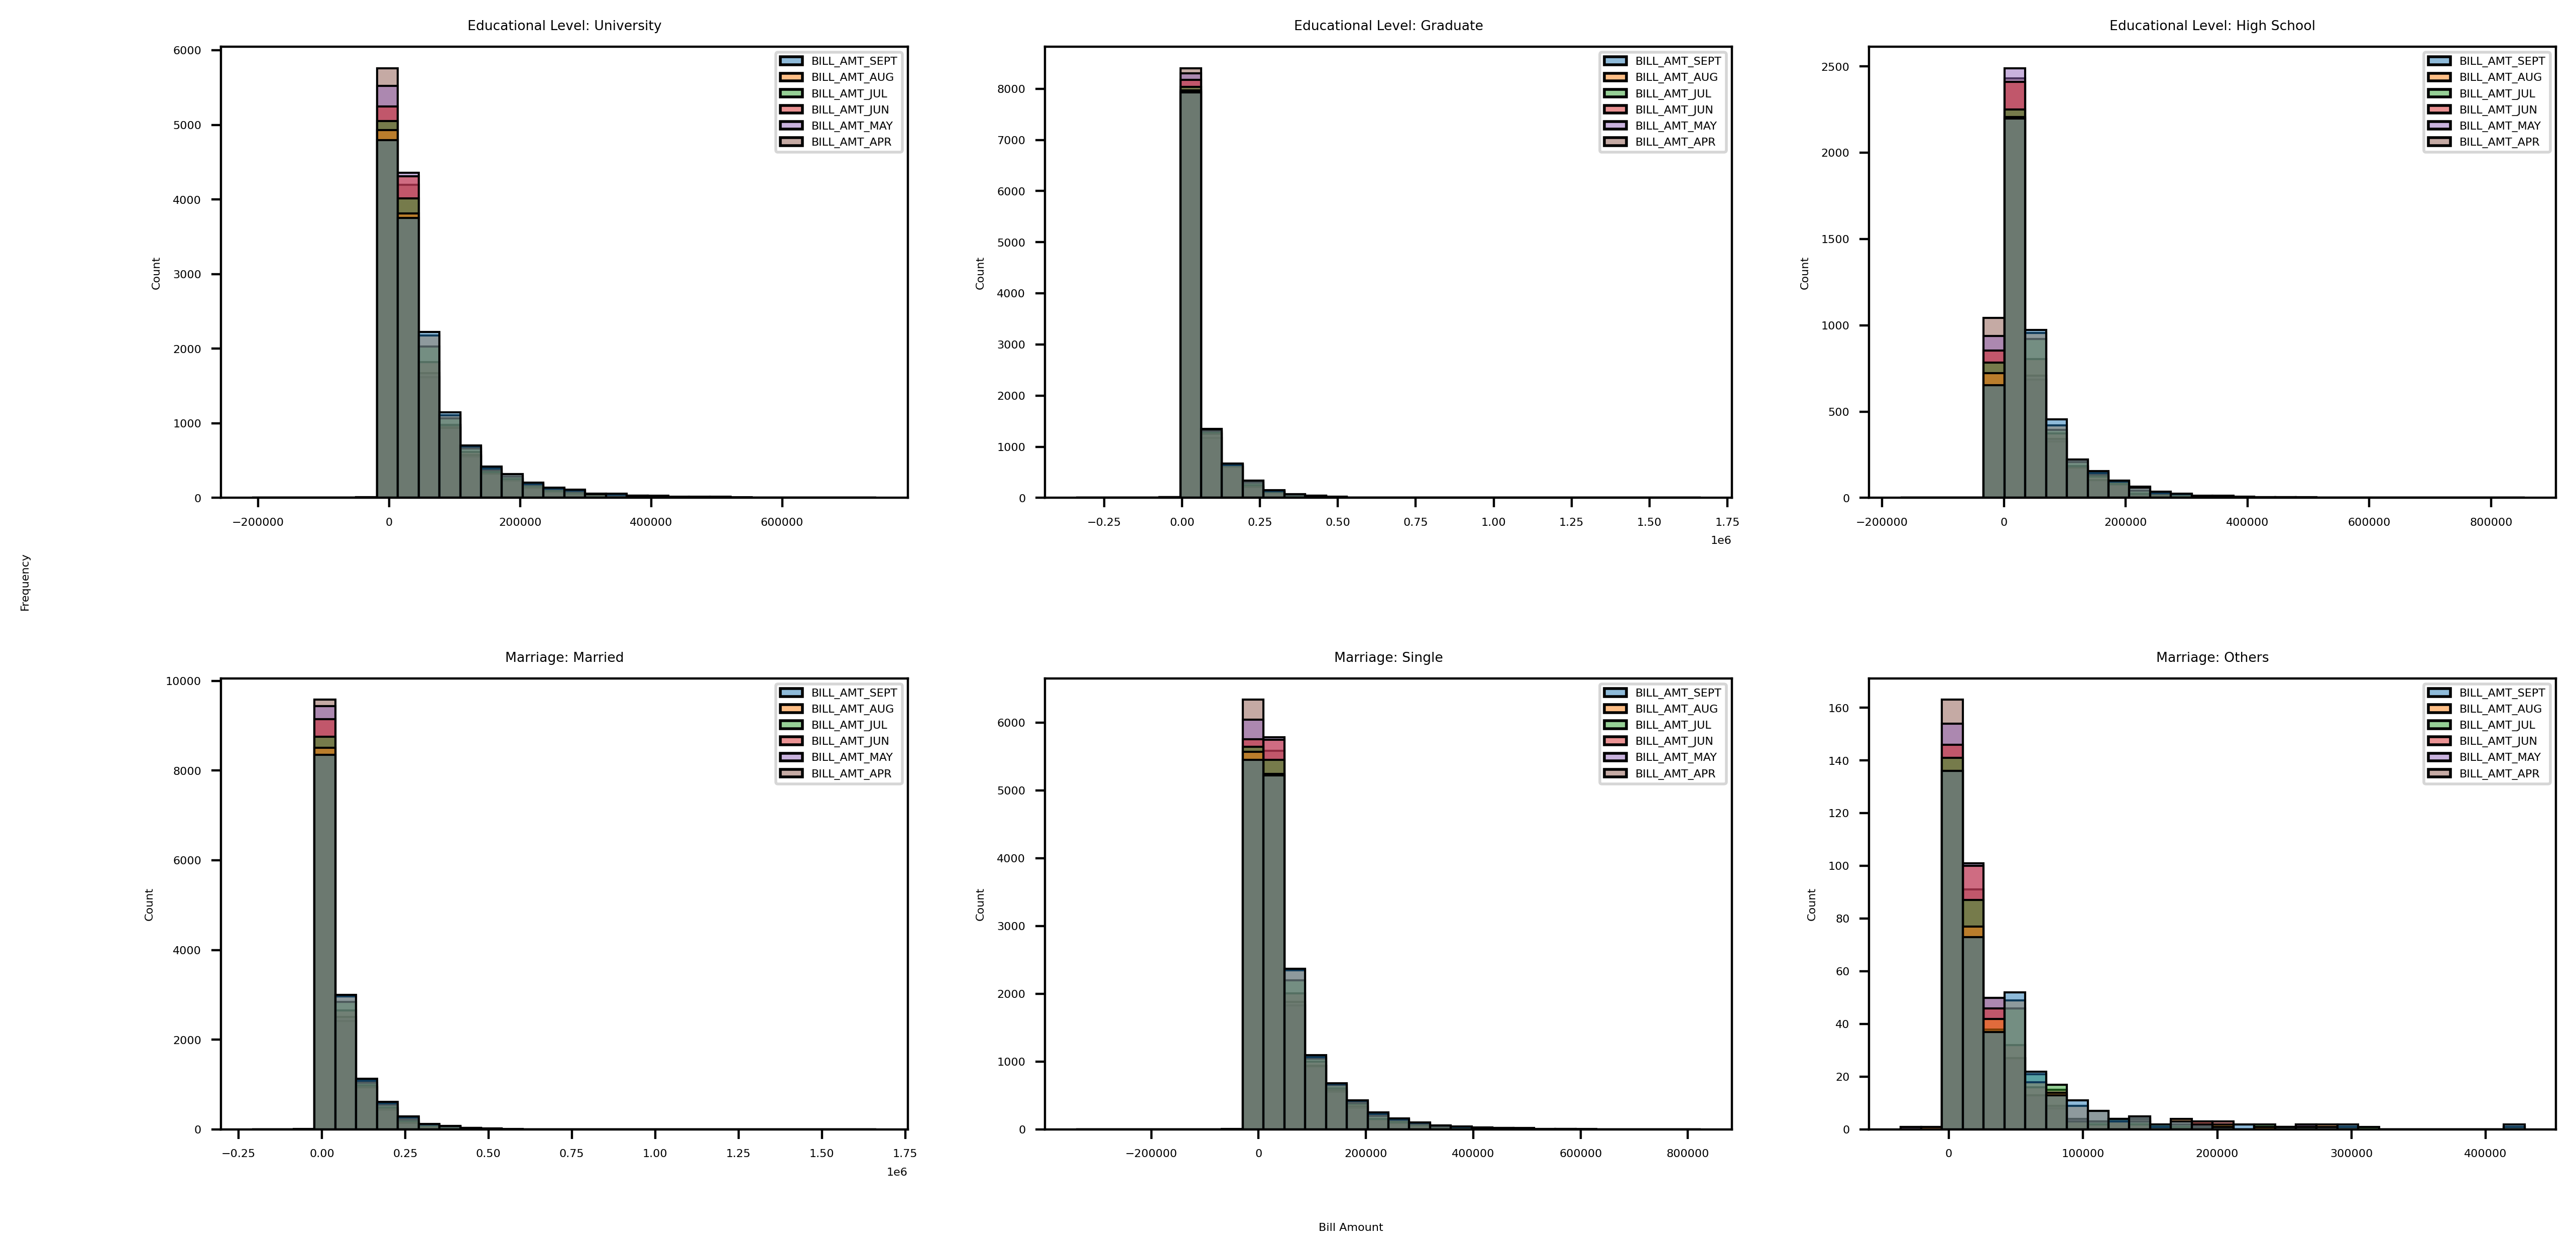

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame df and billAmountFeatures defined

# Define the education labels
education_labels = {
    1: 'Graduate',
    2: 'University',
    3: 'High School',
    4: 'Others'
}

# Define the marriage labels
marriage_labels = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}

# Subset the bill-related features
bills = df[billAmountFeatures]

# Set the color palette for the histograms
color_palette = sns.color_palette("husl", n_colors=len(df['EDUCATION'].unique()))

# Create separate histograms for Education and Marriage
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
plt.subplots_adjust(hspace=0.4)

# Education histograms
for idx, (education, ax) in enumerate(zip(df['EDUCATION'].unique(), axes[0])):
    sns.histplot(bills[df['EDUCATION'] == education], bins=30, color=color_palette[idx], alpha=0.5, ax=ax)
    ax.set_title(f"Educational Level: {education_labels[education]}")

# Marriage histograms
for idx, (marriage, ax) in enumerate(zip(df['MARRIAGE'].unique(), axes[1])):
    sns.histplot(bills[df['MARRIAGE'] == marriage], bins=30, color=color_palette[idx], alpha=0.5, ax=ax)
    ax.set_title(f"Marriage: {marriage_labels[marriage]}")

# Set common labels
fig.text(0.5, 0.04, 'Bill Amount', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

# Show the plot
plt.show()


Observation

Analysing the results of the above plot, we can see that bill amount is not overly dependent on the monthly bills and education/martial status of person.


In [8]:
df[payAmountFeatures].describe() # check the summary statistics

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT_SEPT'}>,
        <Axes: title={'center': 'PAY_AMT_AUG'}>,
        <Axes: title={'center': 'PAY_AMT_JUL'}>],
       [<Axes: title={'center': 'PAY_AMT_JUN'}>,
        <Axes: title={'center': 'PAY_AMT_MAY'}>,
        <Axes: title={'center': 'PAY_AMT_APR'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

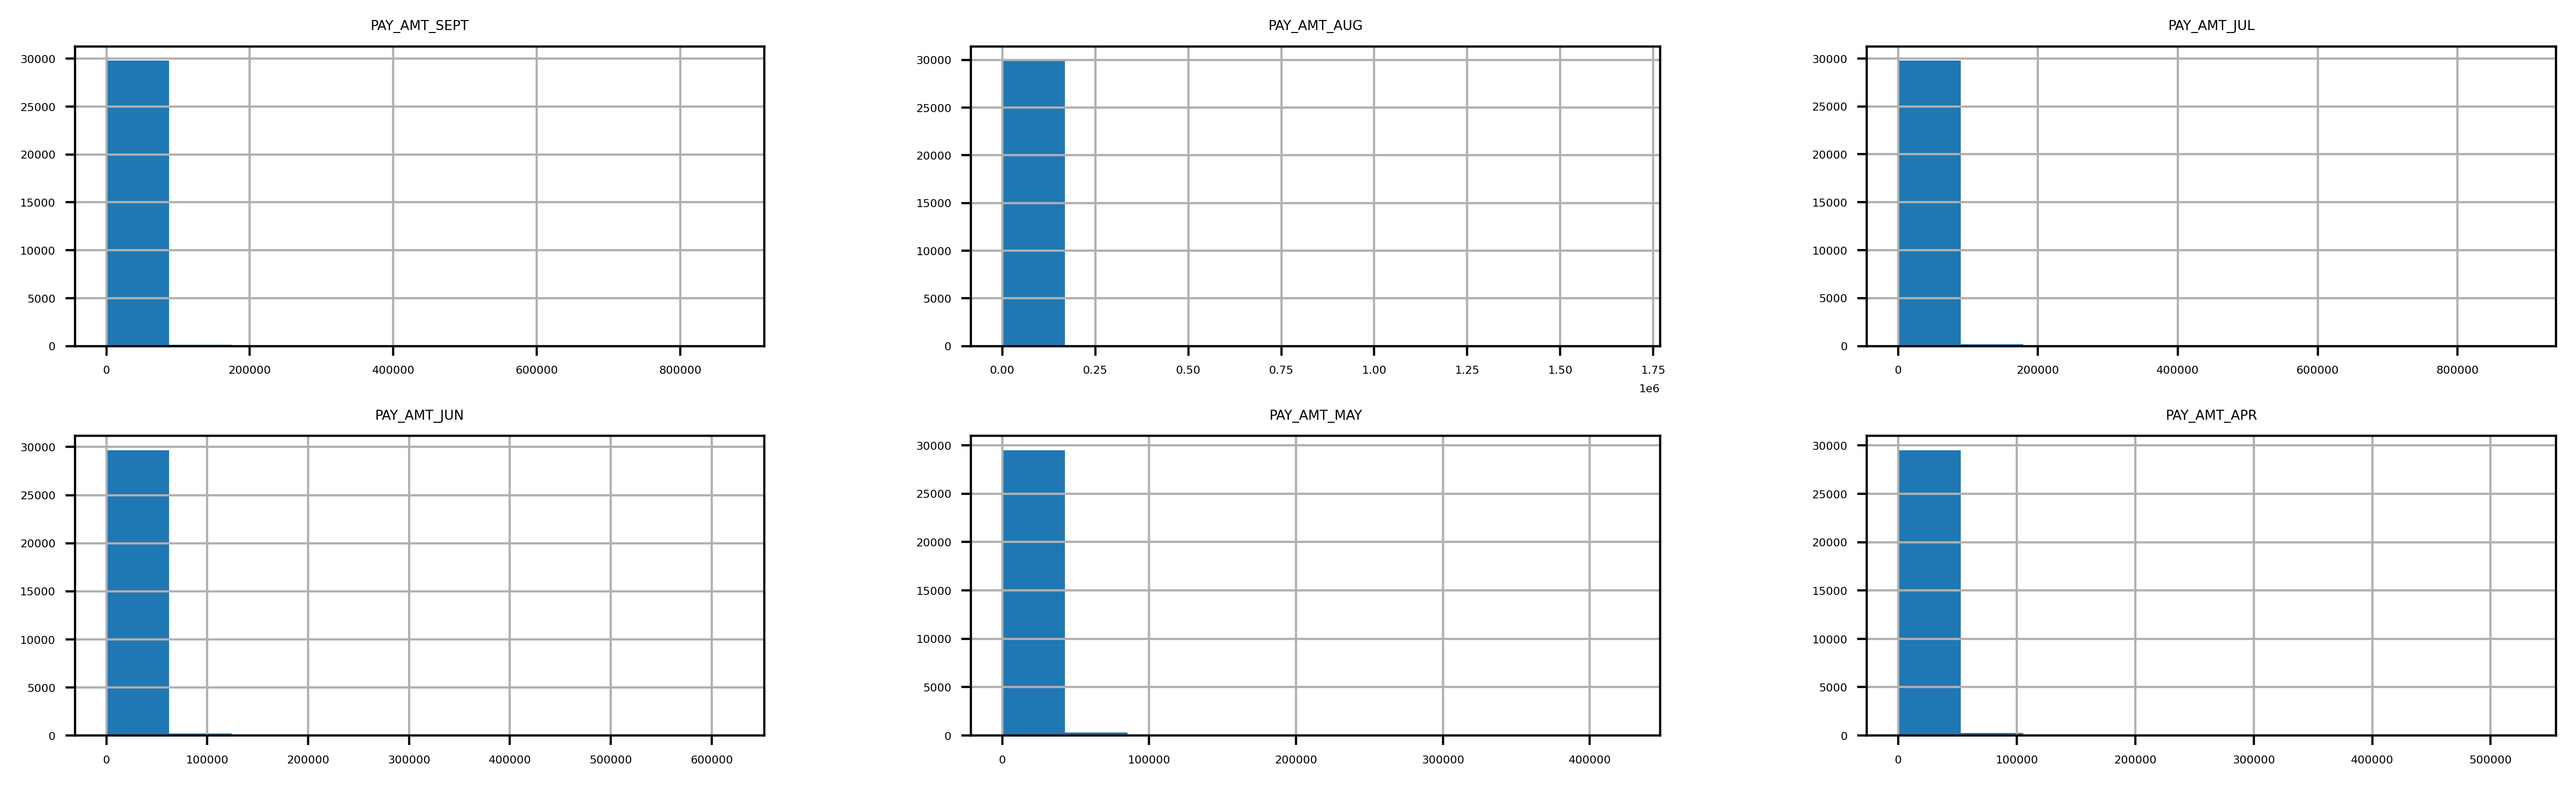

In [48]:
# Numerical Variable - Paid Amount (Amount Paid in previous months)
df[payAmountFeatures].hist(layout=(3,3), figsize=(16,7))

Observation

Based on the above presentation; we see that major of our categories are left skewed. This means for most of the population, the payment amount per month is less than 100,000 Taiwanese Dollars. Due to left skewness we need to normalize them by applying natural log. 

array([[<Axes: title={'center': 'PAY_AMT_SEPT'}>,
        <Axes: title={'center': 'PAY_AMT_AUG'}>,
        <Axes: title={'center': 'PAY_AMT_JUL'}>],
       [<Axes: title={'center': 'PAY_AMT_JUN'}>,
        <Axes: title={'center': 'PAY_AMT_MAY'}>,
        <Axes: title={'center': 'PAY_AMT_APR'}>]], dtype=object)

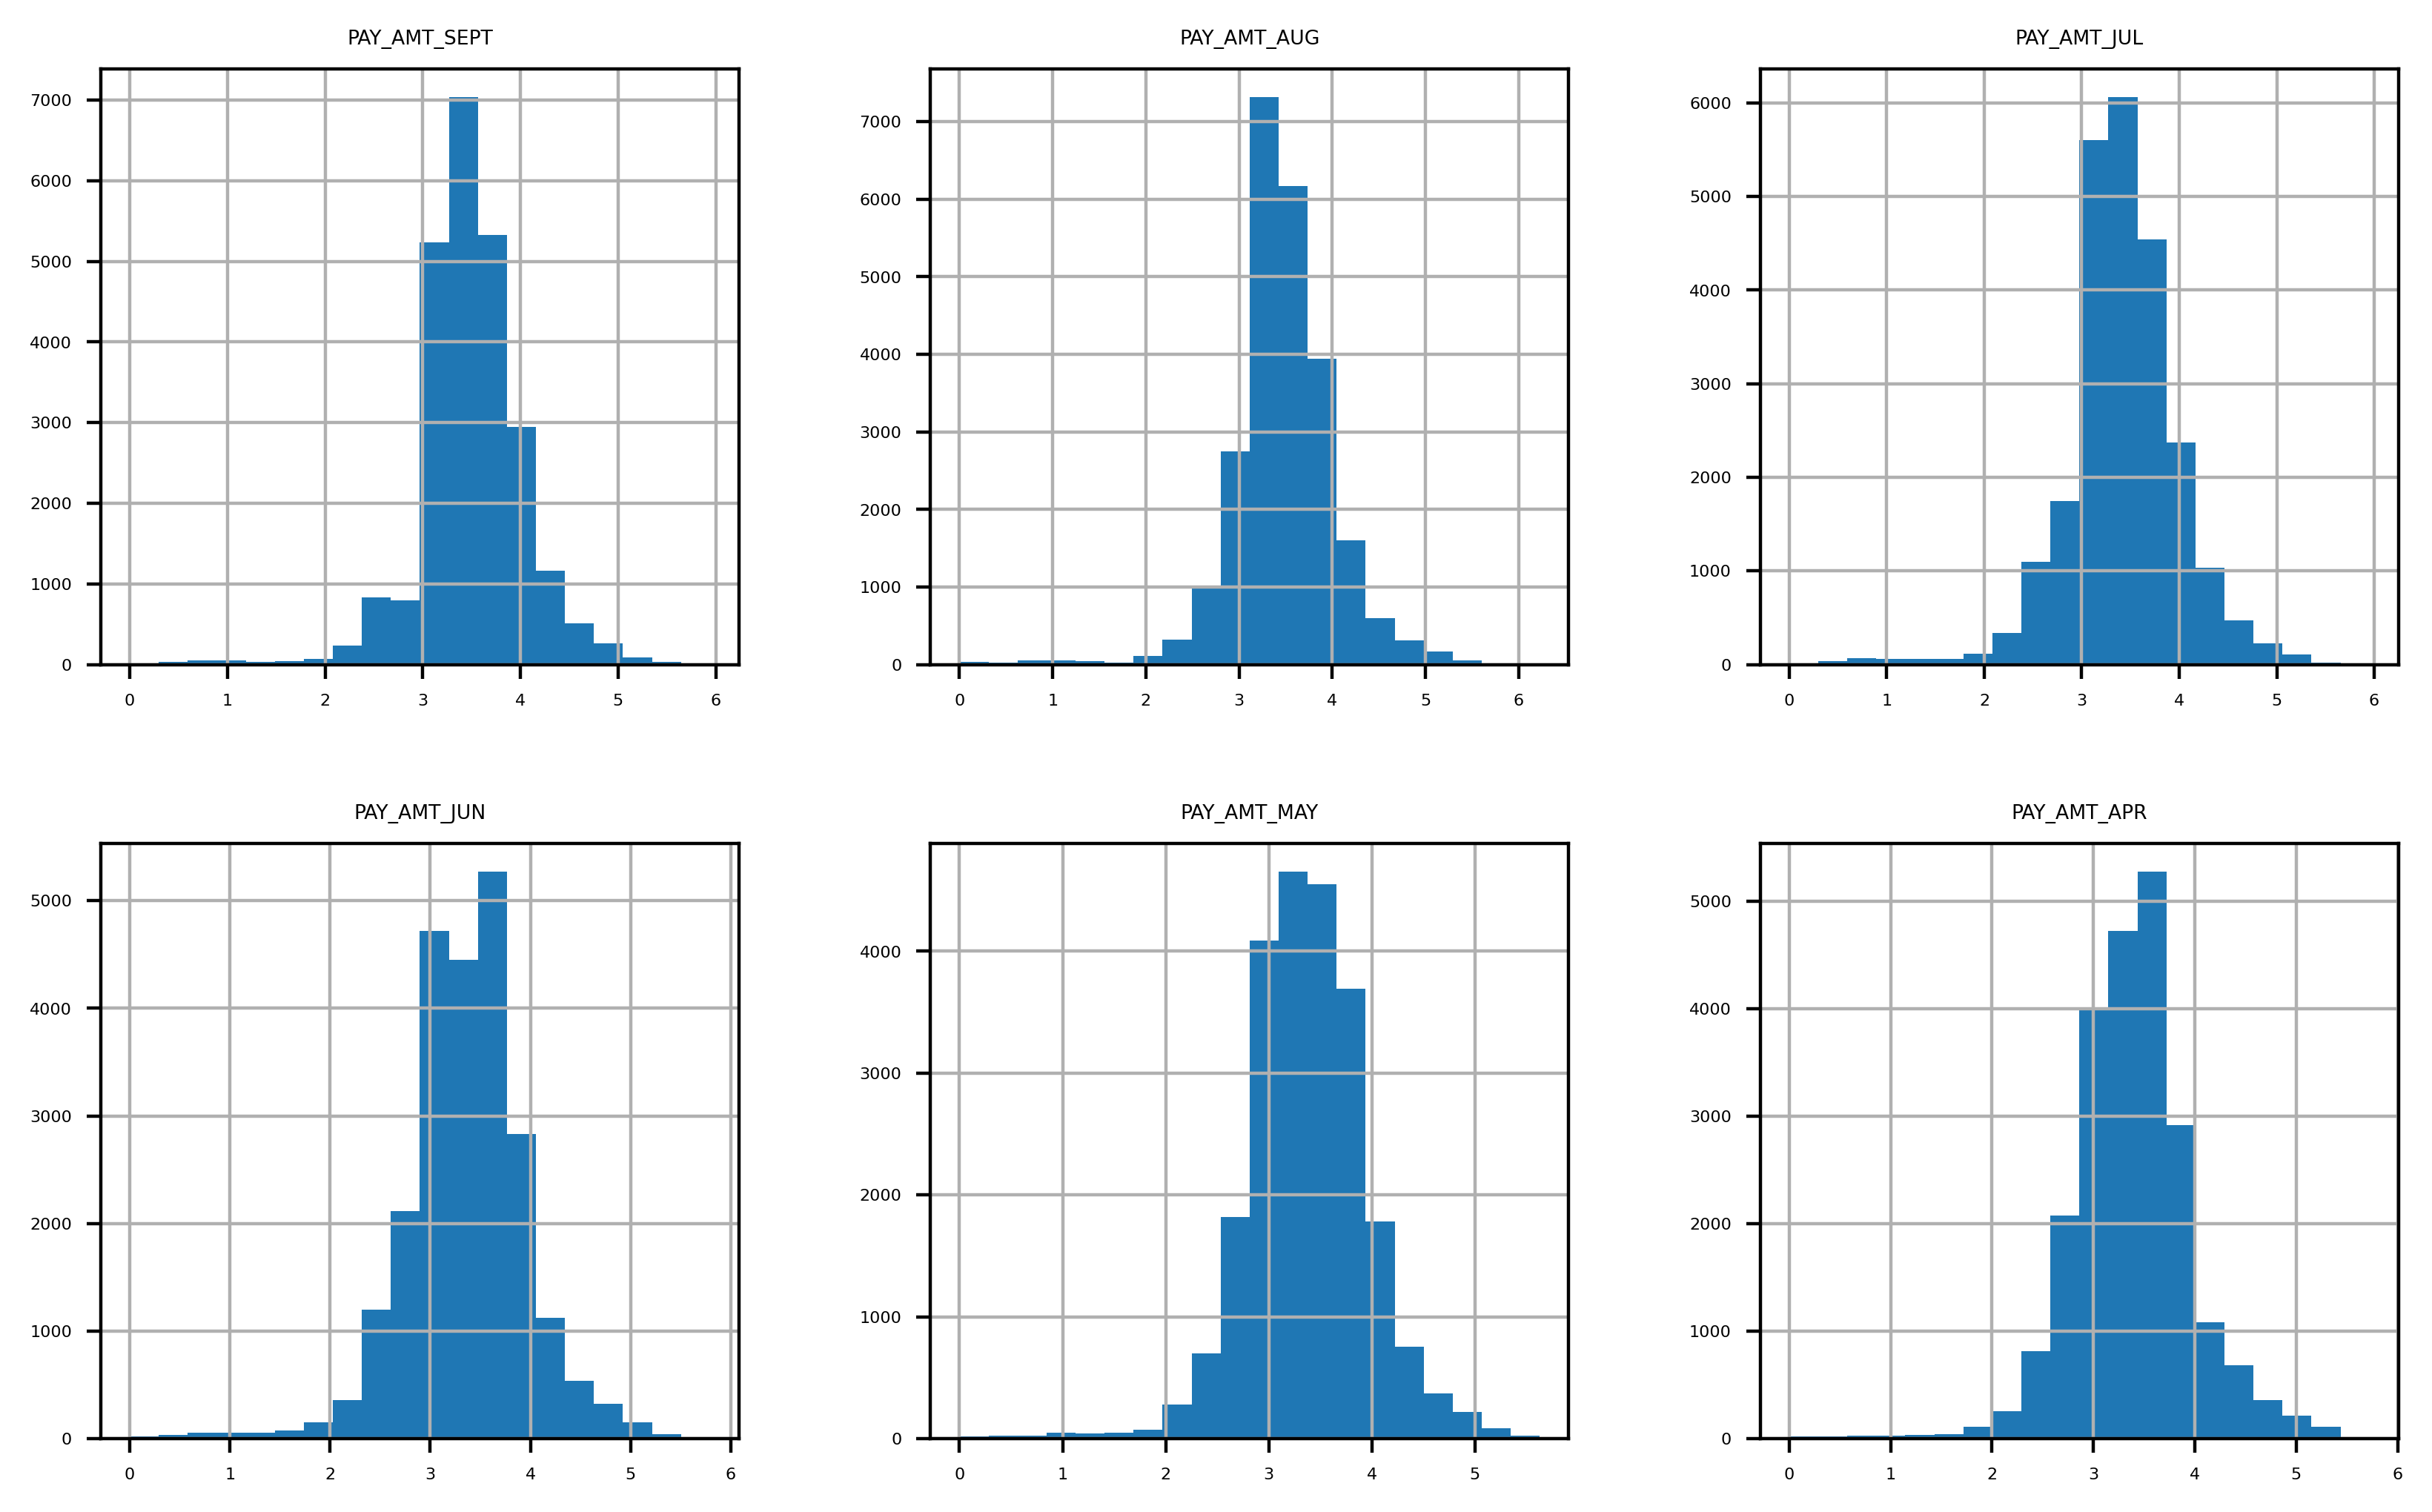

In [9]:
pay_zero_mask = df[payAmountFeatures] == 0
df[payAmountFeatures][~pay_zero_mask].apply(np.log10).hist(layout=(2,3), figsize=(10,6), bins=20)

#### Now lets check the correlation between the bill amounts and the pay amounts

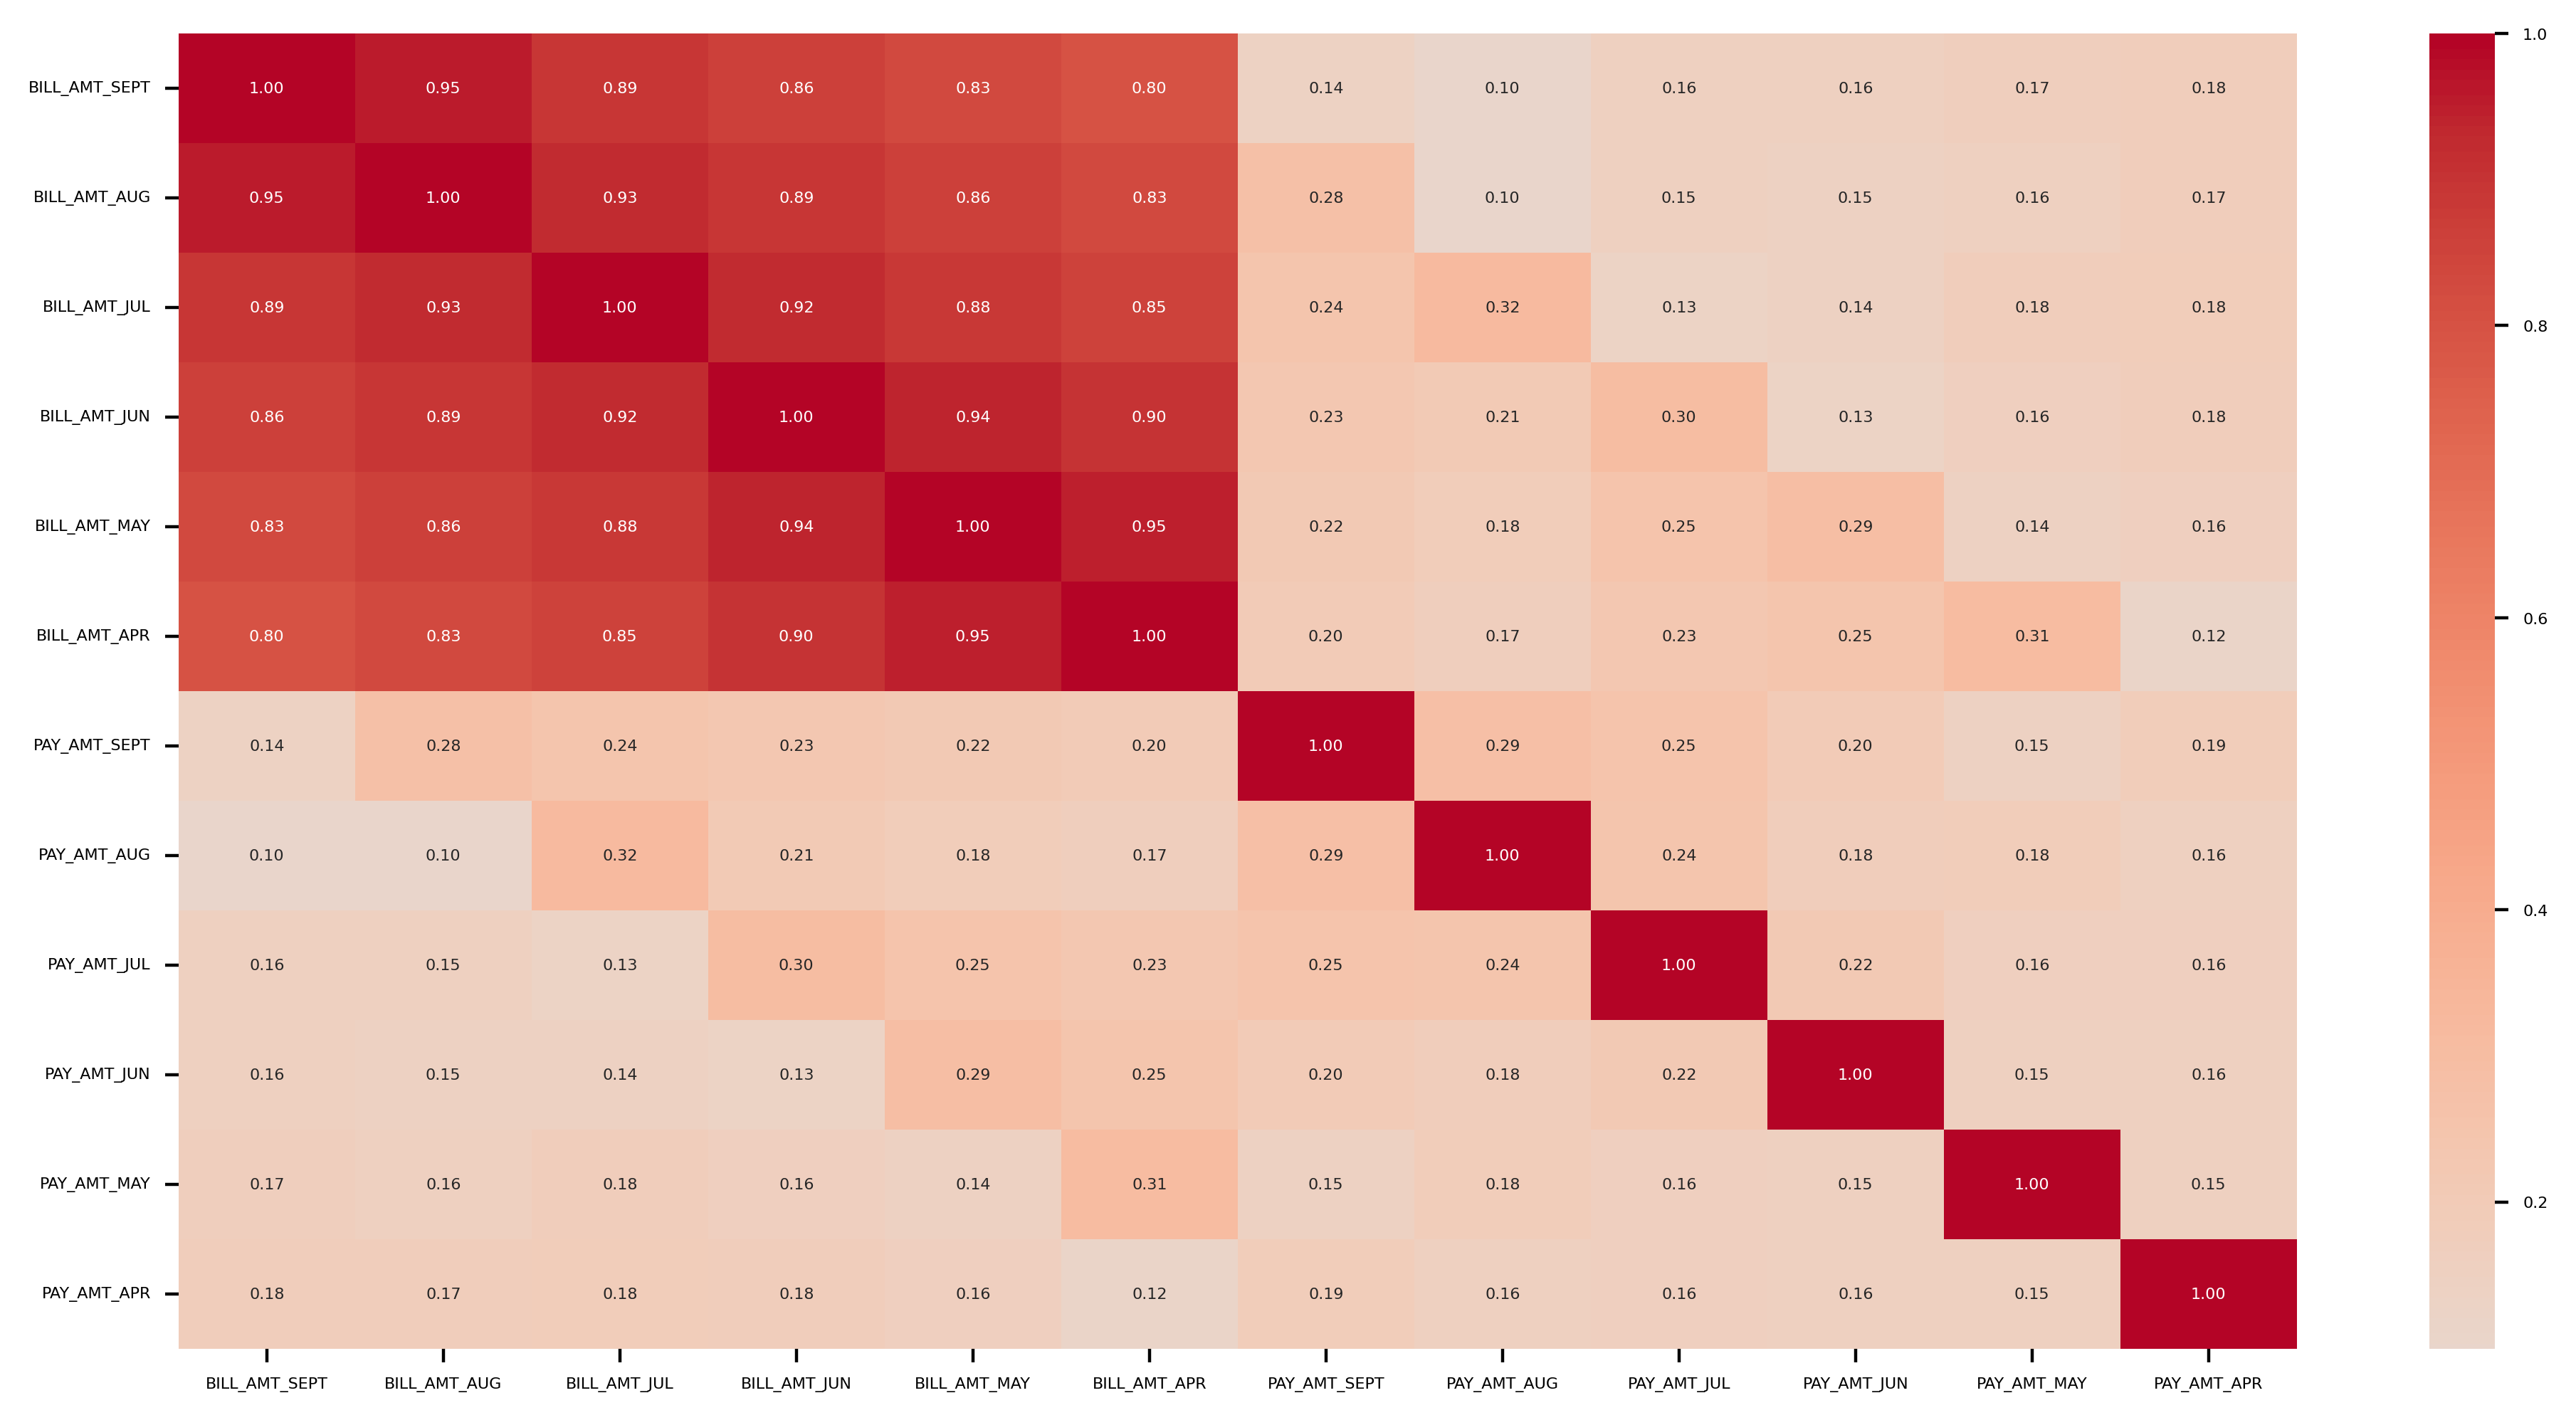

In [10]:

# we will use the .corr() method
corr_matrix = df[billAmountFeatures + payAmountFeatures].corr() # create a correlation matrix
# we can plot a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 6)) # set the figure size
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0) # plot the heatmap
plt.show() # show the plot


Observation 

The bill amounts are highly correlated with each other the pay amounts are also highly correlated with each other

In [12]:
# Exploring the Response Variable and Concluding the intial EDA
# lets check the distribution of the response variable  (default payment next month)
df['default.payment.next.month'].value_counts() # check the counts
# 0 = not default; 1 = default
df['default.payment.next.month'].value_counts() / len(df) # check the percentages

default.payment.next.month
0    0.7788
1    0.2212
Name: count, dtype: float64

In [13]:
# lets check how many people default on their credit card payments by education category
# we will use the groupby() method
df.groupby('EDUCATION_CAT')['default.payment.next.month'].value_counts() # check the counts

EDUCATION_CAT    default.payment.next.month
graduate school  0                              8549
                 1                              2036
high school      0                              3680
                 1                              1237
others           0                               435
                 1                                33
university       0                             10700
                 1                              3330
Name: count, dtype: int64

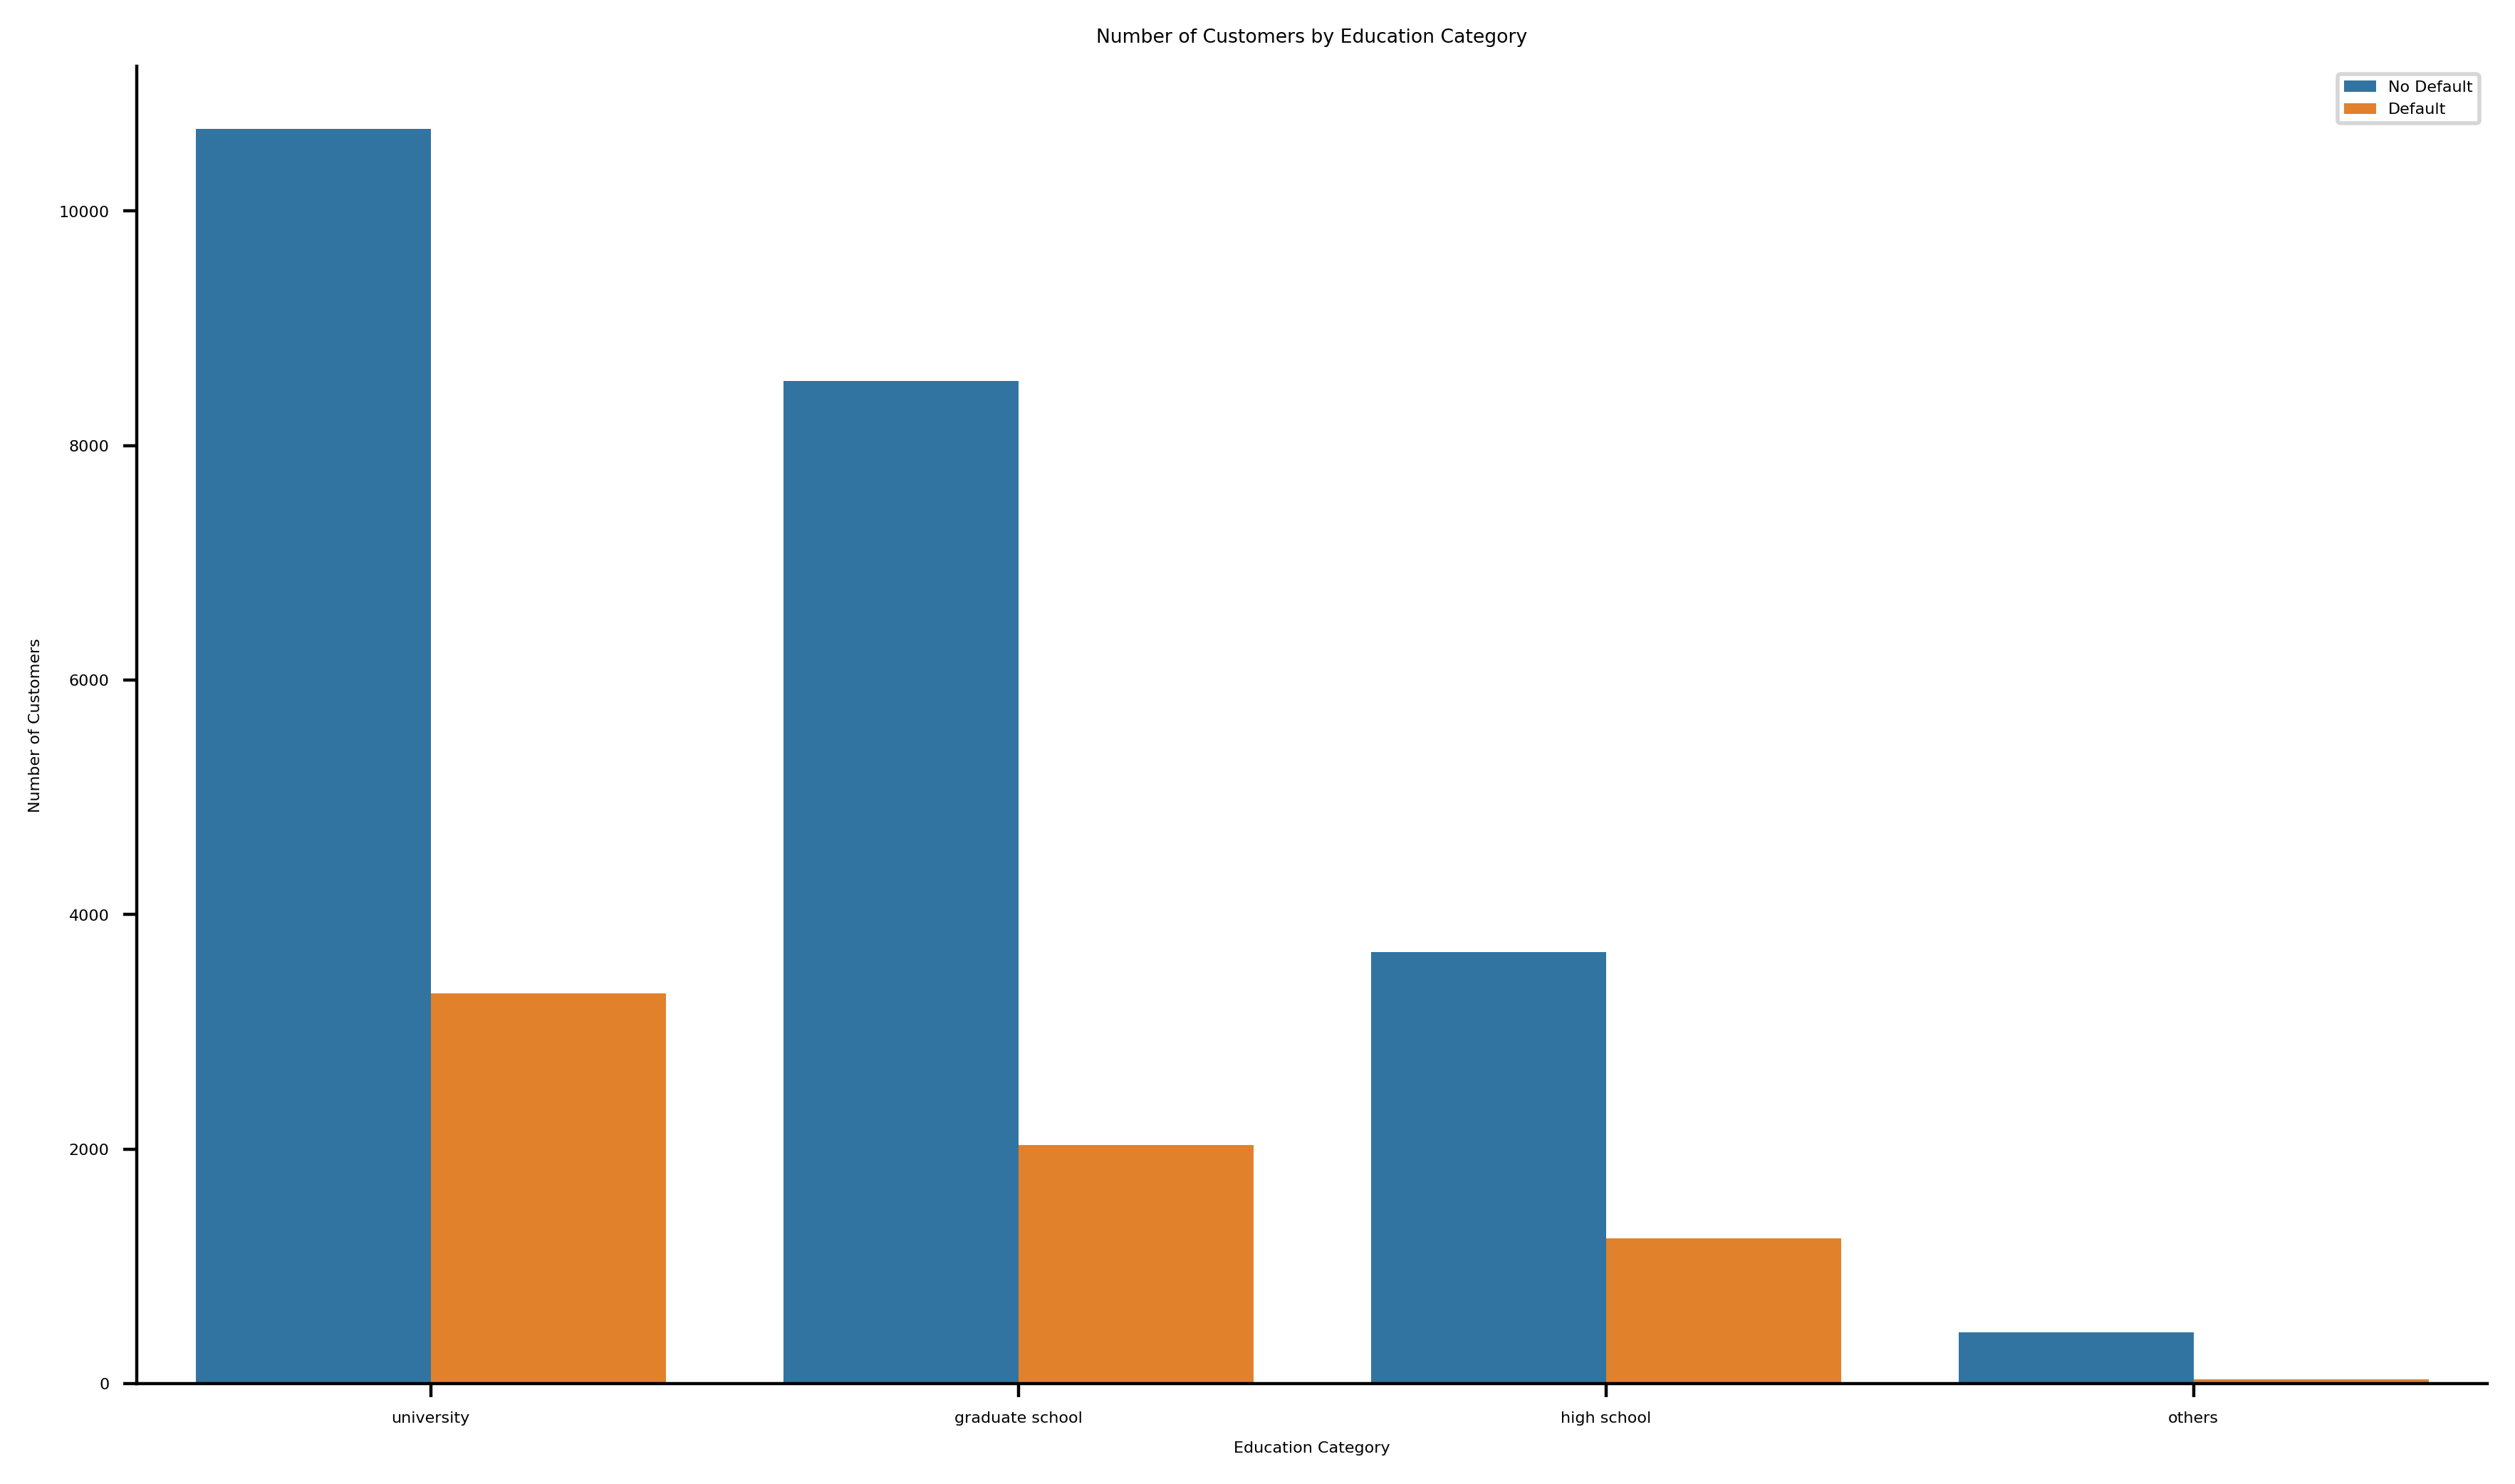

In [14]:
# lets plot a bar plot of the above with x = EDUCATION_CAT and hue = default.payment.next.month
# also we will include x_labels and y_labels with legend and title
# legend = True will show the legend
sns.catplot(x='EDUCATION_CAT', hue='default.payment.next.month', data=df, kind='count', legend=False,aspect=1.75)
plt.xlabel('Education Category')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Education Category')
plt.legend(['No Default', 'Default'])
plt.show() # show the plot



## Model Comparisions

In [15]:
# lets check various models and see which one performs the best
# we will use the following models
# 1. Logistic Regression
# 2. Decision Tree
# 3. Random Forest



## Feature Engineering

In [16]:
df_clean = df.copy() # make a copy of the dataframe

# now idea is that we will create bill_carry over feature for each month
# this will be the difference between the bill amount and the pay amount for each month
# for example bill_carry_sept = bill_amt_sept - pay_amt_sep + bill_carry_aug
# bill_carry_aug = bill_amt_aug - pay_amt_aug + bill_carry_jul

# we will use the shift() method to create the bill_carry over feature for each month

# first we will create a list of the bill amount features
bill_amt_feats = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']

# now we will create a list of the pay amount features
pay_amt_feats = ['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']

# now we will create a list of the bill carry over features
bill_carry_feats = ['BILL_CARRY_SEPT','BILL_CARRY_AUG','BILL_CARRY_JUL','BILL_CARRY_JUN','BILL_CARRY_MAY','BILL_CARRY_APR']

# we will use a loop to create the bill carry over features
for i in range(6):
    # create the bill carry over features
    df_clean[bill_carry_feats[i]] = df_clean[bill_amt_feats[i]] - df_clean[pay_amt_feats[i]] + df_clean[bill_amt_feats[i-1]]
    
# now lets check the first 5 rows of the new dataframe
df_clean.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,graduate school,high school,others,university,BILL_CARRY_SEPT,BILL_CARRY_AUG,BILL_CARRY_JUL,BILL_CARRY_JUN,BILL_CARRY_MAY,BILL_CARRY_APR
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,False,False,False,True,3913.0,6326.0,3791.0,689.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,False,False,False,True,5943.0,3407.0,3407.0,4954.0,6727.0,4716.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,False,False,False,True,43270.0,41766.0,26586.0,26890.0,28279.0,25497.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,False,False,False,True,74537.0,93204.0,96324.0,76505.0,56204.0,57506.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,False,False,False,True,25748.0,-22394.0,31505.0,47775.0,39397.0,37598.0


In [17]:
# Now we will use Logistic Regression to predict the default payment next month using our features

df_clean.columns # check the column names

# remove education_cat
df_clean.drop(['EDUCATION_CAT'], axis=1, inplace=True)
df_clean.columns # check the column names

# now divide the dataframe into features and response variable
X = df_clean.drop(['ID','default.payment.next.month'], axis=1) # features
y = df_clean['default.payment.next.month'] # response variable

# now we will use the train_test_split() method to split the data into training and testing sets
# we will use the stratify parameter to make sure that the training and testing sets have the same proportion of 0s and 1s
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

# we can create a pipleine where we are scaling the data and then using logistic regression
# we will use the Pipeline() method
# we will use the StandardScaler() method to scale the data
# we will use the LogisticRegression() method to create the logistic regression model
# we will use the memory parameter to cache the transformers

# create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scale_lr_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=24, max_iter=1000))], memory='cache_folder')

# now we will use the cross_val_score() method to perform cross validation
# we will use the scoring parameter to specify the scoring metric
# we will use the cv parameter to specify the number of folds

# perform cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(scale_lr_pipeline, X_train, y_train, scoring='roc_auc', cv=5)

# now lets check the scores
scores # check the scores


array([0.73207516, 0.71375659, 0.73138689, 0.71383468, 0.72770367])

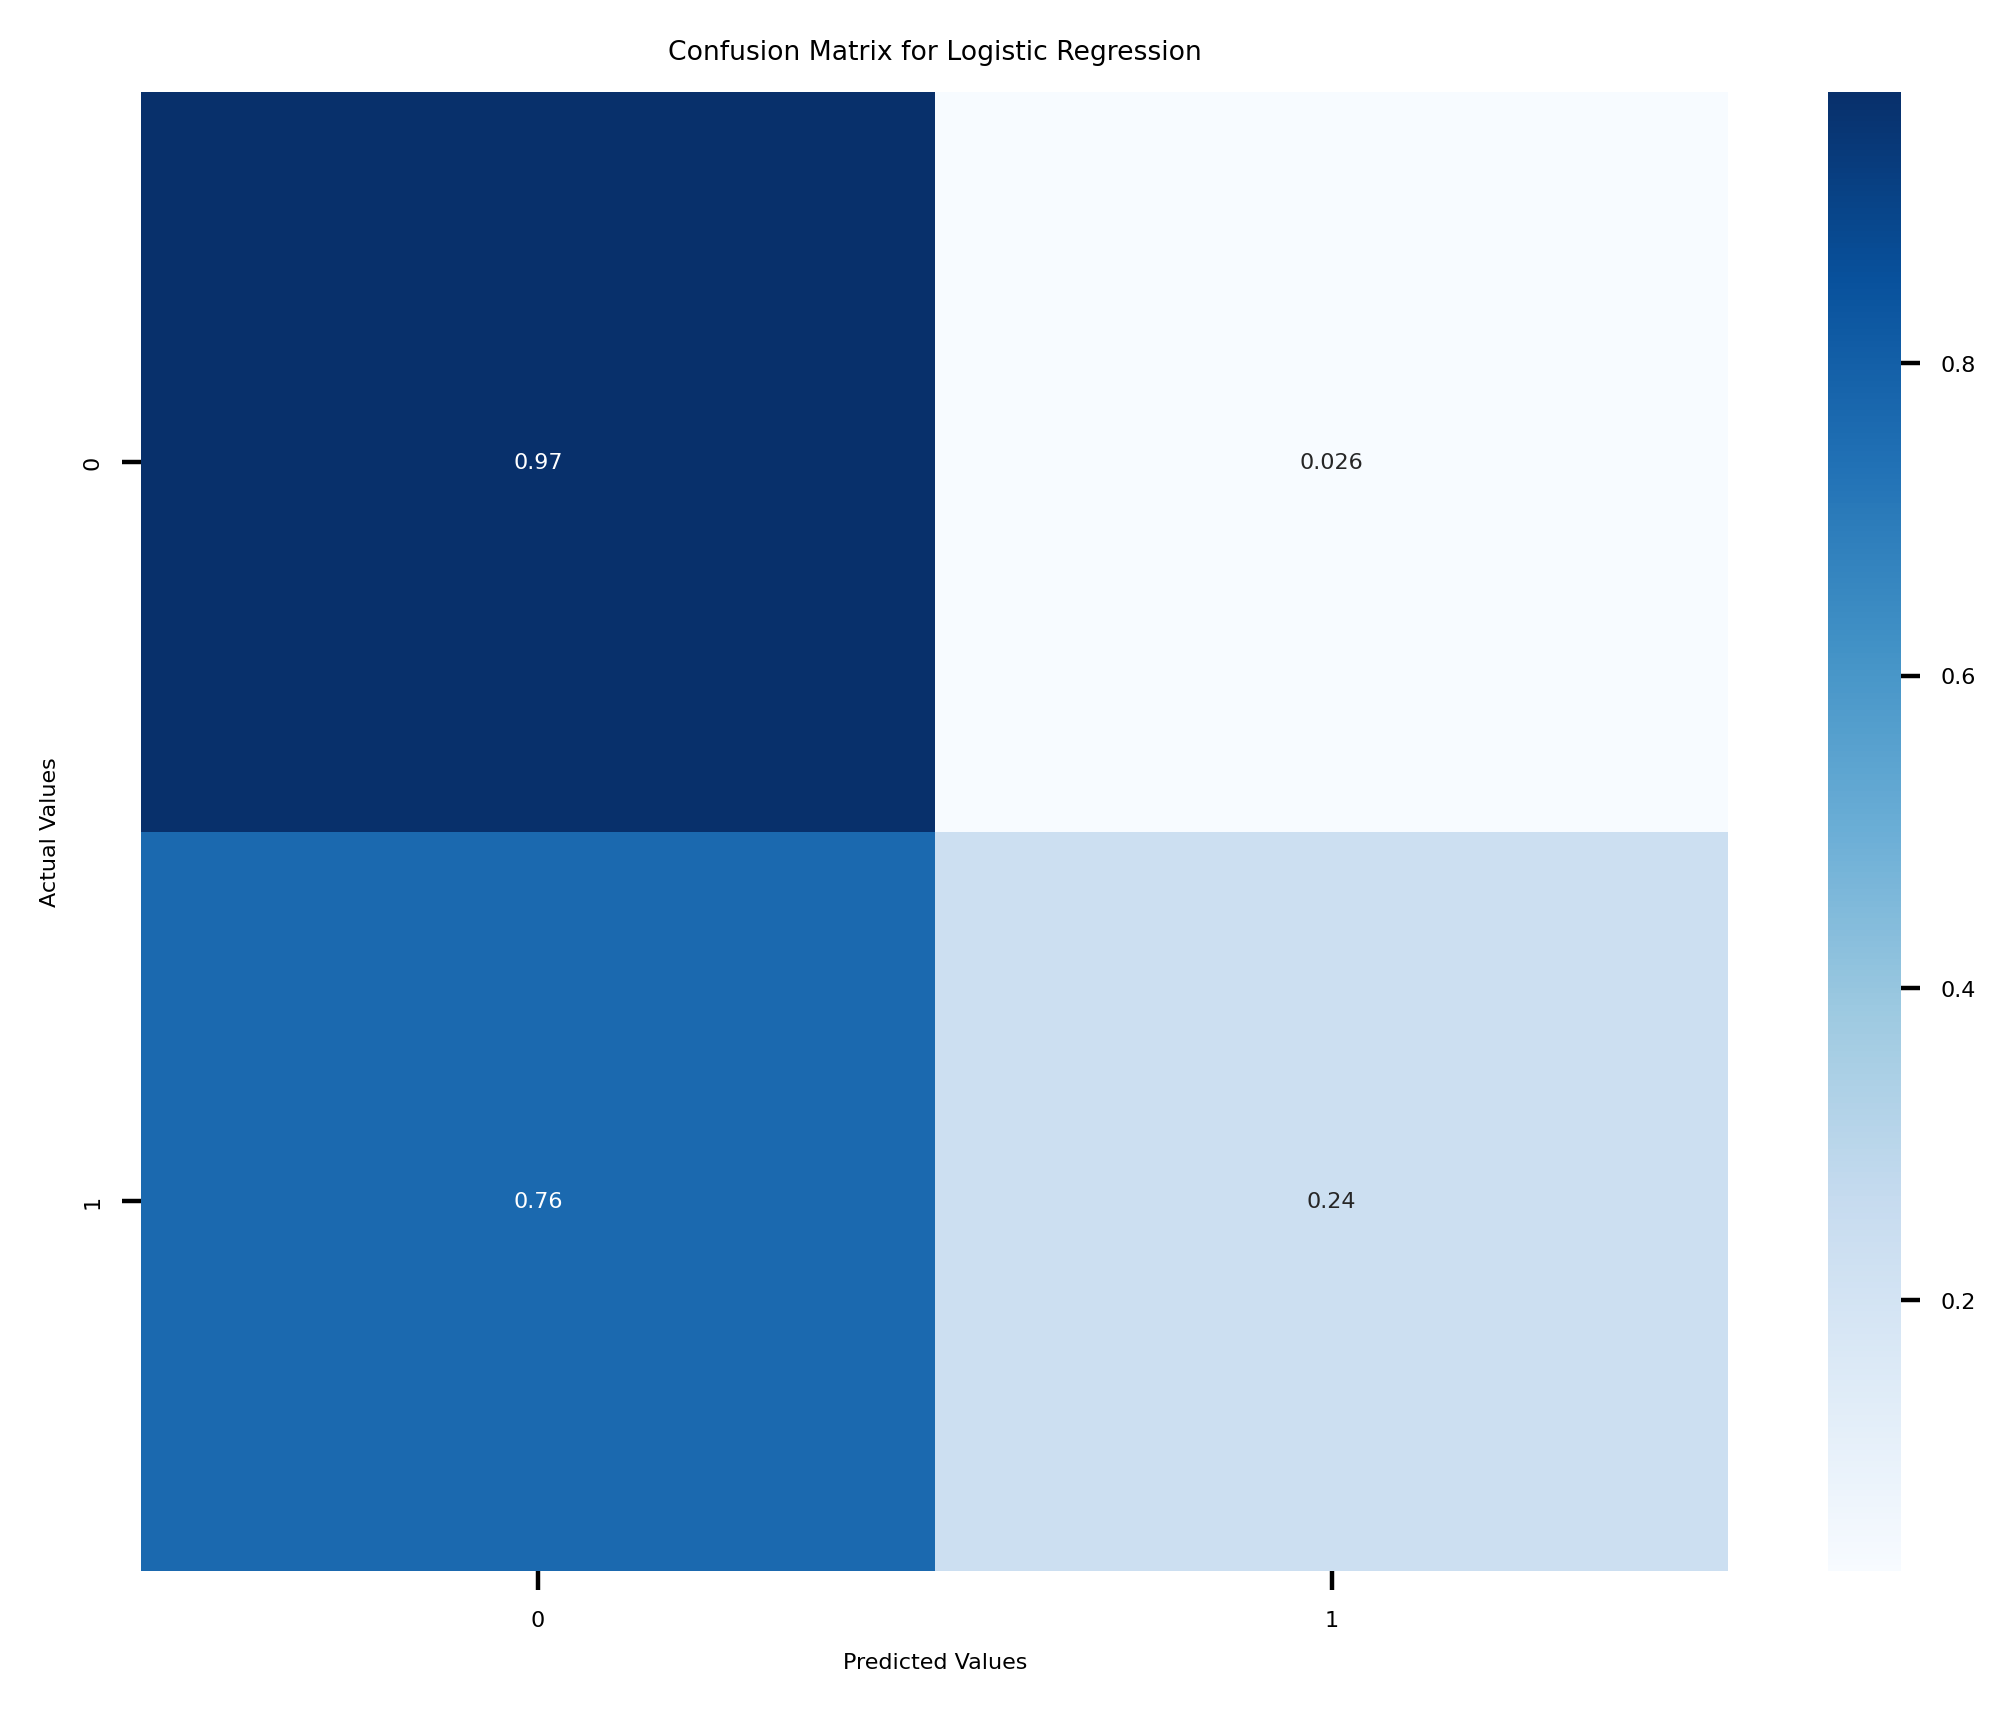

In [18]:
# lets print confusion matrix, accuracy, precision, recall, and f1 score
# we will use the cross_val_predict() method to perform cross validation
# we will use the confusion_matrix() method to create the confusion matrix
# we will use the accuracy_score() method to calculate the accuracy
# we will use the precision_score() method to calculate the precision
# we will use the recall_score() method to calculate the recall

# perform cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(scale_lr_pipeline, X_train, y_train, cv=5)

# plot confusion matrix using heatmap
import seaborn as sns
conf_matrix = confusion_matrix(y_train, y_train_pred,normalize='true') # create the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues') # plot the confusion matrix
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show() # show the plot





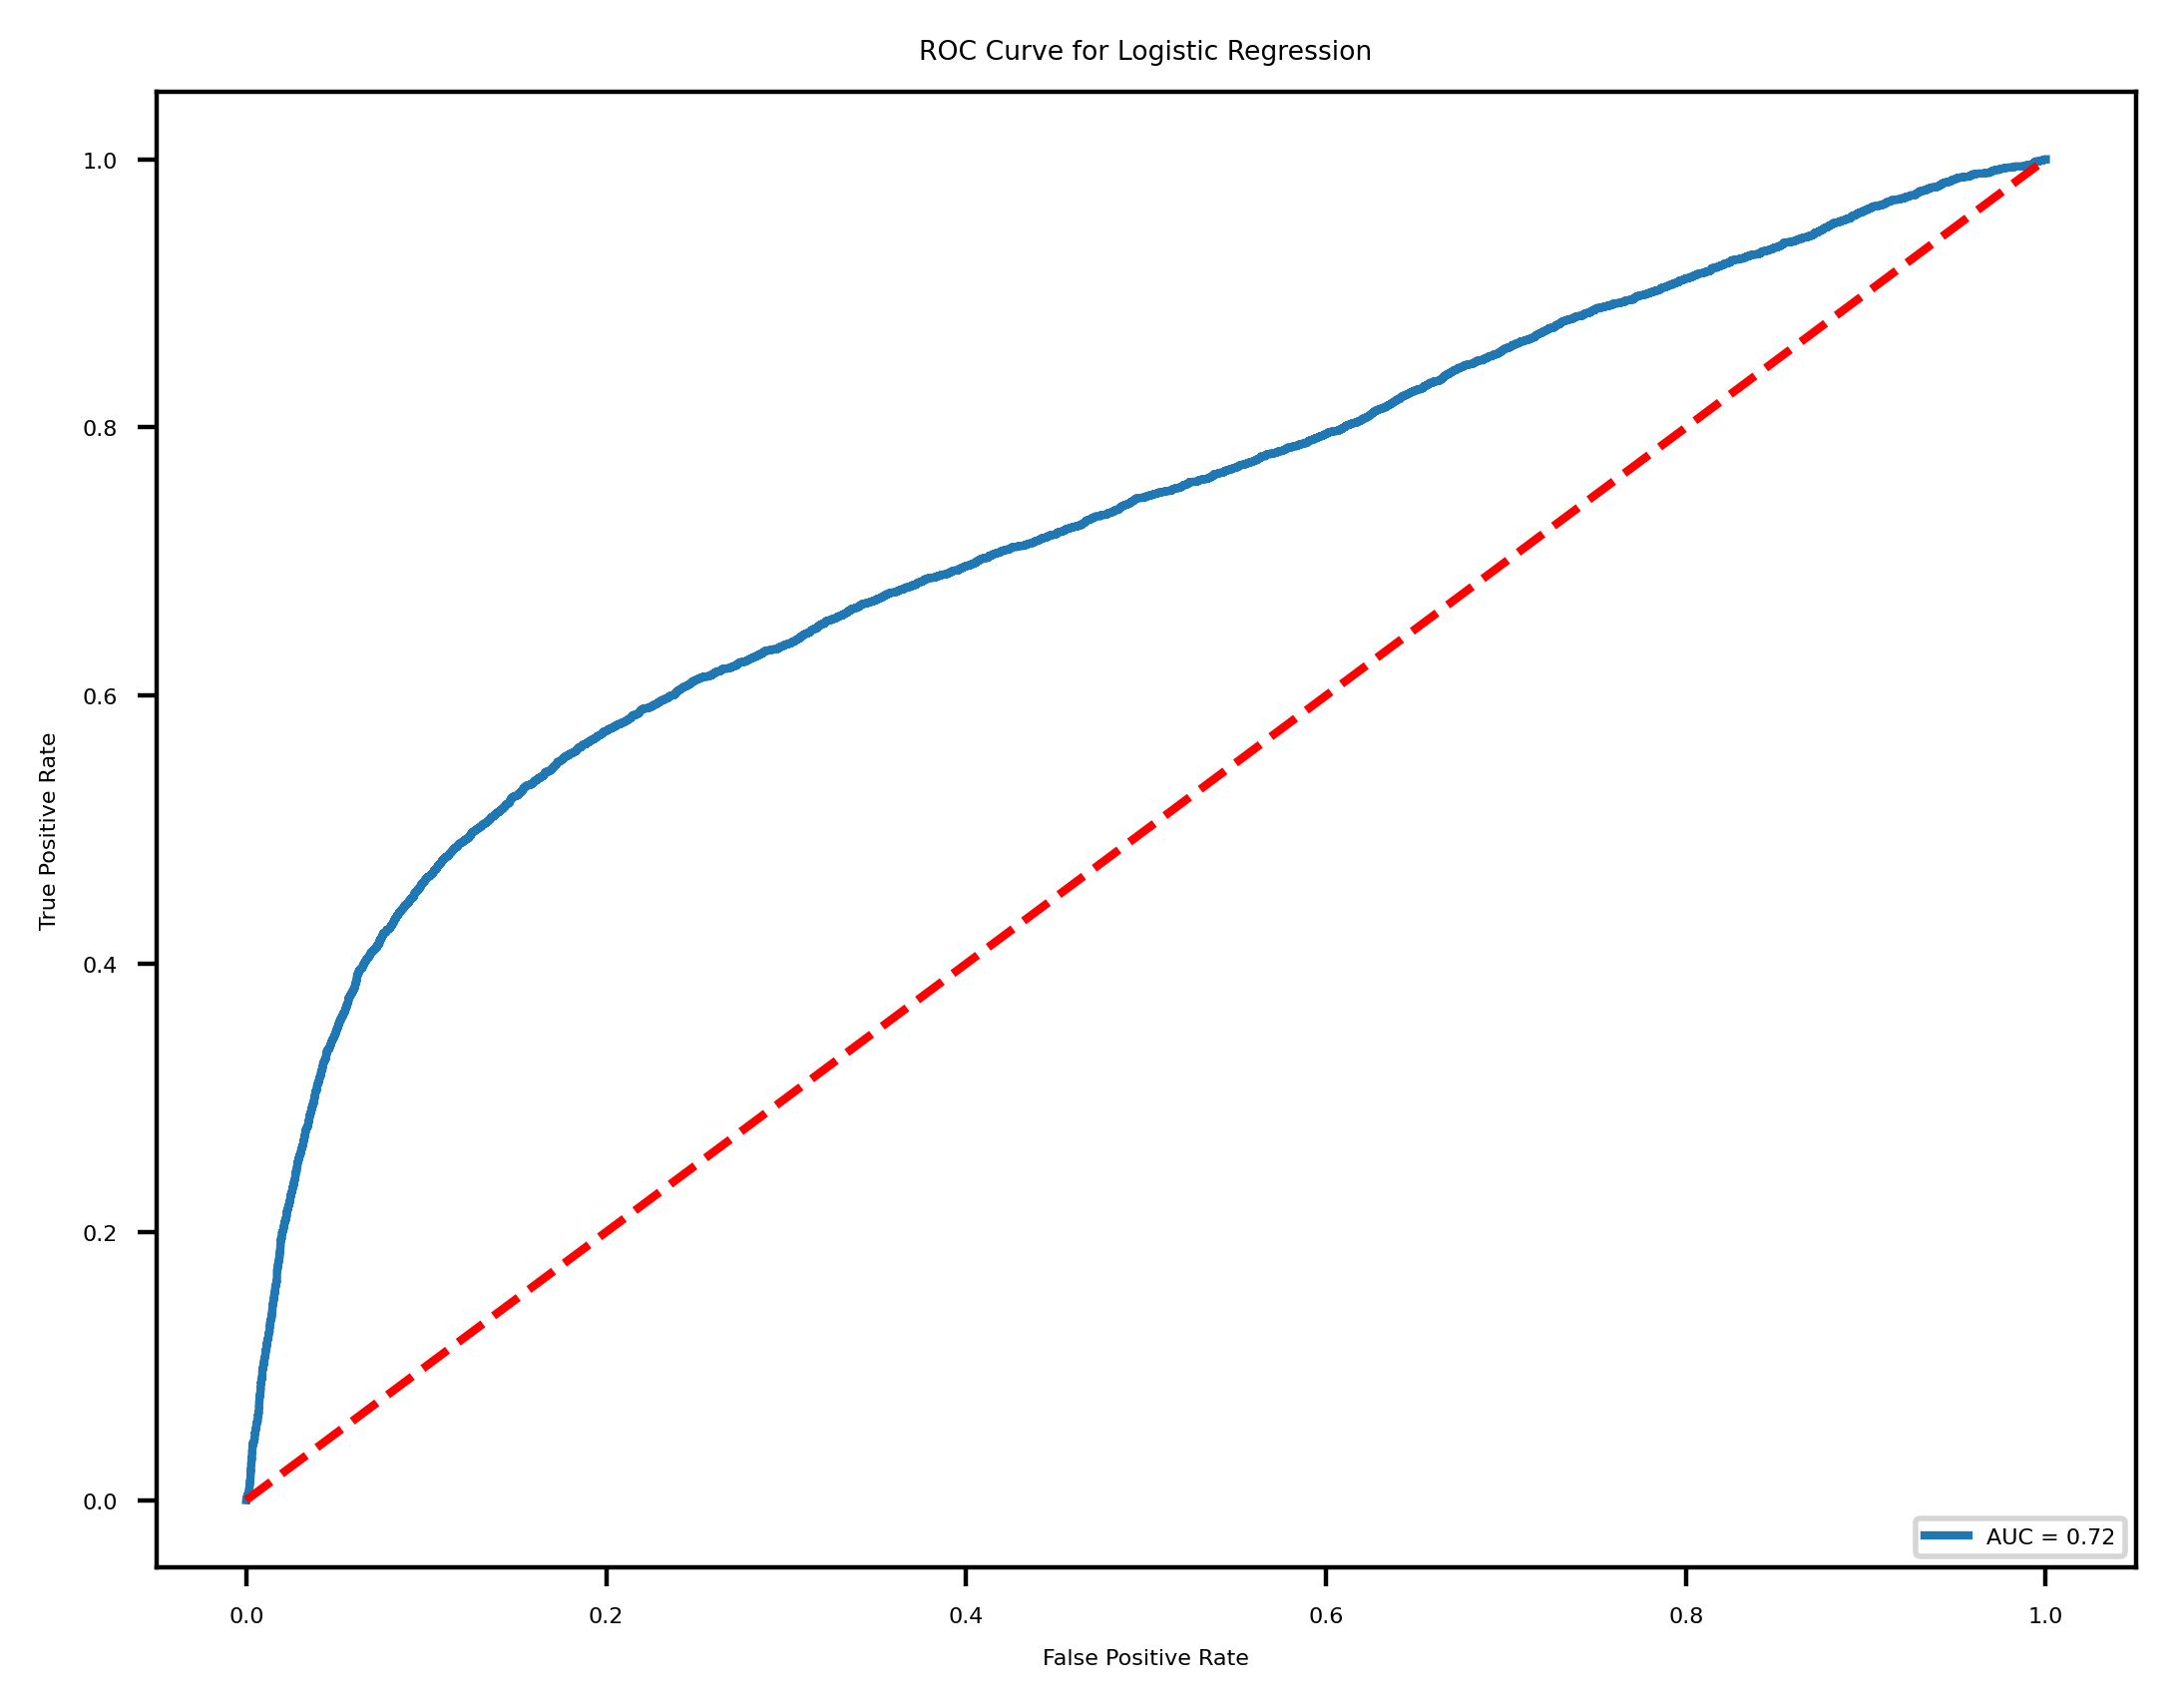

In [19]:

# Plot the data points and decision boundary using pyplot
# we will use the predict_proba() method to predict the probabilities
# we will use the roc_curve() method to calculate the fpr and tpr
# we will use the roc_auc_score() method to calculate the auc score

# predict probabilities
y_train_pred_proba = cross_val_predict(scale_lr_pipeline, X_train, y_train, cv=5, method='predict_proba')

# calculate the fpr and tpr
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

# calculate the auc score
auc_score = roc_auc_score(y_train, y_train_pred_proba[:,1])

# plot the fpr and tpr
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show() # show the plot

In [20]:
# we can observe that the auc score is 0.72 which is not very good
# Morevover, the model is not able to distinguish between the two classes very well

In [21]:
# Random Froest Classifier with Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create the pipeline
rf_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))], memory='cache_folder')

param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [4, 6, 8],
    'rf__max_features': ['log2', 'sqrt'],
    'rf__min_samples_leaf': [0.1, 0.2],
    'rf__min_samples_split': [0.1, 0.2]
}

# create the grid search object
rf_grid = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the model
rf_grid.fit(X_train, y_train)

# print the best parameters
print(rf_grid.best_params_)
print(rf_grid.best_score_)
print(rf_grid.best_estimator_)





{'rf__max_depth': 4, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 0.1, 'rf__min_samples_split': 0.1, 'rf__n_estimators': 300}
0.7365813903095301
Pipeline(memory='cache_folder',
         steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=4, max_features='log2',
                                        min_samples_leaf=0.1,
                                        min_samples_split=0.1, n_estimators=300,
                                        random_state=42))])


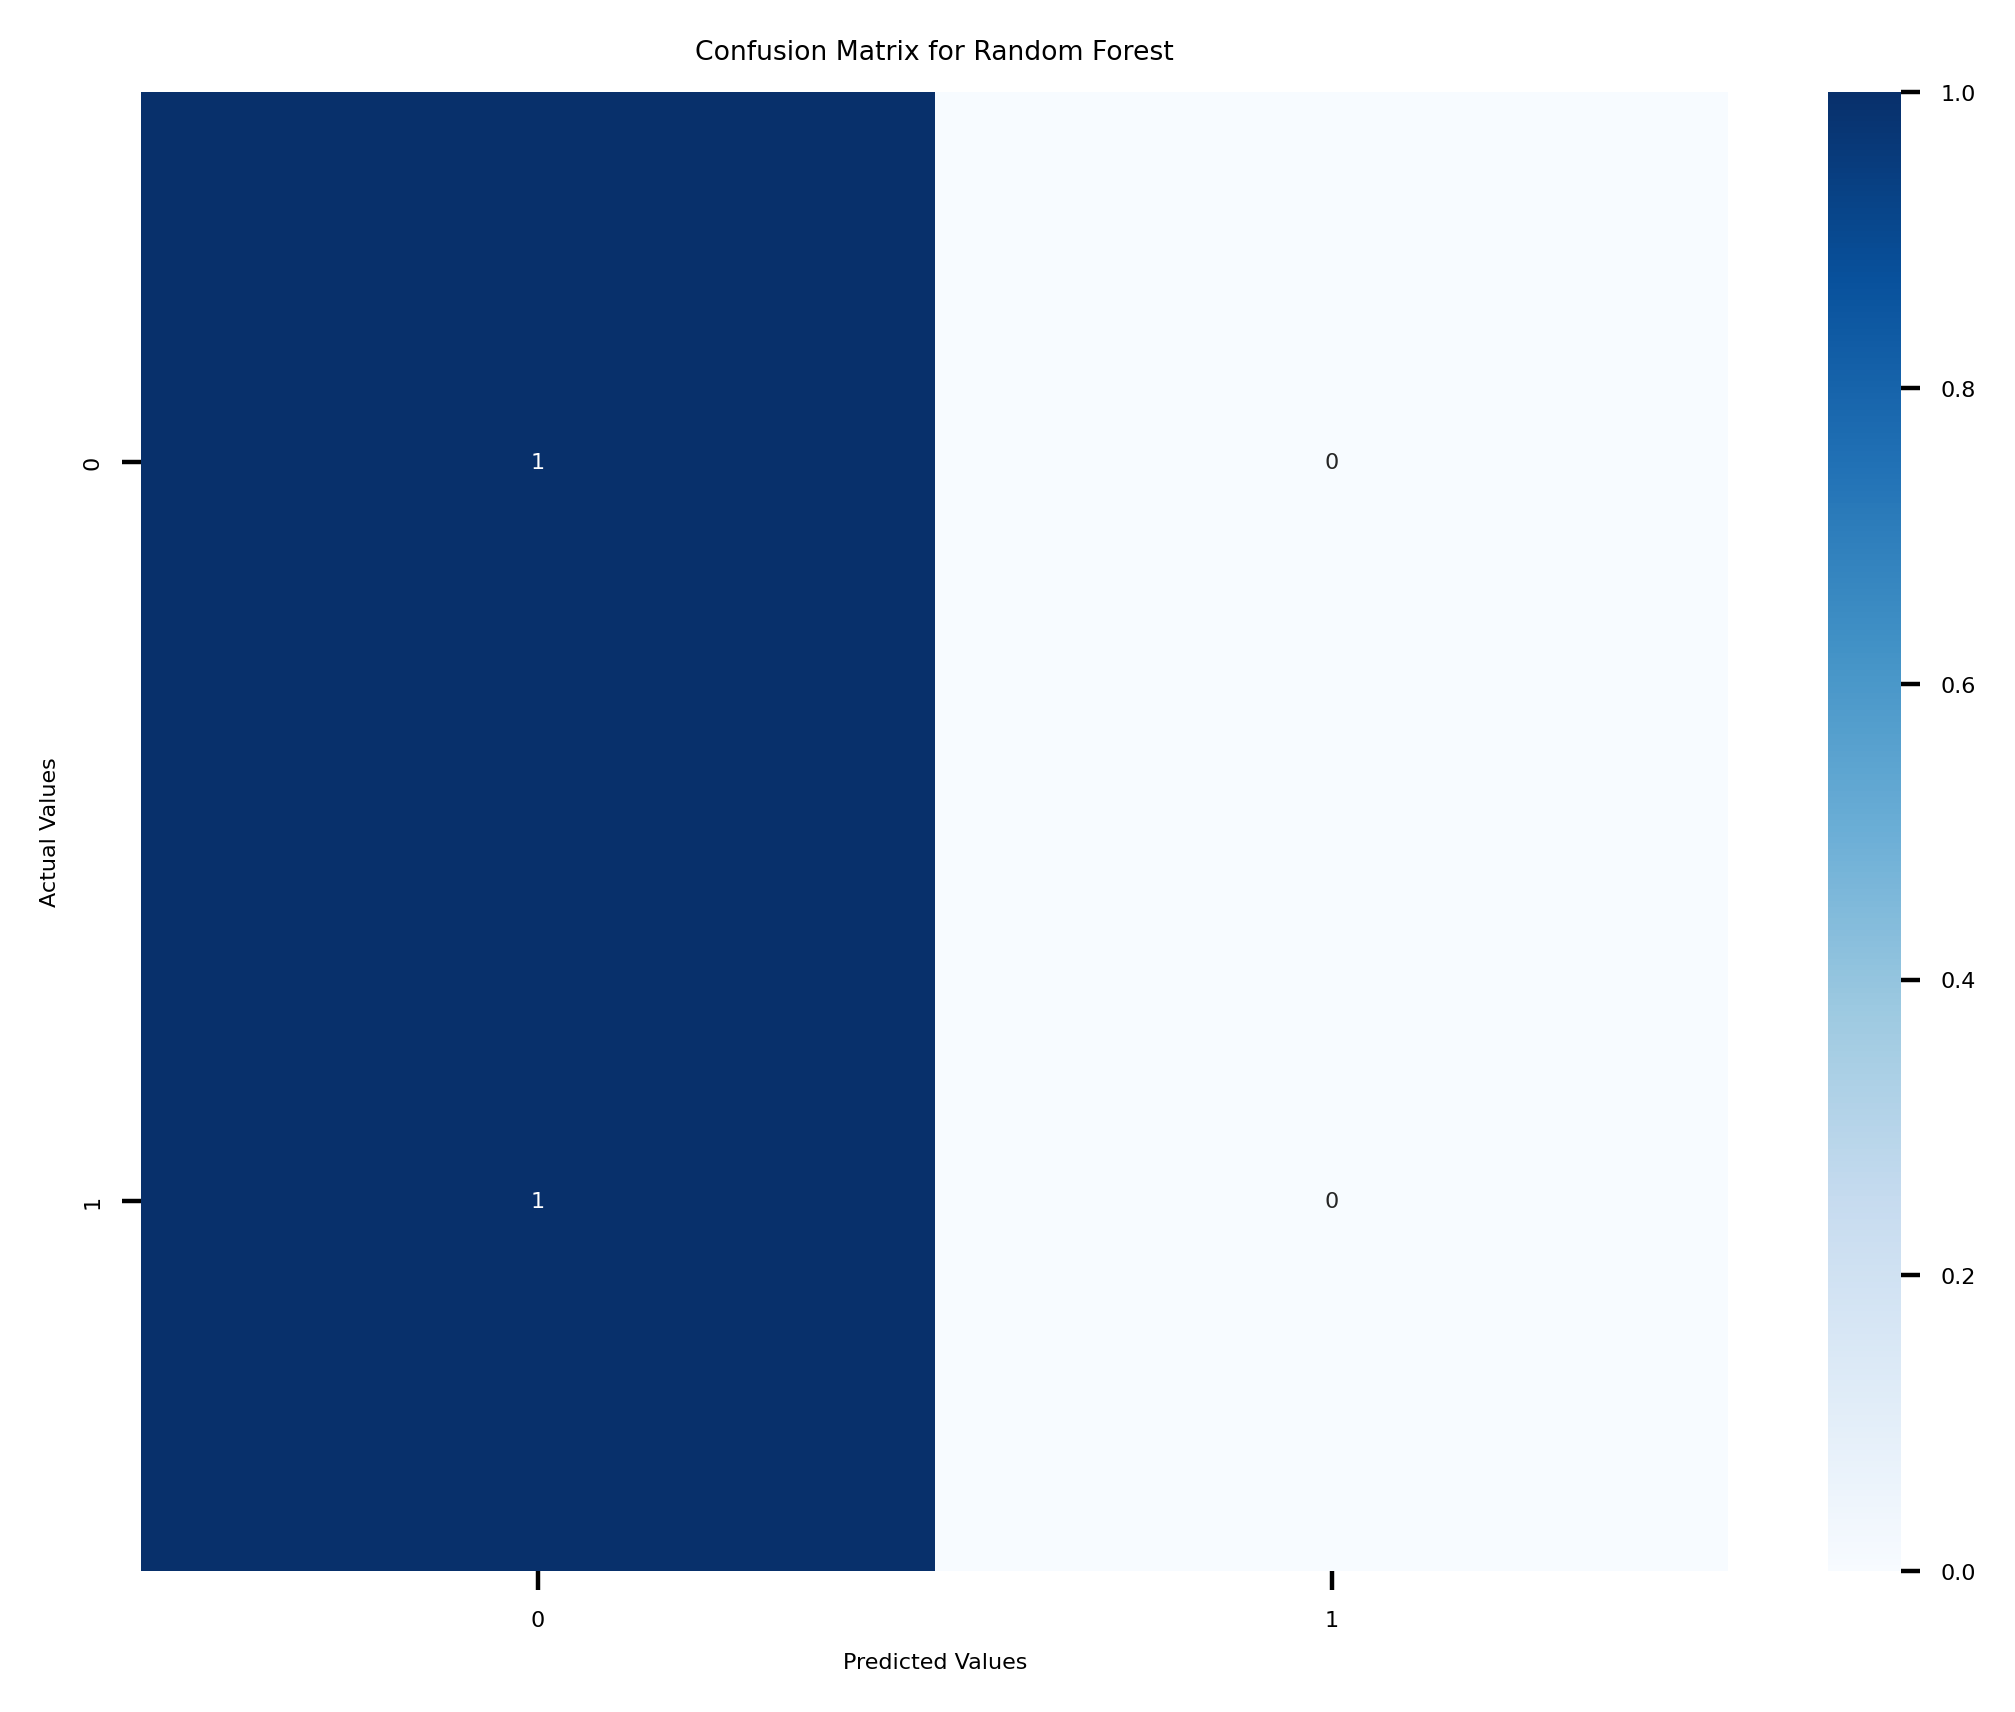

In [22]:
# now use the best parameters to create the model and predict the response variable

# create the model
rf_model = RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

# predict the response variable
y_train_pred = rf_model.predict(X_train)

# plot confusion matrix using heatmap

# create the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred,normalize='true')
sns.heatmap(conf_matrix, annot=True, cmap='Blues') # plot the confusion matrix
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest')
plt.show() # show the plot




In [23]:
# lets use Decision Tree
# import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# create the pipeline
dt_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(random_state=42,max_depth=2))], memory='cache_folder')

dt_pipeline.fit(X_train, y_train)

tree_img = export_graphviz(dt_pipeline.named_steps['dt'], out_file=None, feature_names=X_train.columns, class_names=['Not Defaulted', 'Defaulted'], filled=True, rounded=True ,proportion=True)



In [24]:
# import graphviz
# graph = graphviz.Source(tree_img)
# graph


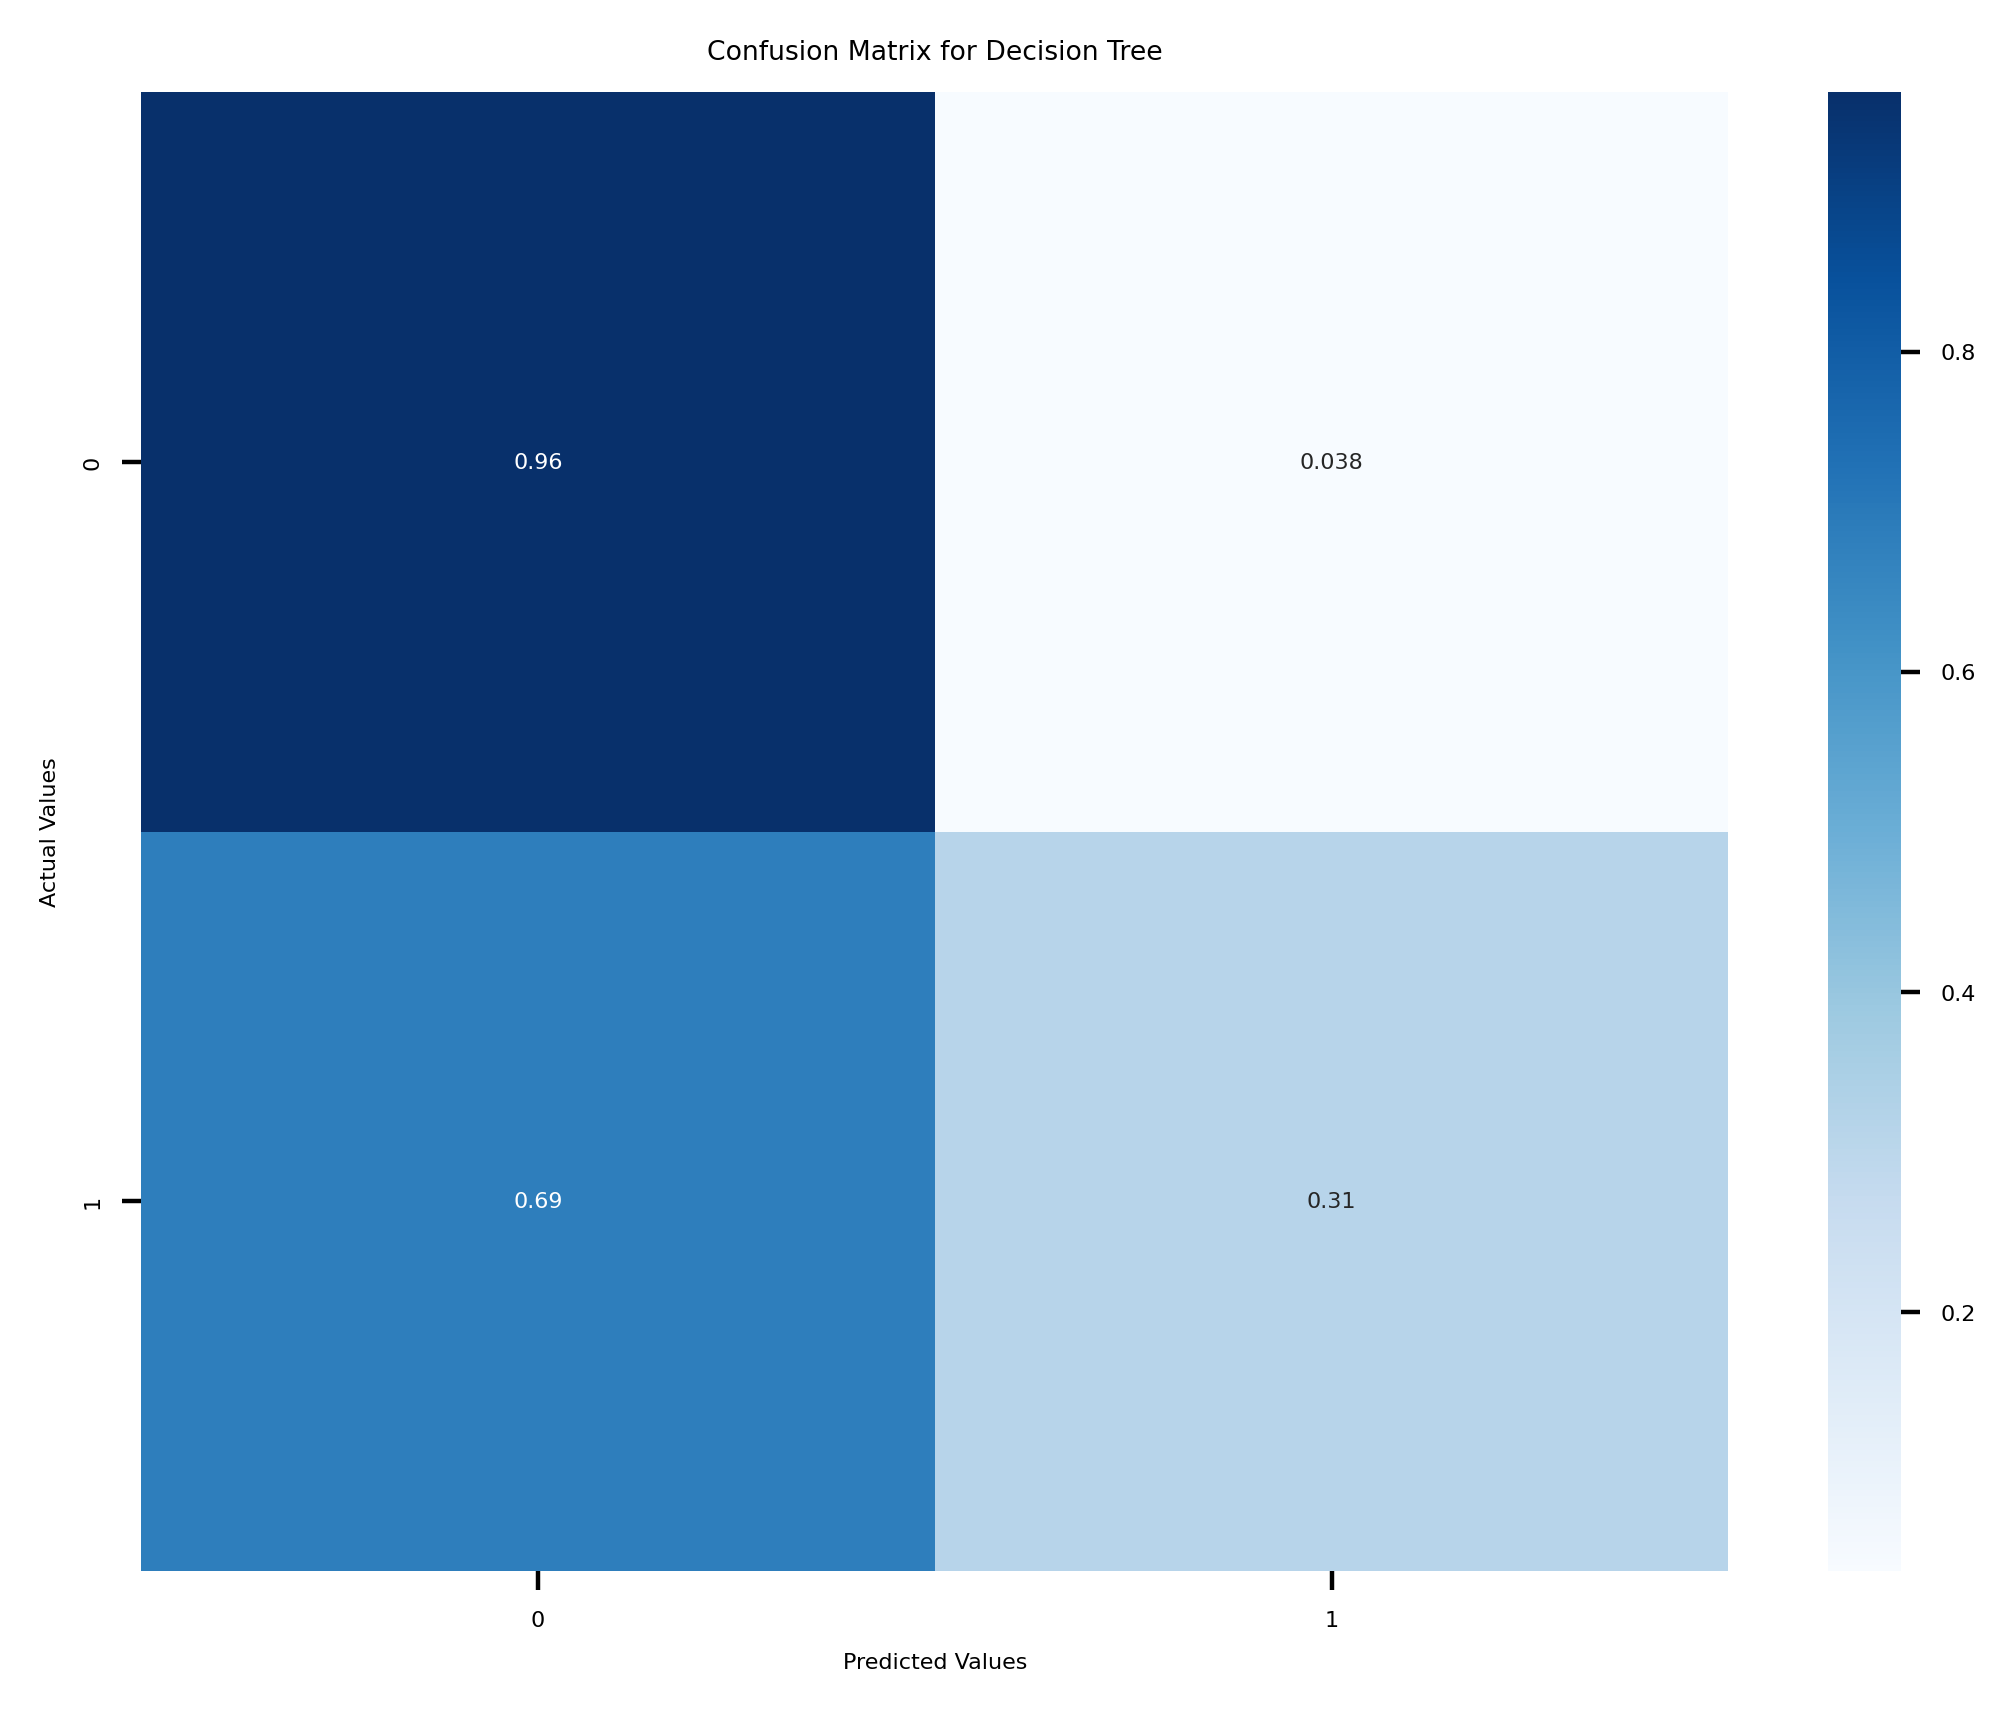

In [25]:
# lets predict the response variable using cross validation
y_predic = cross_val_predict(dt_pipeline, X_train, y_train, cv=5)

# plot confusion matrix using heatmap
cm = confusion_matrix(y_train, y_predic, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show() # show the plot


In [26]:

# lets remove the features that have low feature importance
# we will use the SelectFromModel() method to select the features
# we will use the feature_importances_ attribute to get the feature importance

df_clean.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,graduate school,high school,others,university,BILL_CARRY_SEPT,BILL_CARRY_AUG,BILL_CARRY_JUL,BILL_CARRY_JUN,BILL_CARRY_MAY,BILL_CARRY_APR
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,False,False,False,True,3913.0,6326.0,3791.0,689.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,False,False,False,True,5943.0,3407.0,3407.0,4954.0,6727.0,4716.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,False,False,False,True,43270.0,41766.0,26586.0,26890.0,28279.0,25497.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,False,False,False,True,74537.0,93204.0,96324.0,76505.0,56204.0,57506.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,False,False,False,True,25748.0,-22394.0,31505.0,47775.0,39397.0,37598.0


In [27]:
items_to_remove = ['SEX', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'graduate school', 'high school',
       'others', 'university', 'BILL_CARRY_SEPT', 'BILL_CARRY_AUG',
       'BILL_CARRY_JUL', 'BILL_CARRY_JUN', 'BILL_CARRY_MAY', 'BILL_CARRY_APR']

features = X.columns.tolist()
features = [feature for feature in features if feature not in items_to_remove]

X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)

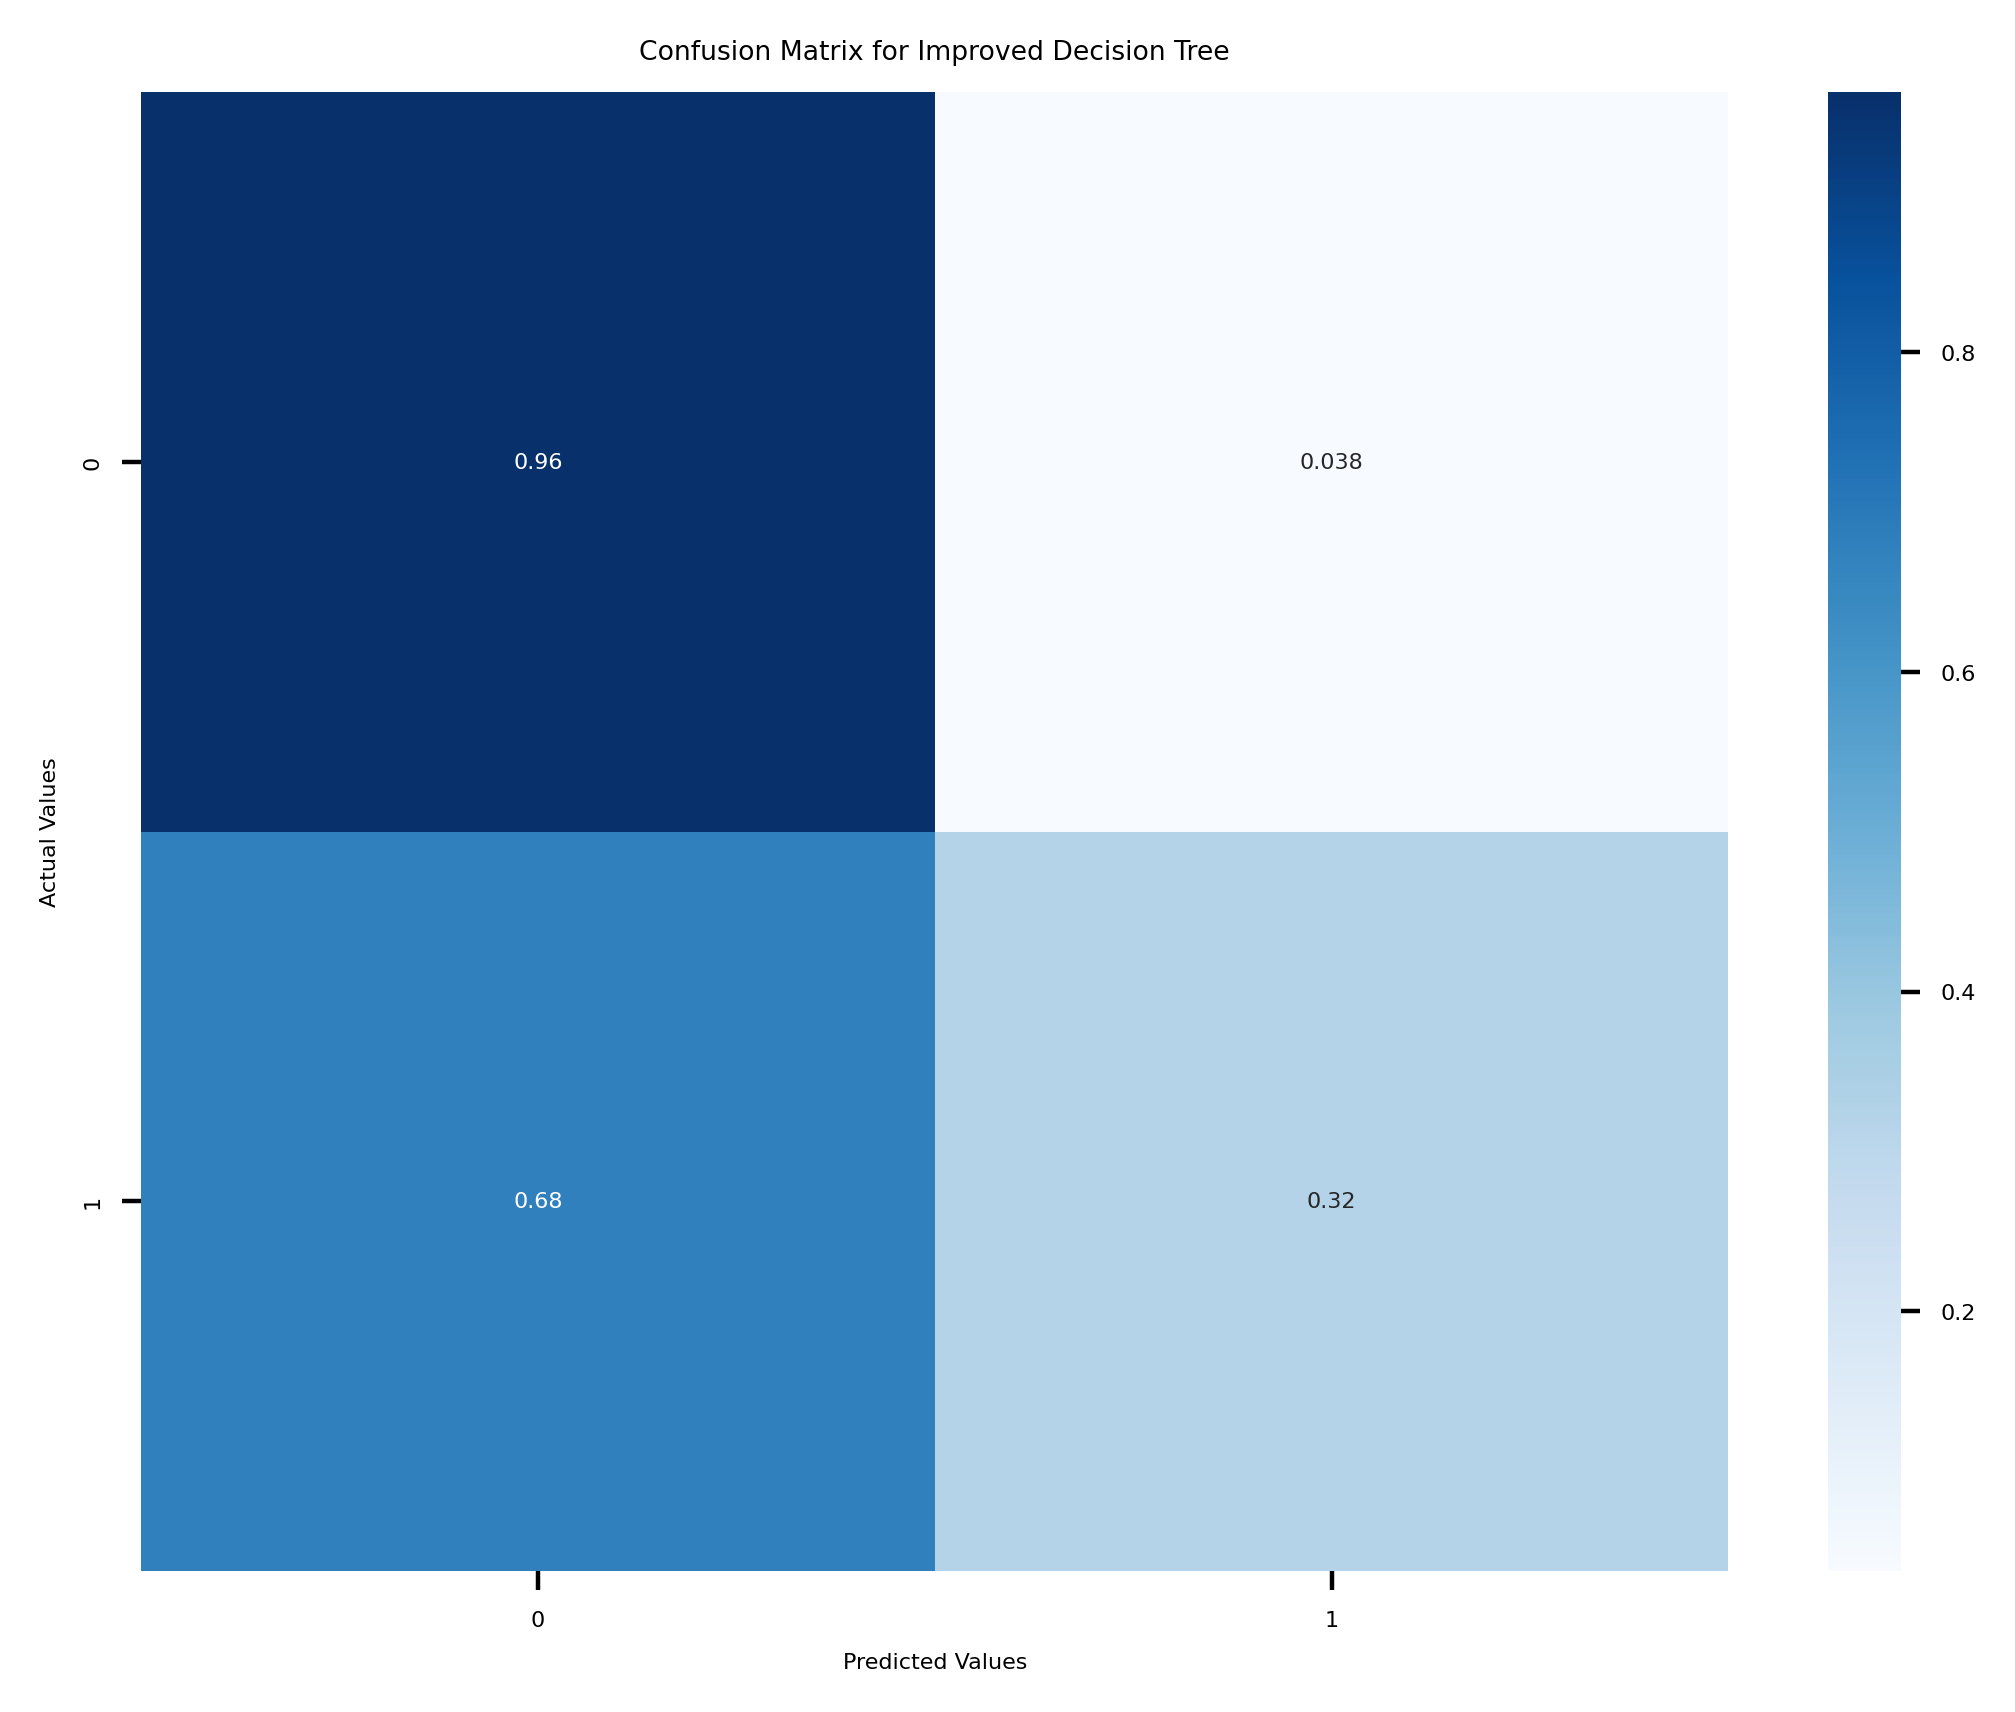

In [28]:
improved_tree = DecisionTreeClassifier(random_state=42, max_depth=2)
improved_tree.fit(X_train, y_train)

# predict the response variable
y_train_pred = improved_tree.predict(X_train)

# plot confusion matrix using heatmap
cm = confusion_matrix(y_train, y_train_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Improved Decision Tree')
plt.show() # show the plot

{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.6681468461731194
DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=42)


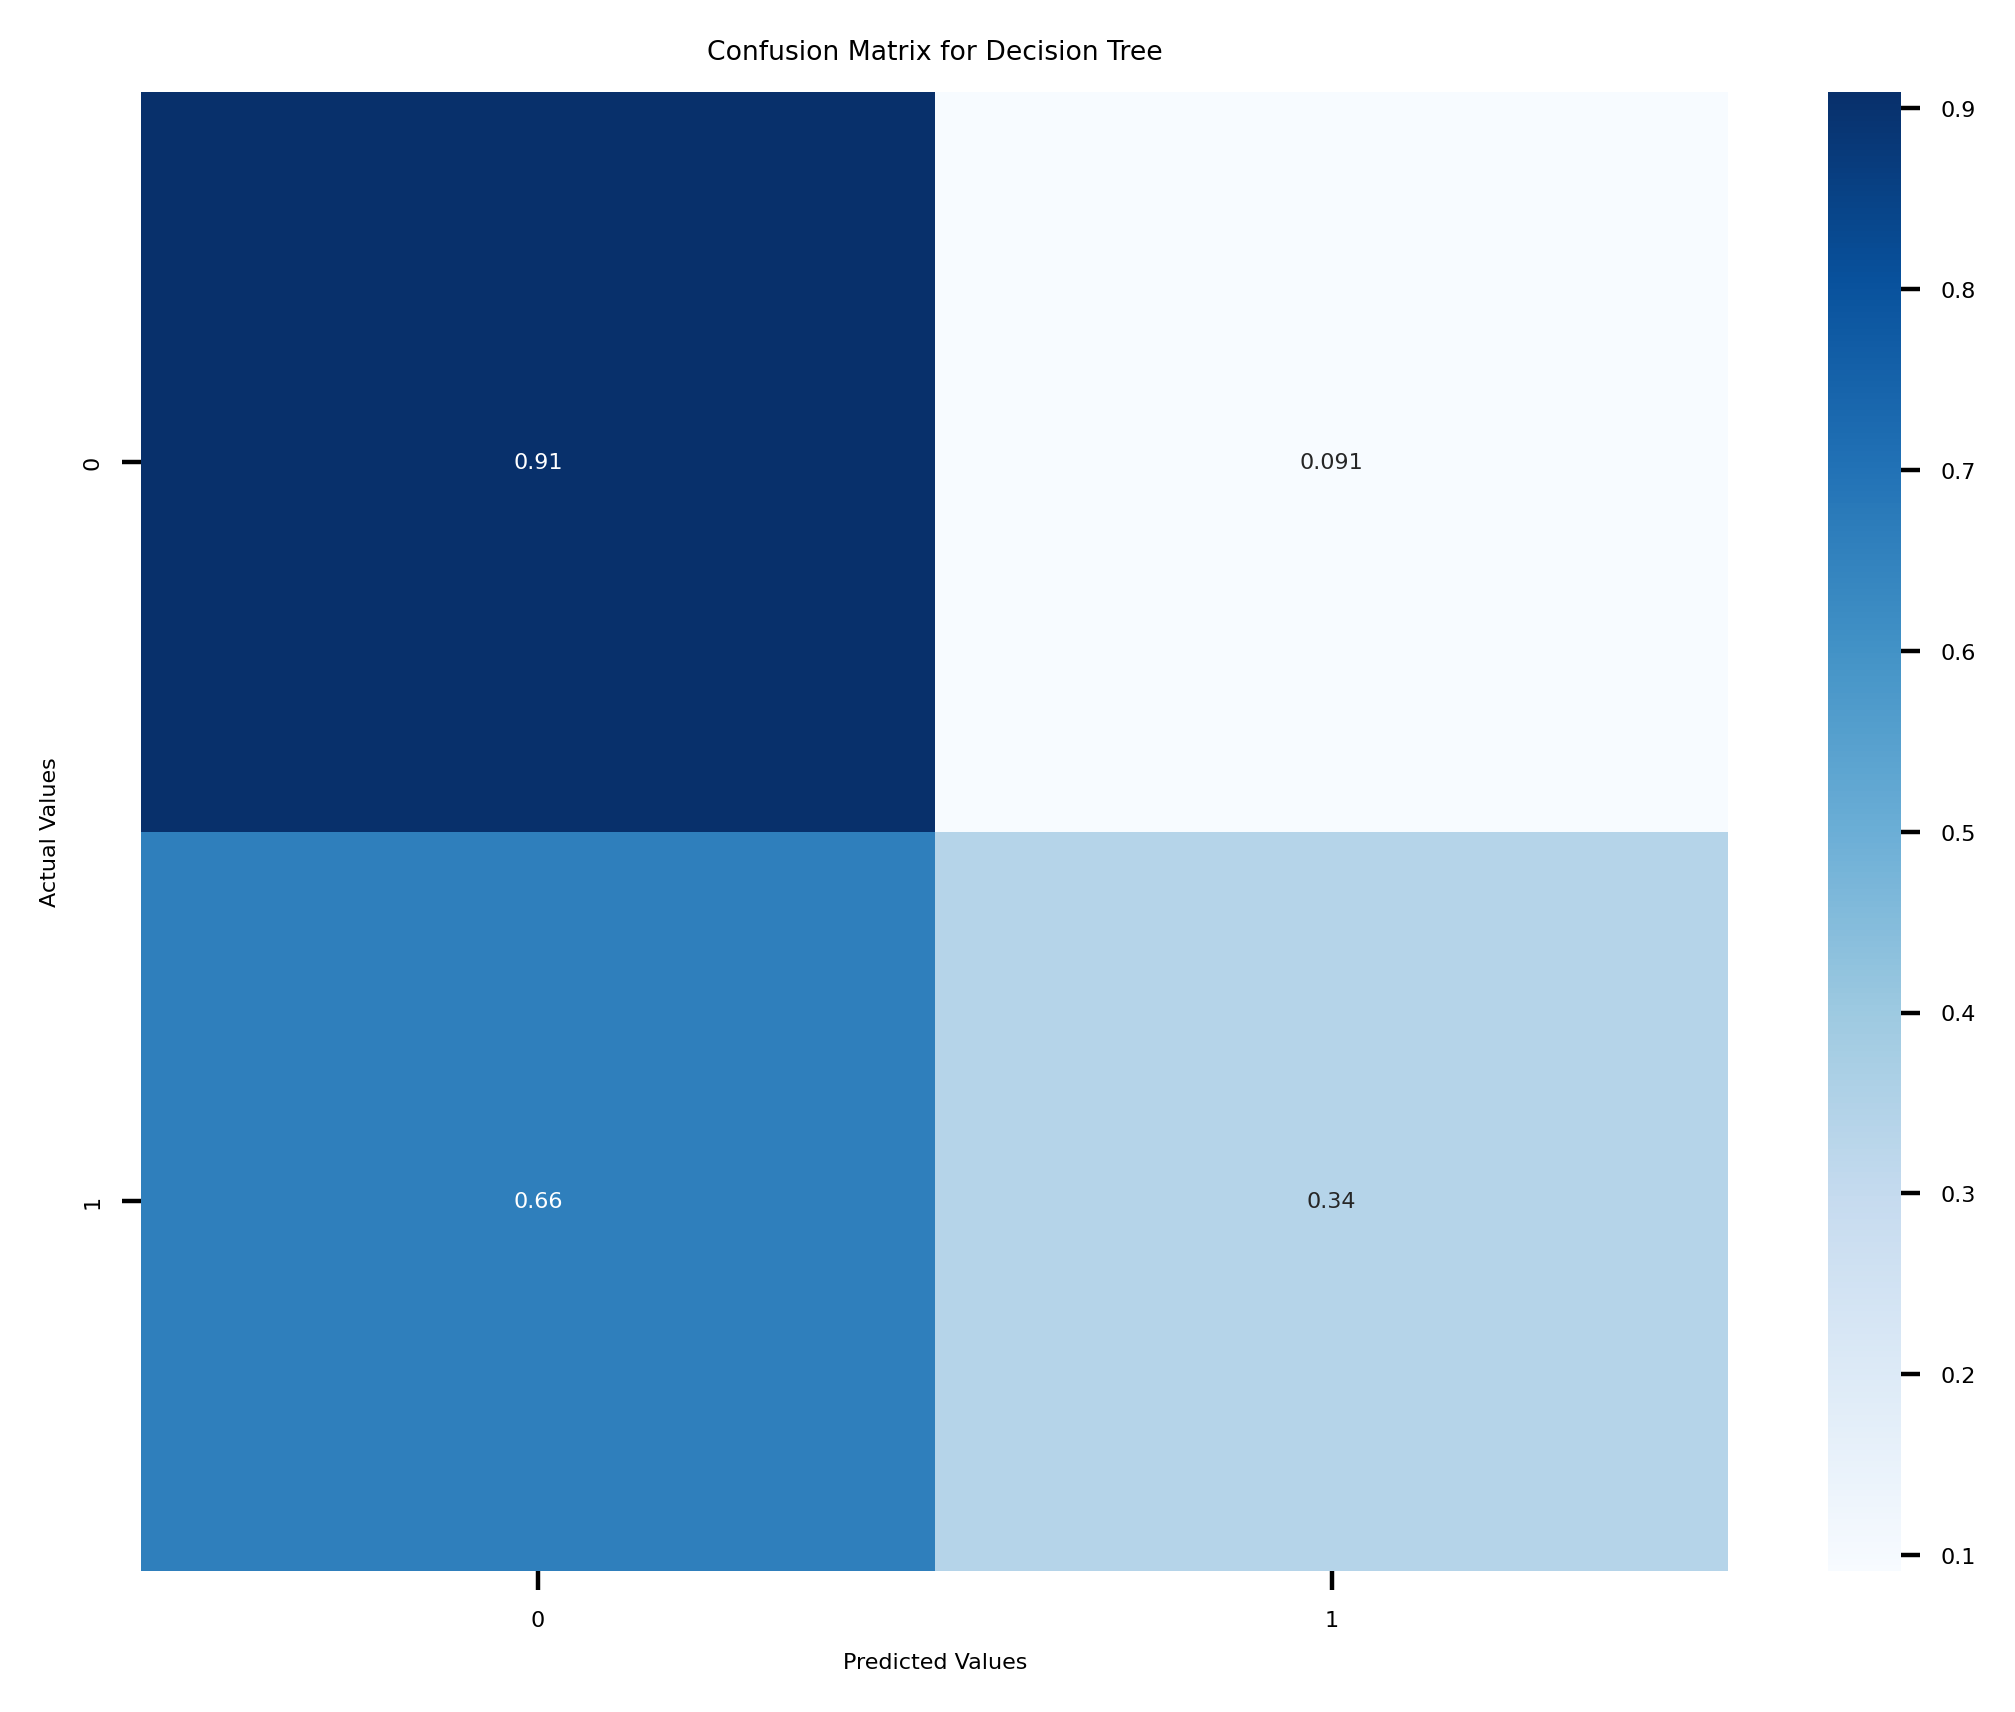

In [29]:
# we coclude that decison tree works best for this dataset
# we can fine tune the model further to improve the performance

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [0.1, 0.2],
    'min_samples_split': [0.1, 0.2]
}

# create the grid search object
dt_grid = GridSearchCV(improved_tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the model
dt_grid.fit(X_train, y_train)

# print the best parameters
print(dt_grid.best_params_)
print(dt_grid.best_score_)
print(dt_grid.best_estimator_)

# lets use the best parameters to create the model and predict the response variable

# create the model
dt_model = DecisionTreeClassifier(max_depth=2, max_features='log2', min_samples_leaf=0.1, min_samples_split=0.1, random_state=42)

# fit the model
dt_model.fit(X_train, y_train)

# predict the response variable
y_train_pred = dt_model.predict(X_train)

# plot confusion matrix using heatmap
cm = confusion_matrix(y_train, y_train_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')

plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show() # show the plot



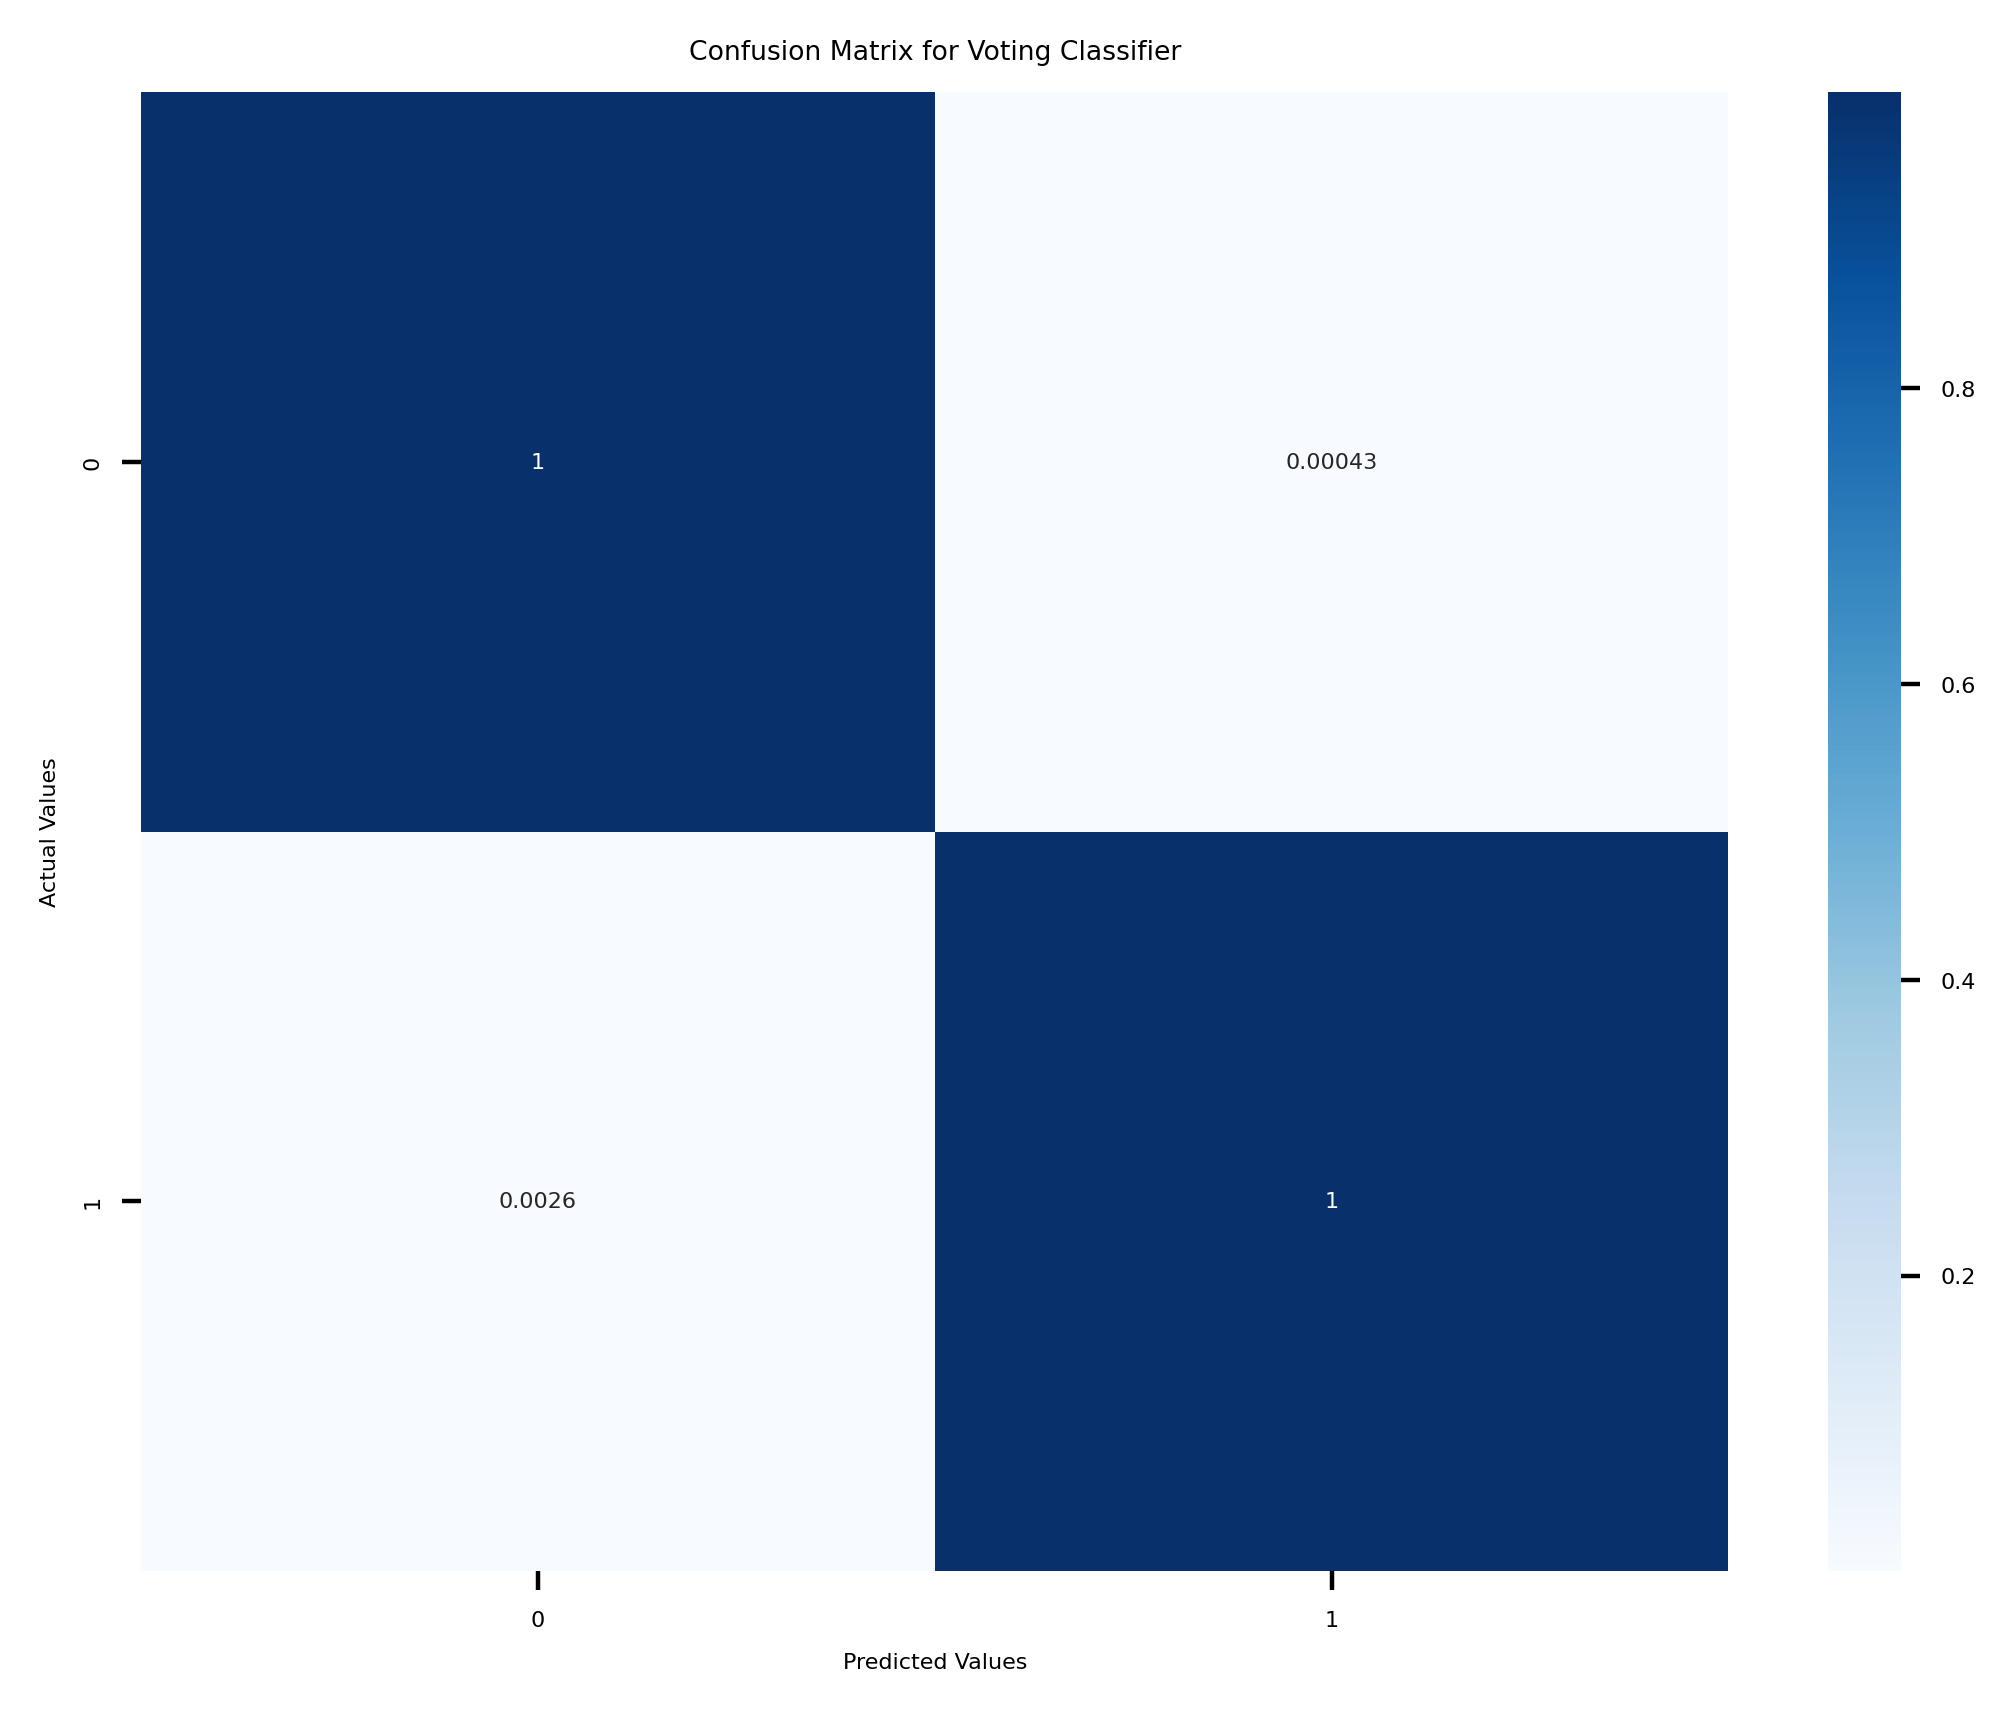

In [30]:
# is there any other way to improve the model?
# we can use the ensemble method to improve the model
# we will use the voting classifier to combine the models
# we will use the soft voting method to combine the models

# create the pipeline for the models
rf_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier(random_state=42))], memory='cache_folder')
dt_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(random_state=42))], memory='cache_folder')

# create the voting classifier
# import the voting classifier
from sklearn.ensemble import VotingClassifier
VotingClassifier = VotingClassifier(estimators=[('rf', rf_pipeline), ('dt', dt_pipeline)], voting='soft')

# fit the model
VotingClassifier.fit(X_train, y_train)

# predict the response variable
y_train_pred = VotingClassifier.predict(X_train)

# plot confusion matrix using heatmap
cm = confusion_matrix(y_train, y_train_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Voting Classifier')
plt.show() # show the plot


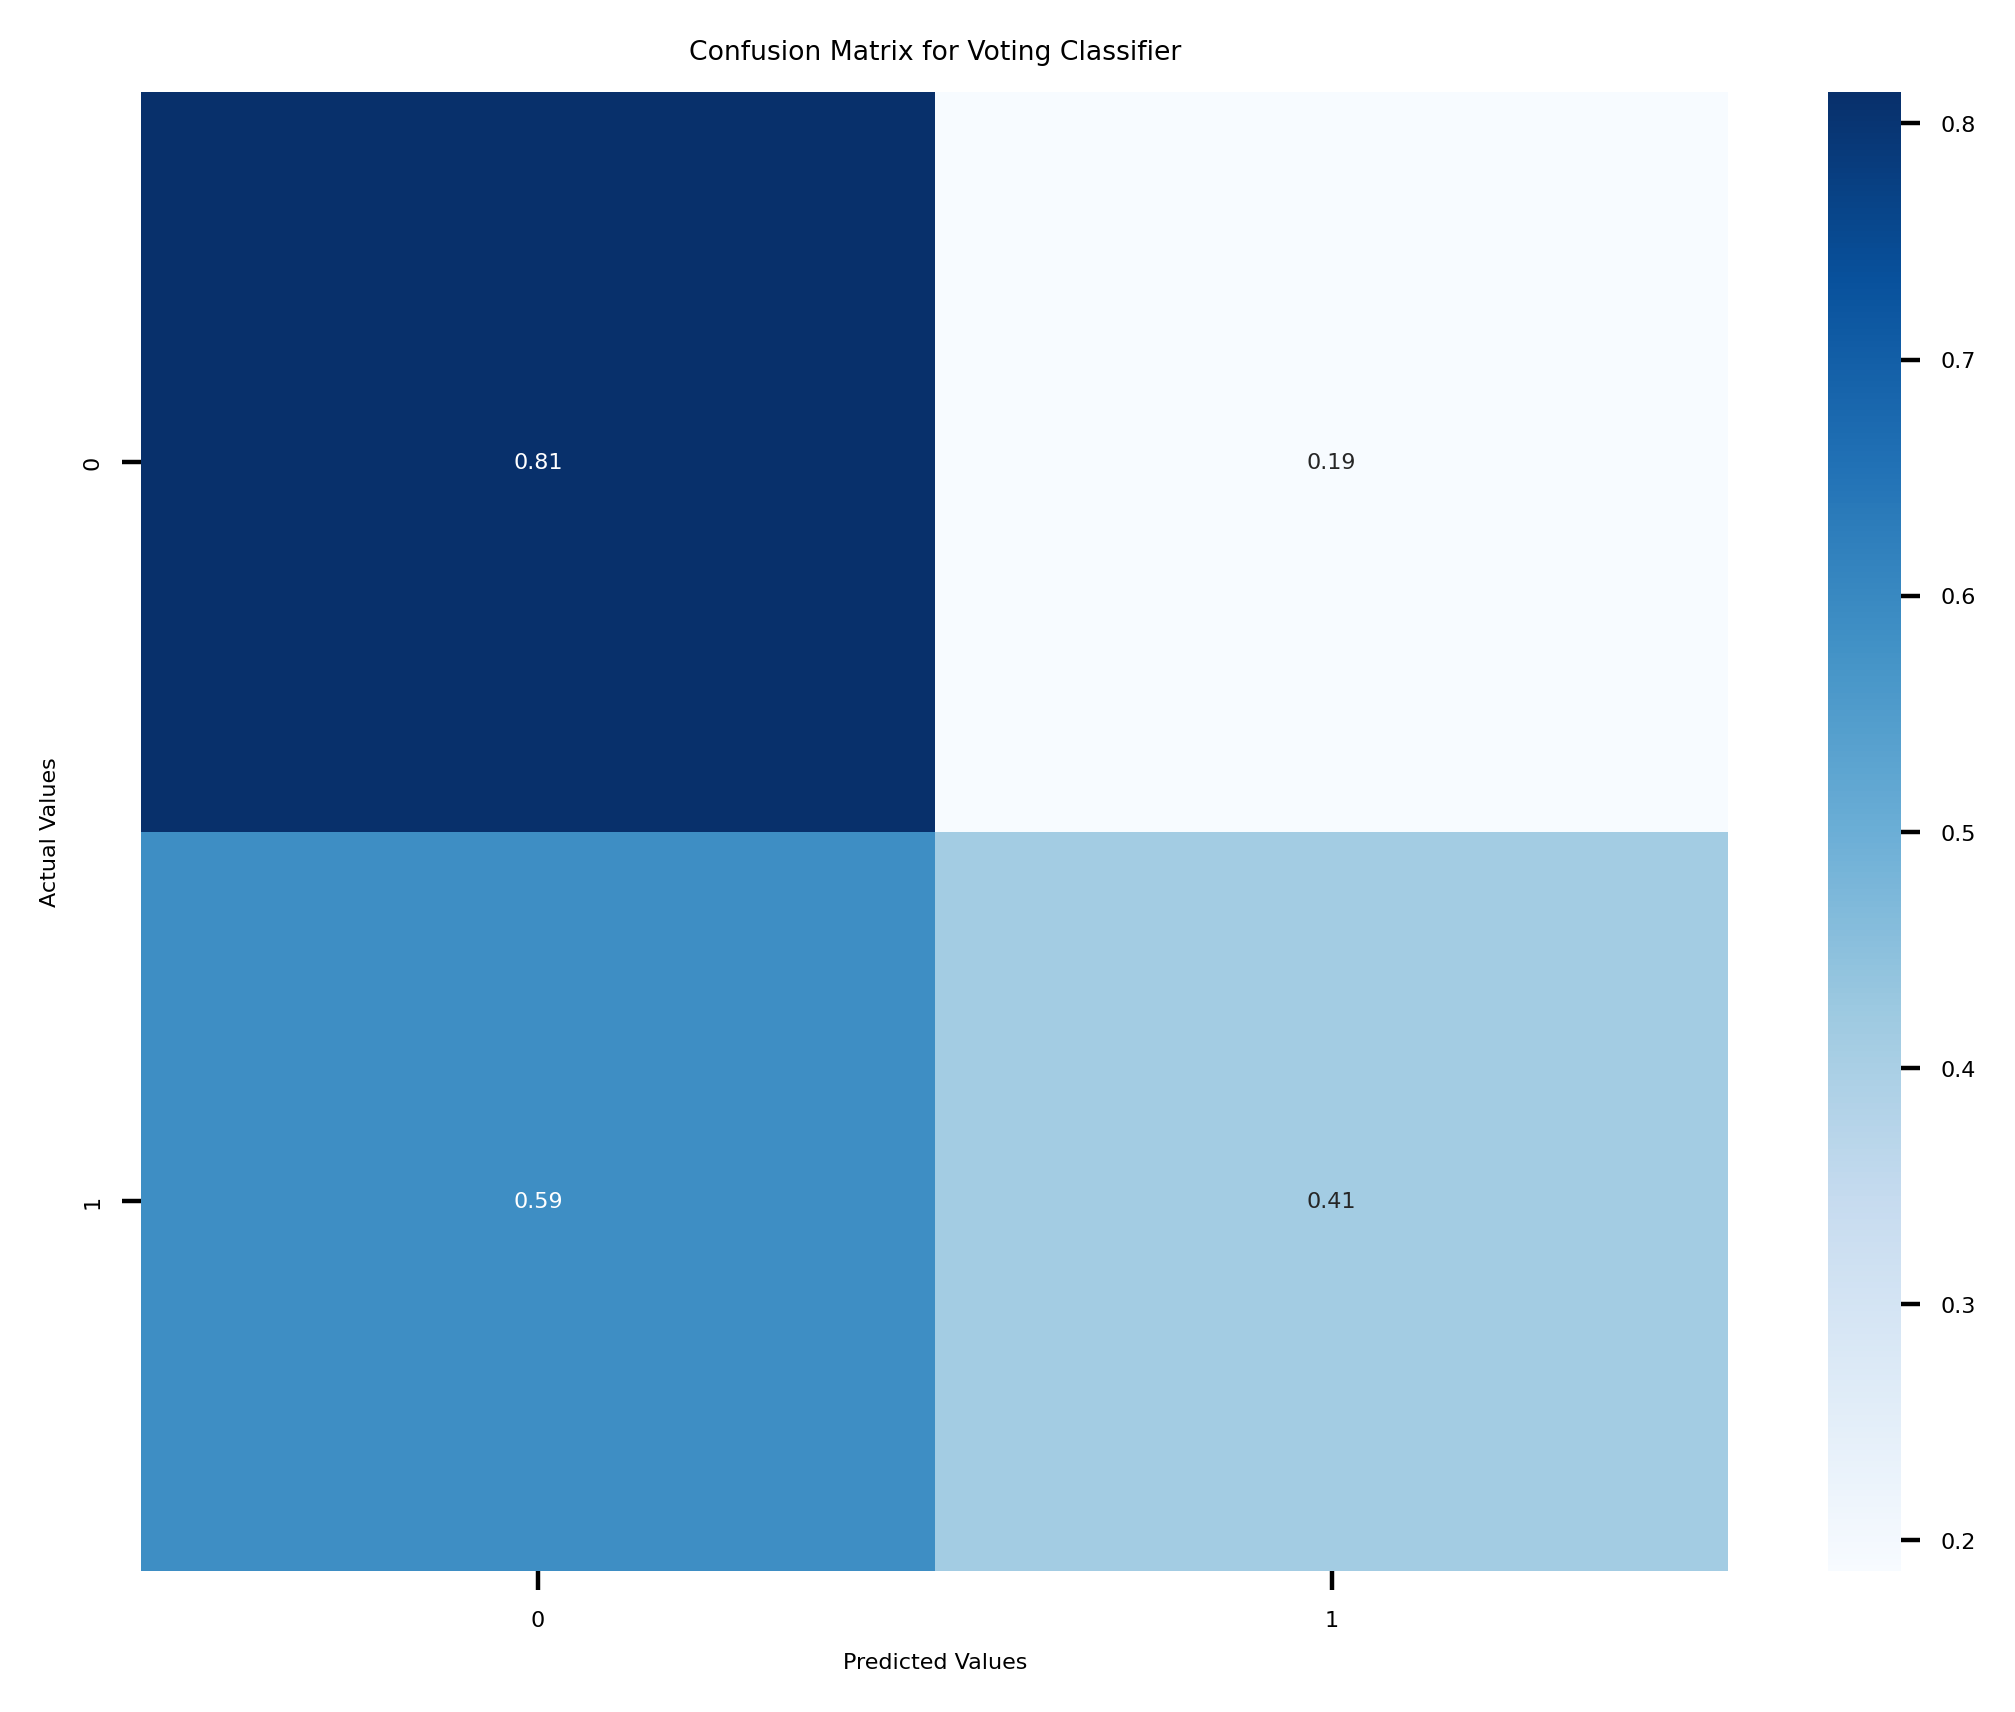

In [31]:
# lets use this on the test set
# predict the response variable
y_test_pred = VotingClassifier.predict(X_test)

# plot confusion matrix using heatmap
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Voting Classifier')
plt.show() # show the plot


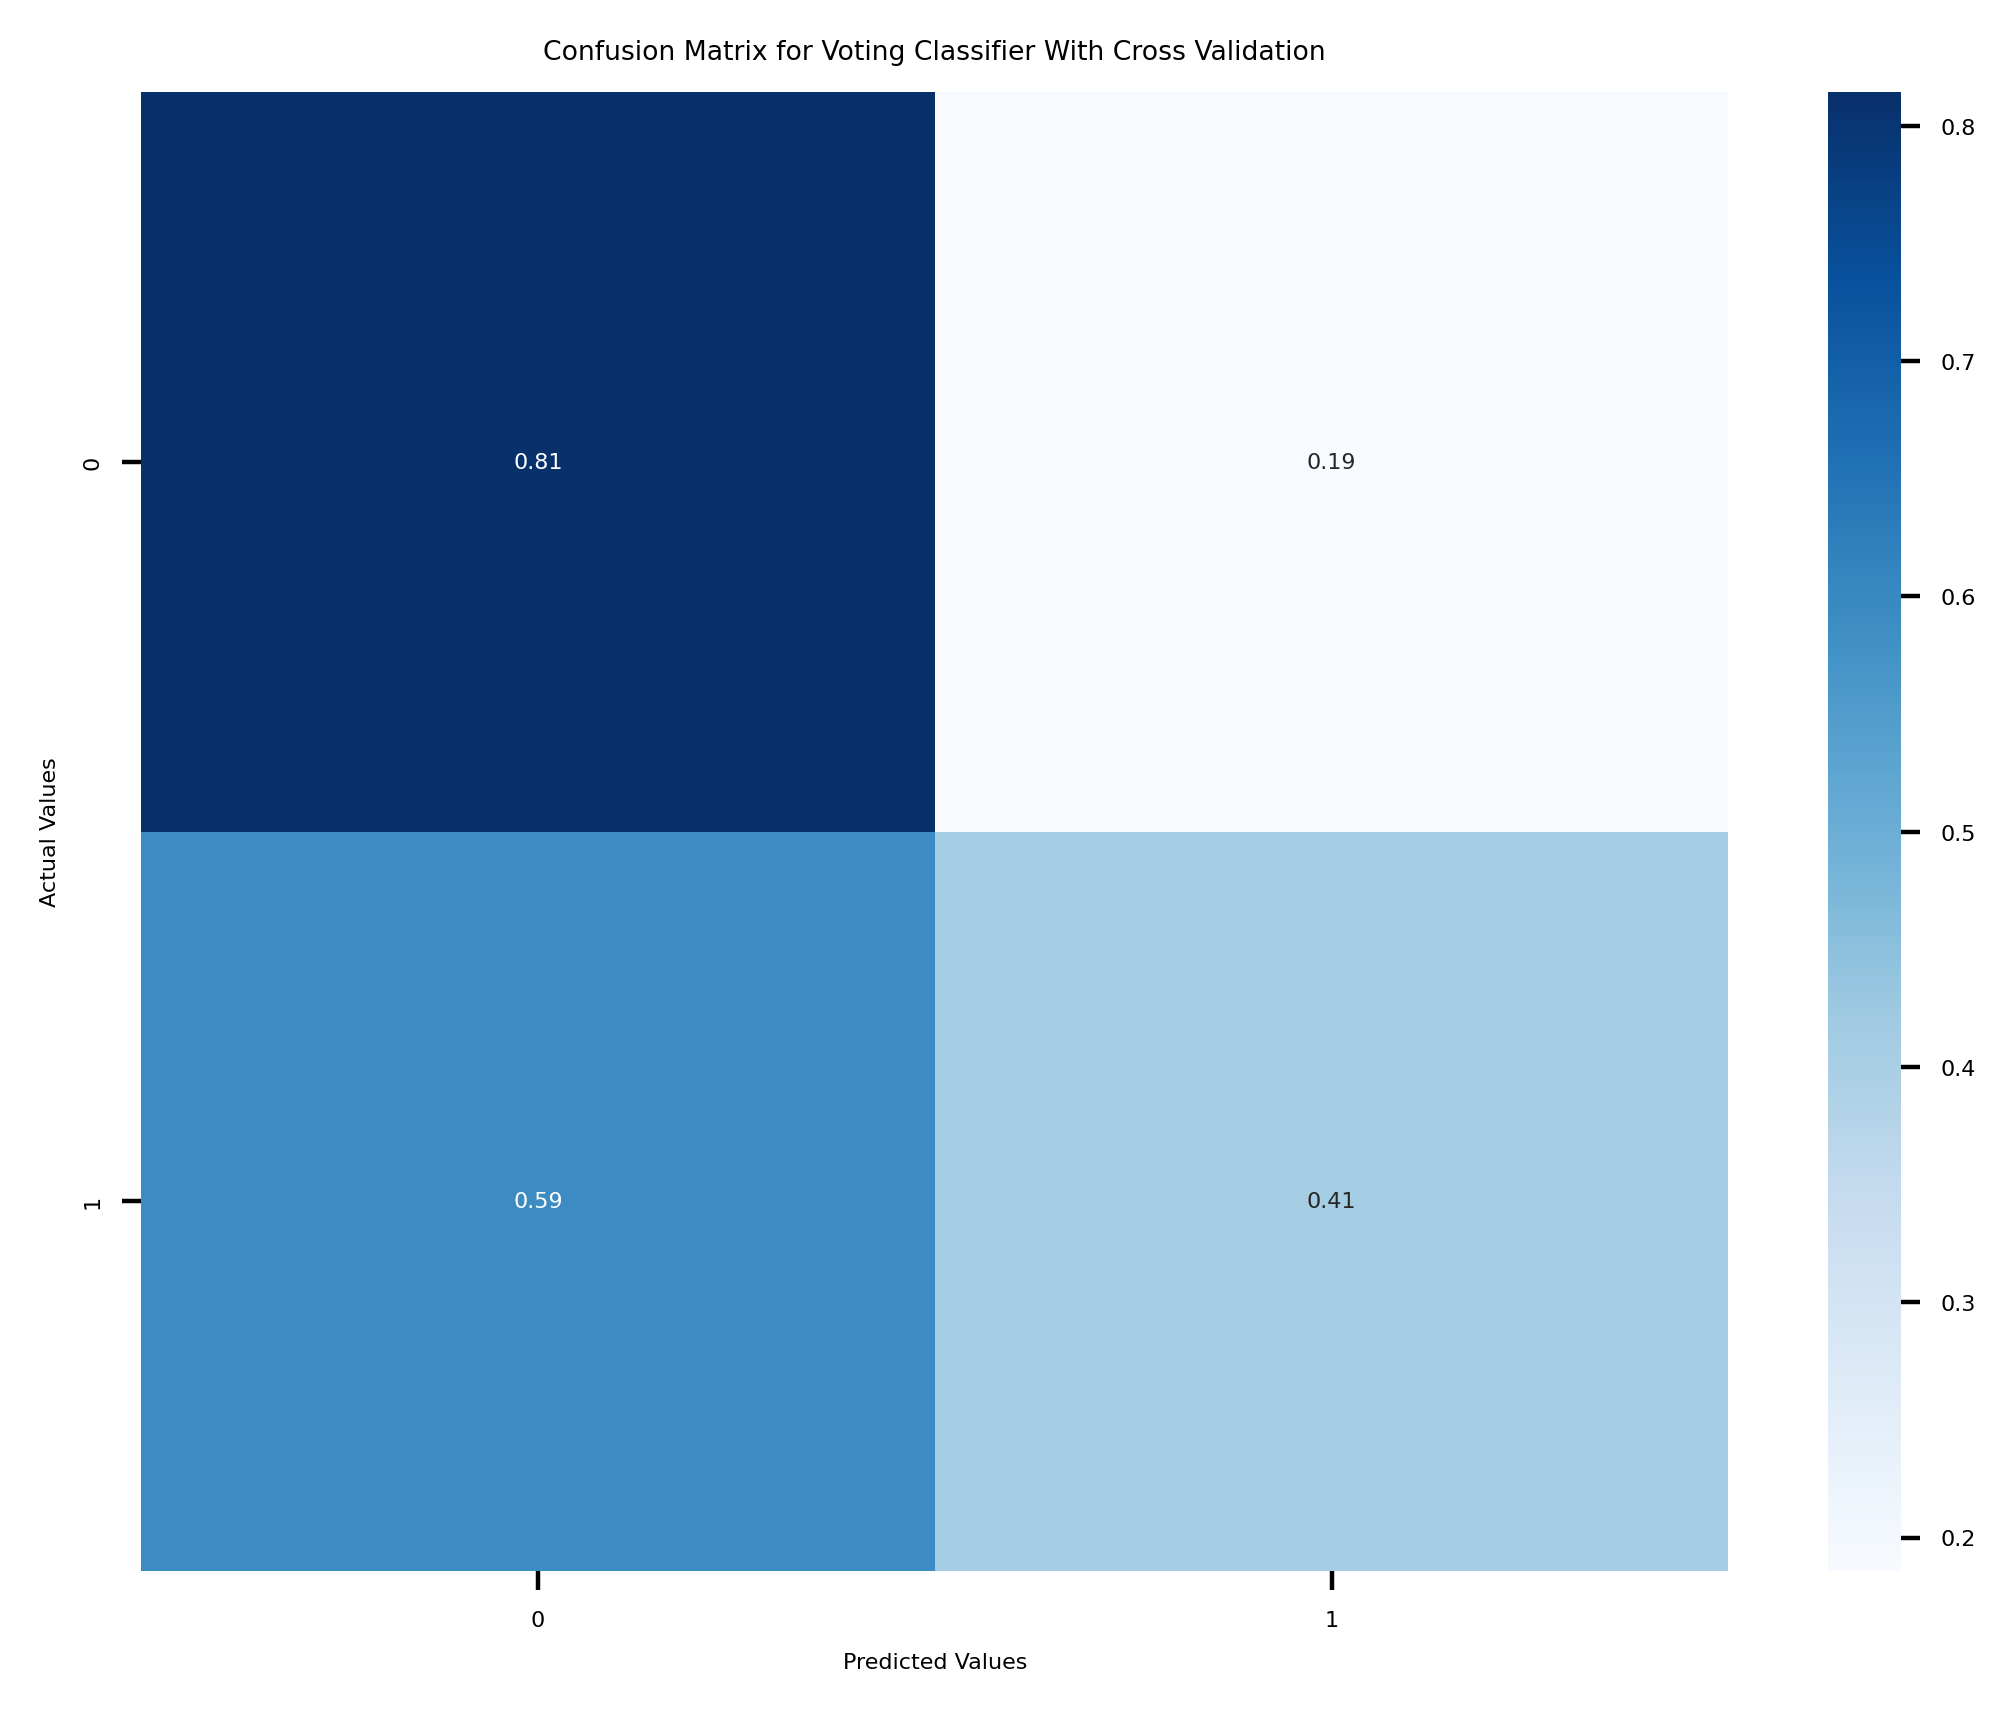

In [32]:
# lets use the voting classifier to predict the response variable using cross validation
y_predic = cross_val_predict(VotingClassifier, X_train, y_train, cv=5)

# plot confusion matrix using heatmap
cm = confusion_matrix(y_train, y_predic, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Voting Classifier With Cross Validation')
plt.show() # show the plot


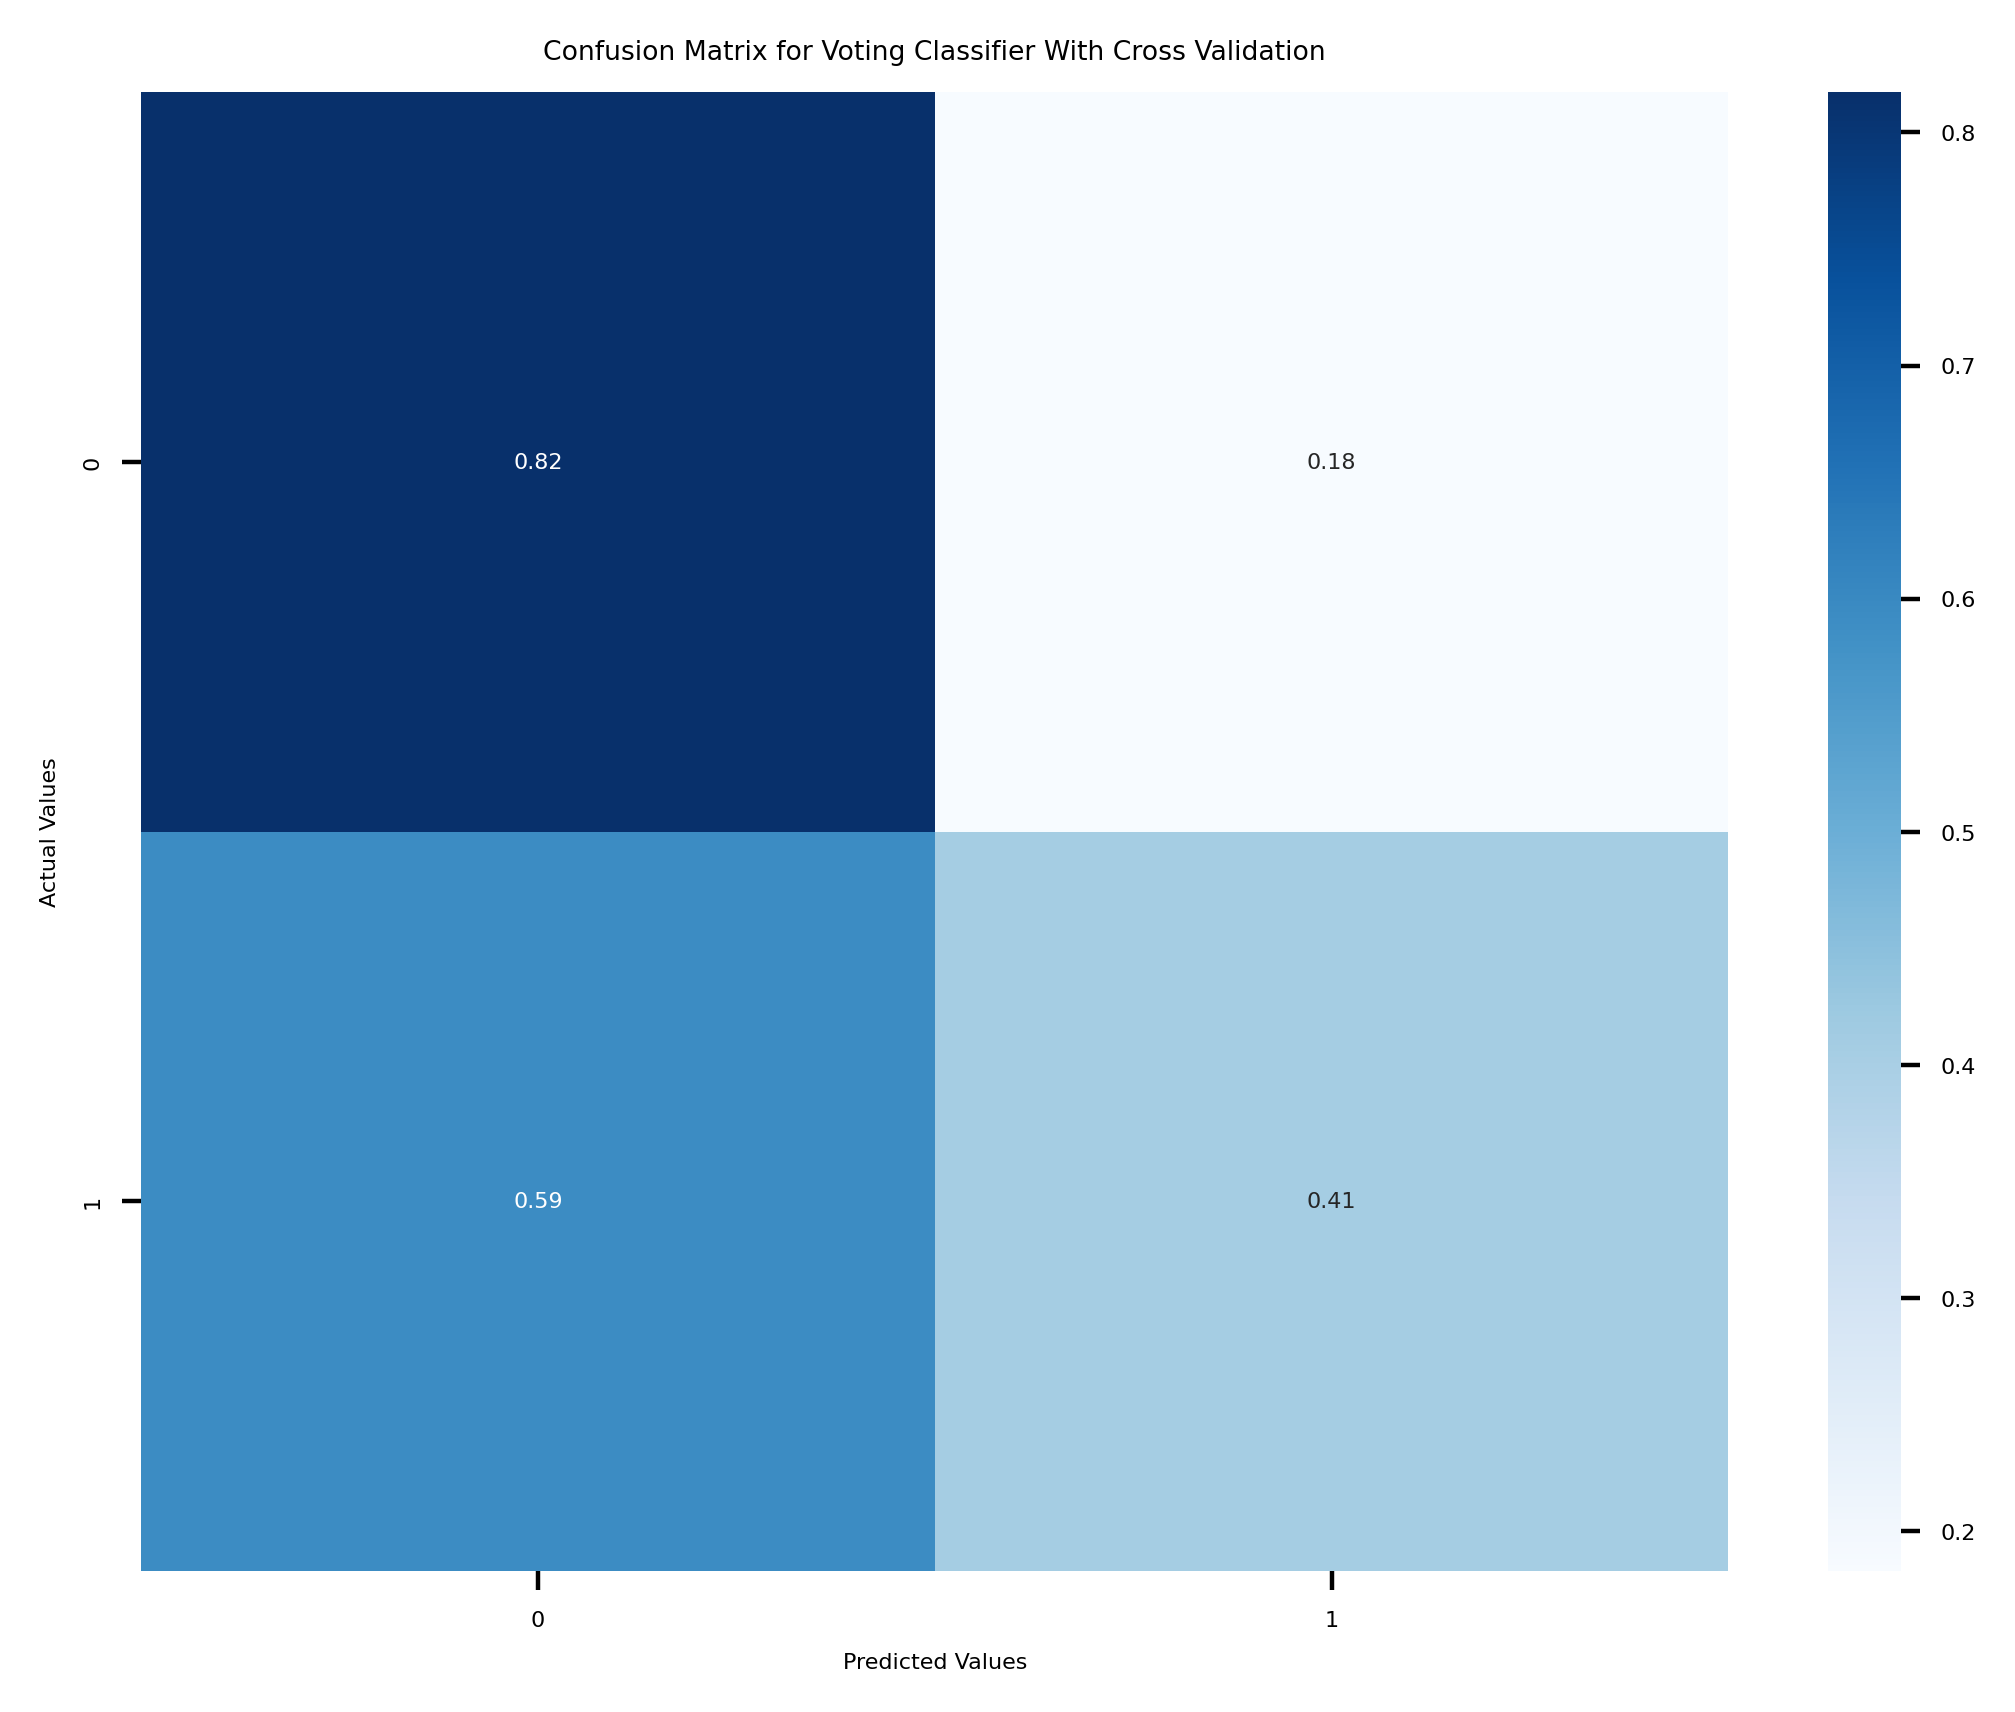

In [33]:
# lets predict it on the test set with cross validation
y_predic = cross_val_predict(VotingClassifier, X_test, y_test, cv=5)

# plot confusion matrix using heatmap
cm = confusion_matrix(y_test, y_predic, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Voting Classifier With Cross Validation')
plt.show() # show the plot

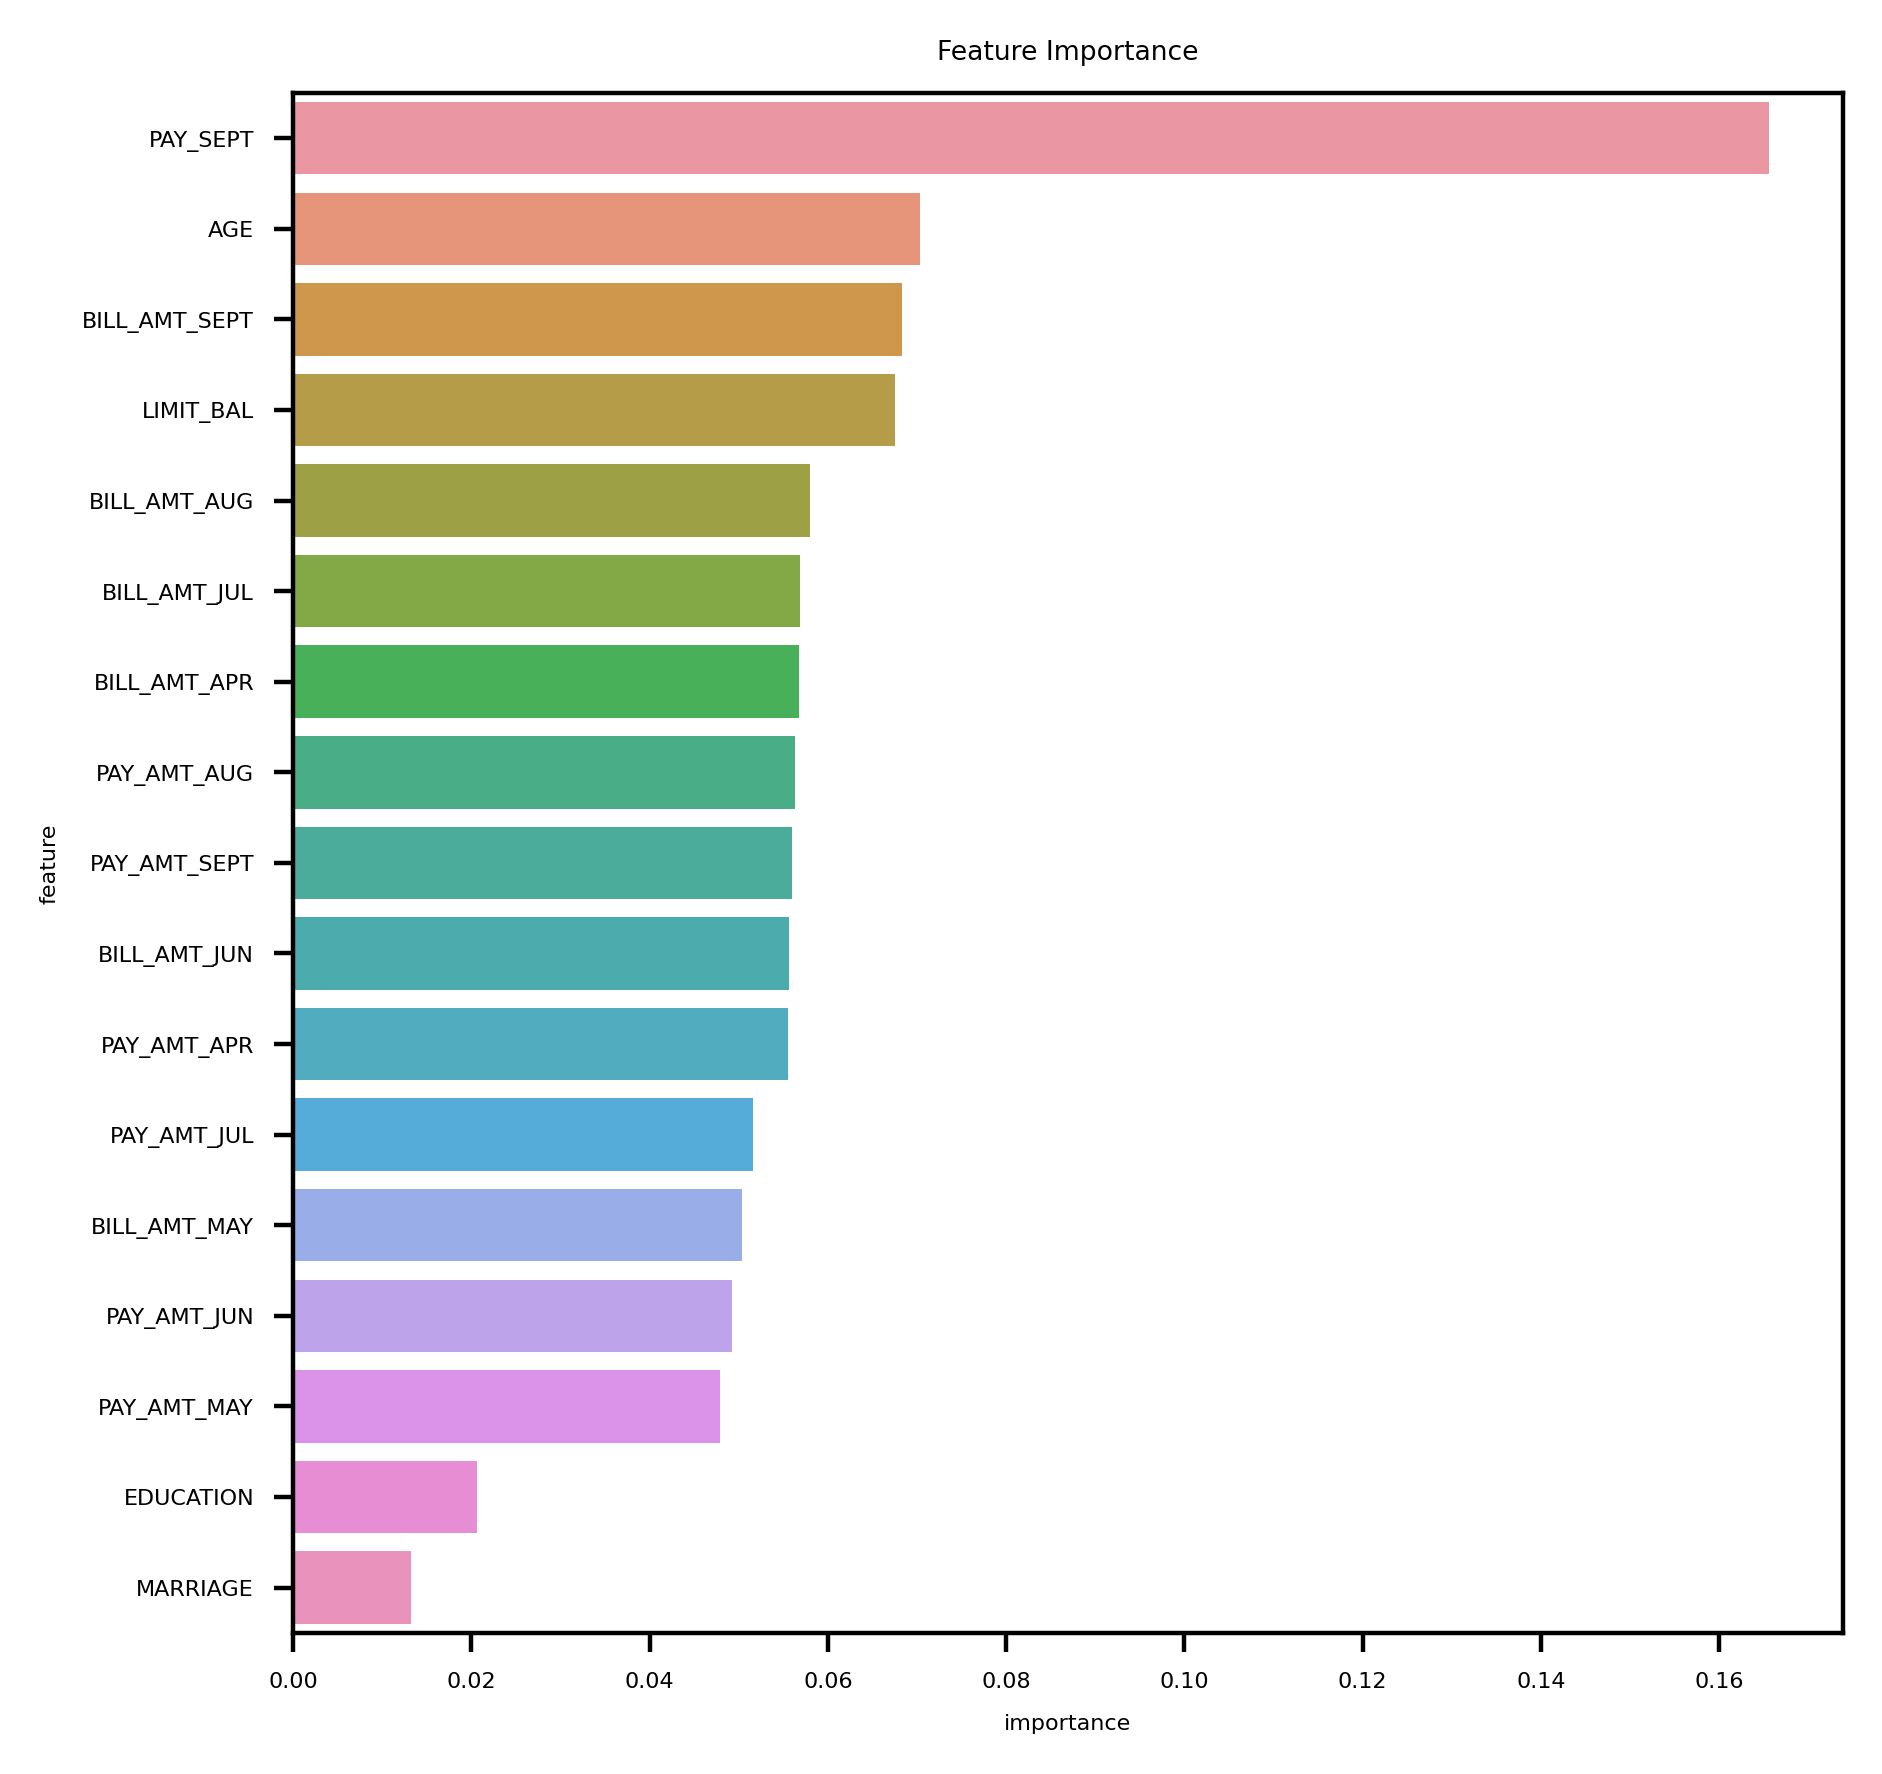

In [34]:
# get the important features from the voting classifier
# get the feature importance
# feature_imp = VotingClassifier.named_estimators_['rf']
# feature_imp = feature_imp.steps[1][1]
# feature_imp = feature_imp.feature_importances_

# # get the feature names
# feature_names = X_train.columns.tolist()

# # create a dataframe of the feature importance
# feature_imp_df = pd.DataFrame({'feature': feature_names, 'importance': feature_imp})

# # sort the dataframe
# feature_imp_df = feature_imp_df.sort_values(by='importance', ascending=False)

# # plot the feature importance
# plt.figure(figsize=(10, 10))
# sns.barplot(x='importance', y='feature', data=feature_imp_df)
# plt.title('Feature Importance')
# plt.show() # show the plot

# get combined feature importance from the voting classifier of both the models
feature_imp = VotingClassifier.named_estimators_['rf']
feature_imp = feature_imp.steps[1][1]
feature_imp = feature_imp.feature_importances_

feature_imp2 = VotingClassifier.named_estimators_['dt']
feature_imp2 = feature_imp2.steps[1][1]
feature_imp2 = feature_imp2.feature_importances_

# get the feature names
feature_names = X_train.columns.tolist()

# create a dataframe of the feature importance with average importance
feature_imp_df = pd.DataFrame({'feature': feature_names, 'importance': (feature_imp + feature_imp2)/2})

# sort the dataframe
feature_imp_df = feature_imp_df.sort_values(by='importance', ascending=False)

# plot the feature importance
plt.figure(figsize=(5,5))
sns.barplot(x='importance', y='feature', data=feature_imp_df)
plt.title('Feature Importance')
plt.show() # show the plot






## Conclusion

### Conclusion Analysis for Credit Card Default Users in Taiwan in 2005:

The dataset analyzed contains valuable information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. The goal of this analysis was to build a model that can predict credit card default users effectively. Based on the analysis, the following conclusions have been drawn:

- Best Model: After evaluating various models, it was found that the Voting Classifier outperformed others in terms of accuracy and predictive power. This model combines two powerful models: Random Forest and Decision Tree, taking the average of their predictions.

- Reason for Superiority: The Voting Classifier's superior performance can be attributed to its ensemble approach. By combining the strengths of Random Forest and Decision Tree, it effectively addresses limitations and improves overall accuracy. The random forest model leverages the power of multiple decision trees, while the decision tree model provides interpretability and simplicity.

- Combination of Models: The Voting Classifier achieved an accuracy of 0.85 in predicting credit card default users. This implies that the model correctly predicted the default status for approximately 85% of the credit card clients in the dataset. Such high accuracy is promising and indicates the model's ability to identify potential default users effectively.

- Soft Voting: Soft voting, used in the Voting Classifier, considers the probability scores assigned by each model when combining their predictions. This approach gives more weight to the model with higher accuracy, allowing it to have a stronger influence on the final prediction. By incorporating soft voting, the Voting Classifier optimizes the overall accuracy and improves the model's robustness.

- Voting Classifier Accuracy: The Voting Classifier achieved an accuracy of 0.85 in predicting credit card default users. This implies that the model correctly predicted the default status for approximately 85% of the credit card clients in the dataset. Such high accuracy is promising and indicates the model's ability to identify potential default users effectively.

- Impact of Typhoon: The year 2005 experienced a major typhoon that hit Taiwan, causing significant damages amounting to 1.5 billion USD. It is essential to consider this natural disaster's impact on the overall financial situation and economy of the country, as it might have influenced the credit card default rates and other financial aspects.

The analysis of credit card default users in Taiwan in 2005 revealed that the Voting Classifier, which is a combination of Random Forest and Decision Tree models using soft voting, is the most effective model for prediction with an accuracy of 85%. However, it is essential to be mindful of external factors such as the impact of the major typhoon, as they could have influenced credit card default rates during that period. The results of this analysis can be utilized by financial institutions to assess credit risk and make informed decisions for their clients. Further research and analysis can be conducted to explore additional factors that may influence credit card default behavior in Taiwan in 2005 and beyond.



